<a href="https://colab.research.google.com/github/shiuli-19/Liver-Disease-prediction/blob/main/SHIULI_PROJECT_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Liver Disease Using Machine Learning

This notebook uses popular Python libraries to build and test a machine learning model that predicts whether a patient has liver disease based on their medical data. It’s all about finding the best approach to spot liver issues early.

Here’s the plan:  
- Problem Definition  
- Data  
- Evaluation  
- Features  
- Modeling  
- Experimentation & Results  

## 1. Problem Definition  
Given a set of clinical parameters of patients, can a machine learning model accurately predict whether a patient has liver disease or not? The goal is to build an optimized model that maximizes predictive performance.

## 2. Data  
The dataset used for this analysis is the Liver Patient Dataset (LPD), which contains medical records of patients.The data was sourced from Kaggle and consists of two files:
- **Train Dataset**: 30,691 records, 11 features
- **Test Dataset**: 2,109 records, 10 features
This dataset provides clinical attributes that help in predicting liver disease using various machine learning models.

## 3. Evaluation

To determine the most effective machine learning model for liver disease prediction, various evaluation metrics are considered:

- **Accuracy**: Measures the overall correctness of the model’s predictions across both diseased and non-diseased cases.
- **Recall**: Specifically assesses the model’s ability to correctly identify liver disease cases. This metric is **crucial** in medical applications where false negatives—missed diagnoses—can have serious consequences.

Since **early detection of liver disease** is vital for timely medical intervention, the focus is on selecting a model with **high recall**, ensuring that as many actual cases as possible are correctly identified. This approach helps minimize the risk of undiagnosed conditions, leading to better patient outcomes.


## Liver Disease Dataset Features (Updated with Ranges)

1. **Age**  
   - Age of the patient in years.

2. **Gender**  
   - Male (1) or Female (0).

3. **Total_Bilirubin**  
   - Measures bilirubin levels in the blood.  
   - *Normal Range*: 0.30 - 1.30 mg/dL  
   - *High Values May Mean*: Jaundice, hepatitis, or blocked bile ducts.  
   - *Low Values May Mean*: Anemia or low red blood cell production.

4. **Direct_Bilirubin**  
   - The part of bilirubin that helps spot liver issues.  
   - *Normal Range*: 0.10 - 0.50 mg/dL  
   - *High Values May Mean*: Liver disease or bile duct problems.  
   - *Low Values May Mean*: Rare metabolic issues (typically normal).

5. **Alkphos_Alkaline_Phosphotase**  
   - An enzyme tied to liver and bone health.  
   - *Normal Range*: 107 - 361.8 IU/L  
   - *High Values May Mean*: Liver blockage, tumors, or bone issues.  
   - *Low Values May Mean*: Malnutrition, hypothyroidism, or rare genetic conditions.

6. **Sgpt_Alamine_Aminotransferase**  
   - A liver enzyme that shows if the liver is damaged or inflamed (ALT).  
   - *Normal Range*: 10.0 - 68.0 IU/L  
   - *High Values May Mean*: Hepatitis, fatty liver, or cirrhosis.  
   - *Low Values May Mean*: Vitamin B6 deficiency or severe liver failure.

7. **Sgot_Aspartate_Aminotransferase**  
   - Another enzyme for checking liver health (AST).  
   - *Normal Range*: 13.0 - 52.8 IU/L  
   - *High Values May Mean*: Liver damage or even heart problems.  
   - *Low Values May Mean*: Advanced liver disease or malnutrition.

8. **Total_Protiens**  
   - Total protein in the blood (includes albumin and globulin).  
   - *Normal Range*: 6.0 - 8.0 gm/dL  
   - *High Values May Mean*: Dehydration or chronic inflammation.  
   - *Low Values May Mean*: Liver disease or malnutrition.

9. **ALB_Albumin**  
   - A protein the liver makes; low levels can signal trouble.  
   - *Normal Range*: 3.5 - 5.0 gm/dL  
   - *High Values May Mean*: Dehydration (rarely an issue).  
   - *Low Values May Mean*: Liver or kidney disease, or inflammation.

10. **A/G_Ratio_Albumin_and_Globulin_Ratio**  
    - Shows how the liver and kidneys are doing (Albumin/Globulin Ratio).  
    - *Normal Range*: 1.0 - 1.5   
    - *High Values May Mean*: Rare, but could indicate low globulin production.  
    - *Low Values May Mean*: Cirrhosis or kidney issues.

11. **Result (Target)**  
    - 1 = Liver disease, 0 = No liver disease.


## 5. Modeling  
We evaluated multiple machine learning models to determine the best-performing one based on **accuracy and recall**.

 1. Logistic Regression
- A statistical model used for binary classification.
- It predicts the probability of an event occurring based on input features.
- Uses the sigmoid function to map outputs between 0 and 1.

 2. Support Vector Machine (SVM)
- A supervised learning model that finds the optimal boundary (hyperplane) to separate data points.
- Works well with high-dimensional data and is used for classification and regression.
  
 3. Decision Tree
- A tree-based algorithm that splits data into branches based on feature conditions.
- Each node represents a decision, and each leaf represents an outcome.
- Useful for classification and regression tasks.

 4. Decision Tree
- A tree-based algorithm that splits data into branches based on feature conditions.
- Each node represents a decision, and each leaf represents an outcome.
- Useful for classification and regression tasks.

 5. K-Nearest Neighbors (KNN)
- A non-parametric algorithm that classifies data based on the majority class of its k-nearest neighbors.
- Works well for smaller datasets but is sensitive to irrelevant features and noise.

 6. Random Forest
- An ensemble learning method that combines multiple decision trees.
- Reduces overfitting and improves accuracy by averaging multiple predictions.
- Suitable for handling large datasets with non-linear relationships.

 7. XGBoost
- An optimized, fast implementation of Gradient Boosting.
- Uses parallel processing and regularization to improve performance.
- Frequently used in machine learning competitions and real-world applications.

 8. AdaBoost
- A boosting algorithm that assigns higher weights to misclassified samples to improve model accuracy.
- Combines weak learners to create a strong classifier.
- Used for image recognition, fraud detection, and medical diagnoses.

 9. Gradient Boosting
- A boosting algorithm that sequentially improves weak models by minimizing errors.
- Often used in structured data problems like finance and healthcare predictions.

## 6. Experimentation & Results  
To compare the performance of these models, we considered:
- **Accuracy**: How often the model makes the correct prediction,whether it's identifying a patient with liver disease or correctly saying a patient does not have liver disease.

- **Recall**: Recall focuses specifically on the positive,patients who have liver disease.In medical predictions, high recall is crucial to minimize missed diagnoses.

After evaluating all models, **XGBoost and Randomf Forest** demonstrated the highest recall along with strong accuracy, making it the most effective choice for predicting liver disease in this dataset.

In [ ]:
import os
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load training data with headers
df_train = pd.read_csv("train_file.csv", encoding="ISO-8859-1")

# Load test data with no headers
df_test = pd.read_csv("test_file.csv", encoding="ISO-8859-1", header=None)

# Assign correct column names (excluding 'Result') to test data
df_test.columns = df_train.columns[:-1]  # Exclude 'Result' column

# Check
print("Train columns:", df_train.columns)
print("Test columns:", df_test.columns)

Train columns: Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio', 'Result'],
      dtype='object')
Test columns: Index(['Age of the patient', 'Gender of the patient', 'Total Bilirubin',
       'Direct Bilirubin', ' Alkphos Alkaline Phosphotase',
       ' Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase',
       'Total Protiens', ' ALB Albumin',
       'A/G Ratio Albumin and Globulin Ratio'],
      dtype='object')


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Display basic info and check for missing values
print("Training Data Info:")
print(df_train.info())
print("\nMissing values in training data:")
print(df_train.isnull().sum())

print("\nTest Data Info:")
print(df_test.info())
print("\nMissing values in test data:")
print(df_test.isnull().sum())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4    Alkphos Alkaline Phosphotase         29895 non-null  float64
 5    Sgpt Alamine Aminotransferase        30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8    ALB Albumin                          30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  


In [ ]:
# Standardizing column names (removing spaces and making them consistent)
df_train.columns = df_train.columns.str.strip().str.replace(' ', '_')
df_test.columns = df_test.columns.str.strip().str.replace(' ', '_')

print(df_train.columns)
print(df_test.columns)

Index(['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin', 'A/G_Ratio_Albumin_and_Globulin_Ratio',
       'Result'],
      dtype='object')
Index(['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio'],
      dtype='object')


In [ ]:
# Convert categorical columns (Gender and Result)
df_train['Gender_of_the_patient'] = df_train['Gender_of_the_patient'].map({'Male': 1, 'Female': 0})
df_test['Gender_of_the_patient'] = df_test['Gender_of_the_patient'].map({'Male': 1, 'Female': 0})

df_train['Result'] = df_train['Result'].map({1: 0, 2: 1})

#### Handling Missing Values
- **Numerical Columns** → Fill with **median** (robust against outliers)
- **Categorical Columns** → Fill with **mode** (most frequent value)
- **Why Median Instead of Mean?**
- Mean is highly sensitive to extreme values (outliers).
- Median is robust to outliers and represents the central tendency more accurately for skewed data.

In [ ]:
# Handle missing values by filling with median
df_train.fillna(df_train.median(numeric_only=True), inplace=True)
df_test.fillna(df_test.median(numeric_only=True), inplace=True)

# Remove duplicate rows
df_train.drop_duplicates(inplace=True)

# Ensure all columns are numeric
df_train = df_train.astype(float)
df_test = df_test.astype(float)

In [ ]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

Age_of_the_patient                      0
Gender_of_the_patient                   0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Result                                  0
dtype: int64
Age_of_the_patient                      0
Gender_of_the_patient                   0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
dtype: int64


#### **Correlations**
- To better understand feature relationships, we analyze the correlations between numeric variables.
- Correlation values range from **-1 to 1**, representing the strength and direction of relationships between two features.

- **Positive correlation**: As one feature increases, the other also increases (e.g., height and weight).
- **Negative correlation**: As one feature increases, the other decreases (e.g., screen time and sleep hours).
- **Correlations close to -1 or 1** indicate a **strong relationship**.
- **Correlations near 0** suggest a **weak or no relationship** between features.
- **A correlation of exactly 0** means the features are **completely independent** of each other.


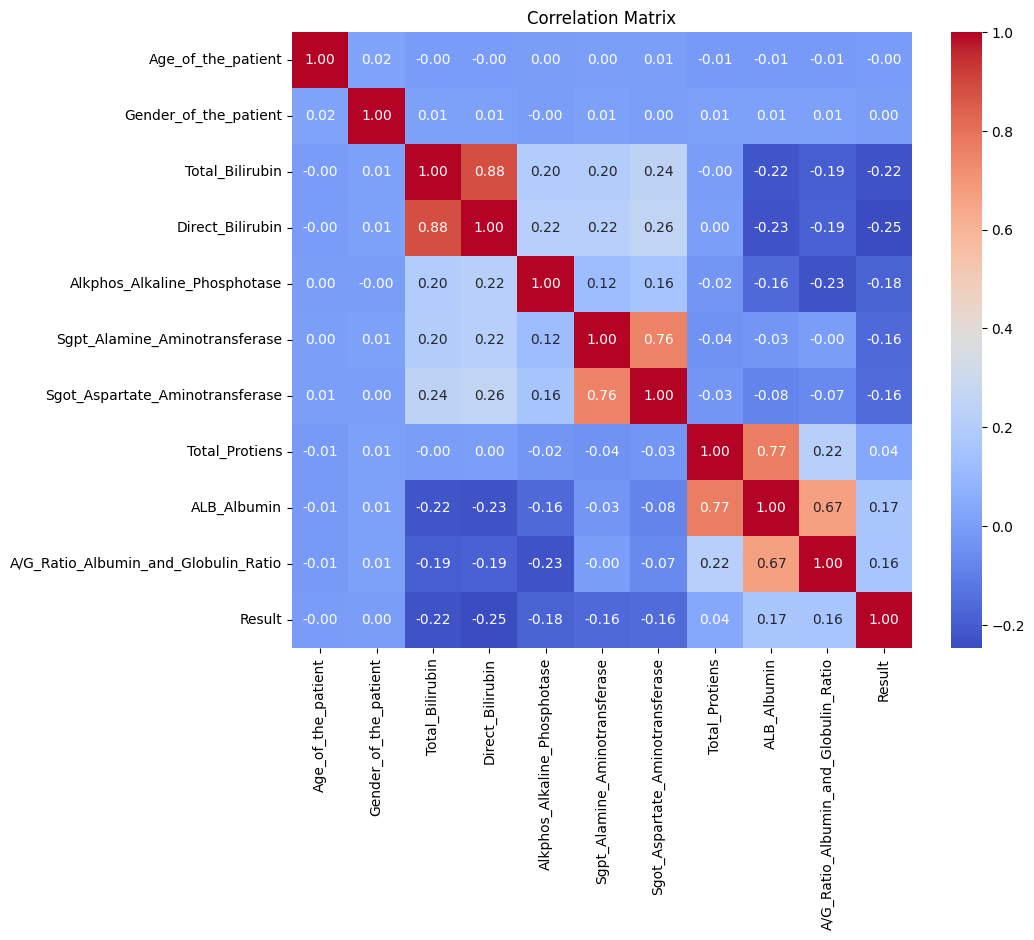


 Feature importance based on correlation with target:

Direct_Bilirubin                       -0.246980
Total_Bilirubin                        -0.224597
Alkphos_Alkaline_Phosphotase           -0.180222
ALB_Albumin                             0.165456
Sgpt_Alamine_Aminotransferase          -0.161968
A/G_Ratio_Albumin_and_Globulin_Ratio    0.160145
Sgot_Aspartate_Aminotransferase        -0.157675
Total_Protiens                          0.038447
Age_of_the_patient                     -0.004612
Gender_of_the_patient                   0.000480
Name: Result, dtype: float64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# === Step 1: Correlation Matrix ===
corr = df_train.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Print sorted correlation with target
cor_target = corr['Result'].drop('Result')
cor_target_sorted = cor_target.abs().sort_values(ascending=False)
print("\n Feature importance based on correlation with target:\n")
print(cor_target[cor_target_sorted.index])  # retains sign of correlation

In [ ]:
# === Step 2: Feature Scaling ===
# Drop target column before scaling
X_train = df_train.drop('Result', axis=1)
y_train = df_train['Result']

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)

# Apply same transformation to test data
X_test_scaled = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

In [ ]:
# === Step 3: Print feature min/max values & compare to medical ranges ===
print("\n Min and Max of Scaled Features (Train Data):")
print(X_train_scaled.describe().loc[['min', 'max']])

# Dictionary of normal medical ranges
normal_ranges = {
    "Total_Bilirubin": (0.30, 1.30),
    "Direct_Bilirubin": (0.10, 0.50),
    "Alkphos_Alkaline_Phosphotase": (107, 361.8),
    "Sgpt_Alamine_Aminotransferase": (10.0, 68.0),
    "Sgot_Aspartate_Aminotransferase": (13.0, 52.8),
    "Total_Protiens": (6.0, 8.0),
    "ALB_Albumin": (3.5, 5.0),
    "A/G_Ratio_Albumin_and_Globulin_Ratio": (1.0, 1.5)
}

print("\n Normal Medical Ranges:")
for feature, (low, high) in normal_ranges.items():
    print(f"{feature}: {low} to {high}")


 Min and Max of Scaled Features (Train Data):
     Age_of_the_patient  Gender_of_the_patient  Total_Bilirubin  \
min           -2.416103              -1.562325        -0.471877   
max            2.802687               0.640072        11.850958   

     Direct_Bilirubin  Alkphos_Alkaline_Phosphotase  \
min         -0.488816                     -0.947303   
max          6.418681                      7.720233   

     Sgpt_Alamine_Aminotransferase  Sgot_Aspartate_Aminotransferase  \
min                      -0.387464                        -0.360833   
max                      10.699257                        17.507753   

     Total_Protiens  ALB_Albumin  A/G_Ratio_Albumin_and_Globulin_Ratio  
min       -3.519070    -2.852728                             -2.024035  
max        2.875997     3.005158                              5.823442  

 Normal Medical Ranges:
Total_Bilirubin: 0.3 to 1.3
Direct_Bilirubin: 0.1 to 0.5
Alkphos_Alkaline_Phosphotase: 107 to 361.8
Sgpt_Alamine_Aminotransfera

In [ ]:
df_test.describe()

Age_of_the_patient  Gender_of_the_patient  Total_Bilirubin  \
count         2110.000000            2110.000000      2110.000000   
mean            44.918483               0.680095         3.460948   
std             16.102357               0.466550         6.379649   
min              4.000000               0.000000         0.400000   
25%             33.000000               0.000000         0.800000   
50%             45.000000               1.000000         1.000000   
75%             57.000000               1.000000         2.800000   
max             85.000000               1.000000        75.000000   

       Direct_Bilirubin  Alkphos_Alkaline_Phosphotase  \
count       2110.000000                   2110.000000   
mean           1.562559                    294.344076   
std            2.867008                    245.424841   
min            0.100000                     63.000000   
25%            0.200000                    178.000000   
50%            0.300000                    214.000000   
75%            1.400000                    298.000000   
max           19.700000                   2110.000000   

       Sgpt_Alamine_Aminotransferase  Sgot_Aspartate_Aminotransferase  \
count                    2110.000000                      2110.000000   
mean                       86.981991                       121.532701   
std                       193.033523                       306.278856   
min                        10.000000                        10.000000   
25%                        24.000000                        26.000000   
50%                        36.000000                        43.000000   
75%                        63.750000                        92.000000   
max                      2000.000000                      4929.000000   

       Total_Protiens  ALB_Albumin  A/G_Ratio_Albumin_and_Globulin_Ratio  
count     2110.000000  2110.000000                           2110.000000  
mean         6.449384     3.124171                              0.949896  
std          1.086962     0.791571                              0.323210  
min          2.700000     0.900000                              0.300000  
25%          5.700000     2.600000                              0.700000  
50%          6.500000     3.100000                              0.950000  
75%          7.200000     3.800000                              1.100000  
max          9.600000     5.500000                              2.800000

In [ ]:
df_train.describe()

Age_of_the_patient  Gender_of_the_patient  Total_Bilirubin  \
count        19083.000000           19083.000000     19083.000000   
mean            43.814757               0.709375         3.256653   
std             16.479348               0.454063         6.053960   
min              4.000000               0.000000         0.400000   
25%             32.000000               0.000000         0.800000   
50%             45.000000               1.000000         1.000000   
75%             55.000000               1.000000         2.600000   
max             90.000000               1.000000        75.000000   

       Direct_Bilirubin  Alkphos_Alkaline_Phosphotase  \
count      19083.000000                  19083.000000   
mean           1.487015                    286.723314   
std            2.837571                    236.174790   
min            0.100000                     63.000000   
25%            0.200000                    177.000000   
50%            0.300000                    209.000000   
75%            1.200000                    293.000000   
max           19.700000                   2110.000000   

       Sgpt_Alamine_Aminotransferase  Sgot_Aspartate_Aminotransferase  \
count                   19083.000000                     19083.000000   
mean                       79.547398                       109.332862   
std                       179.498726                       275.294806   
min                        10.000000                        10.000000   
25%                        23.000000                        26.000000   
50%                        35.000000                        42.000000   
75%                        60.000000                        87.000000   
max                      2000.000000                      4929.000000   

       Total_Protiens   ALB_Albumin  A/G_Ratio_Albumin_and_Globulin_Ratio  \
count    19083.000000  19083.000000                          19083.000000   
mean         6.496924      3.140151                              0.944804   
std          1.078985      0.785287                              0.318582   
min          2.700000      0.900000                              0.300000   
25%          5.800000      2.600000                              0.700000   
50%          6.600000      3.100000                              0.900000   
75%          7.200000      3.800000                              1.100000   
max          9.600000      5.500000                              2.800000   

             Result  
count  19083.000000  
mean       0.286852  
std        0.452304  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

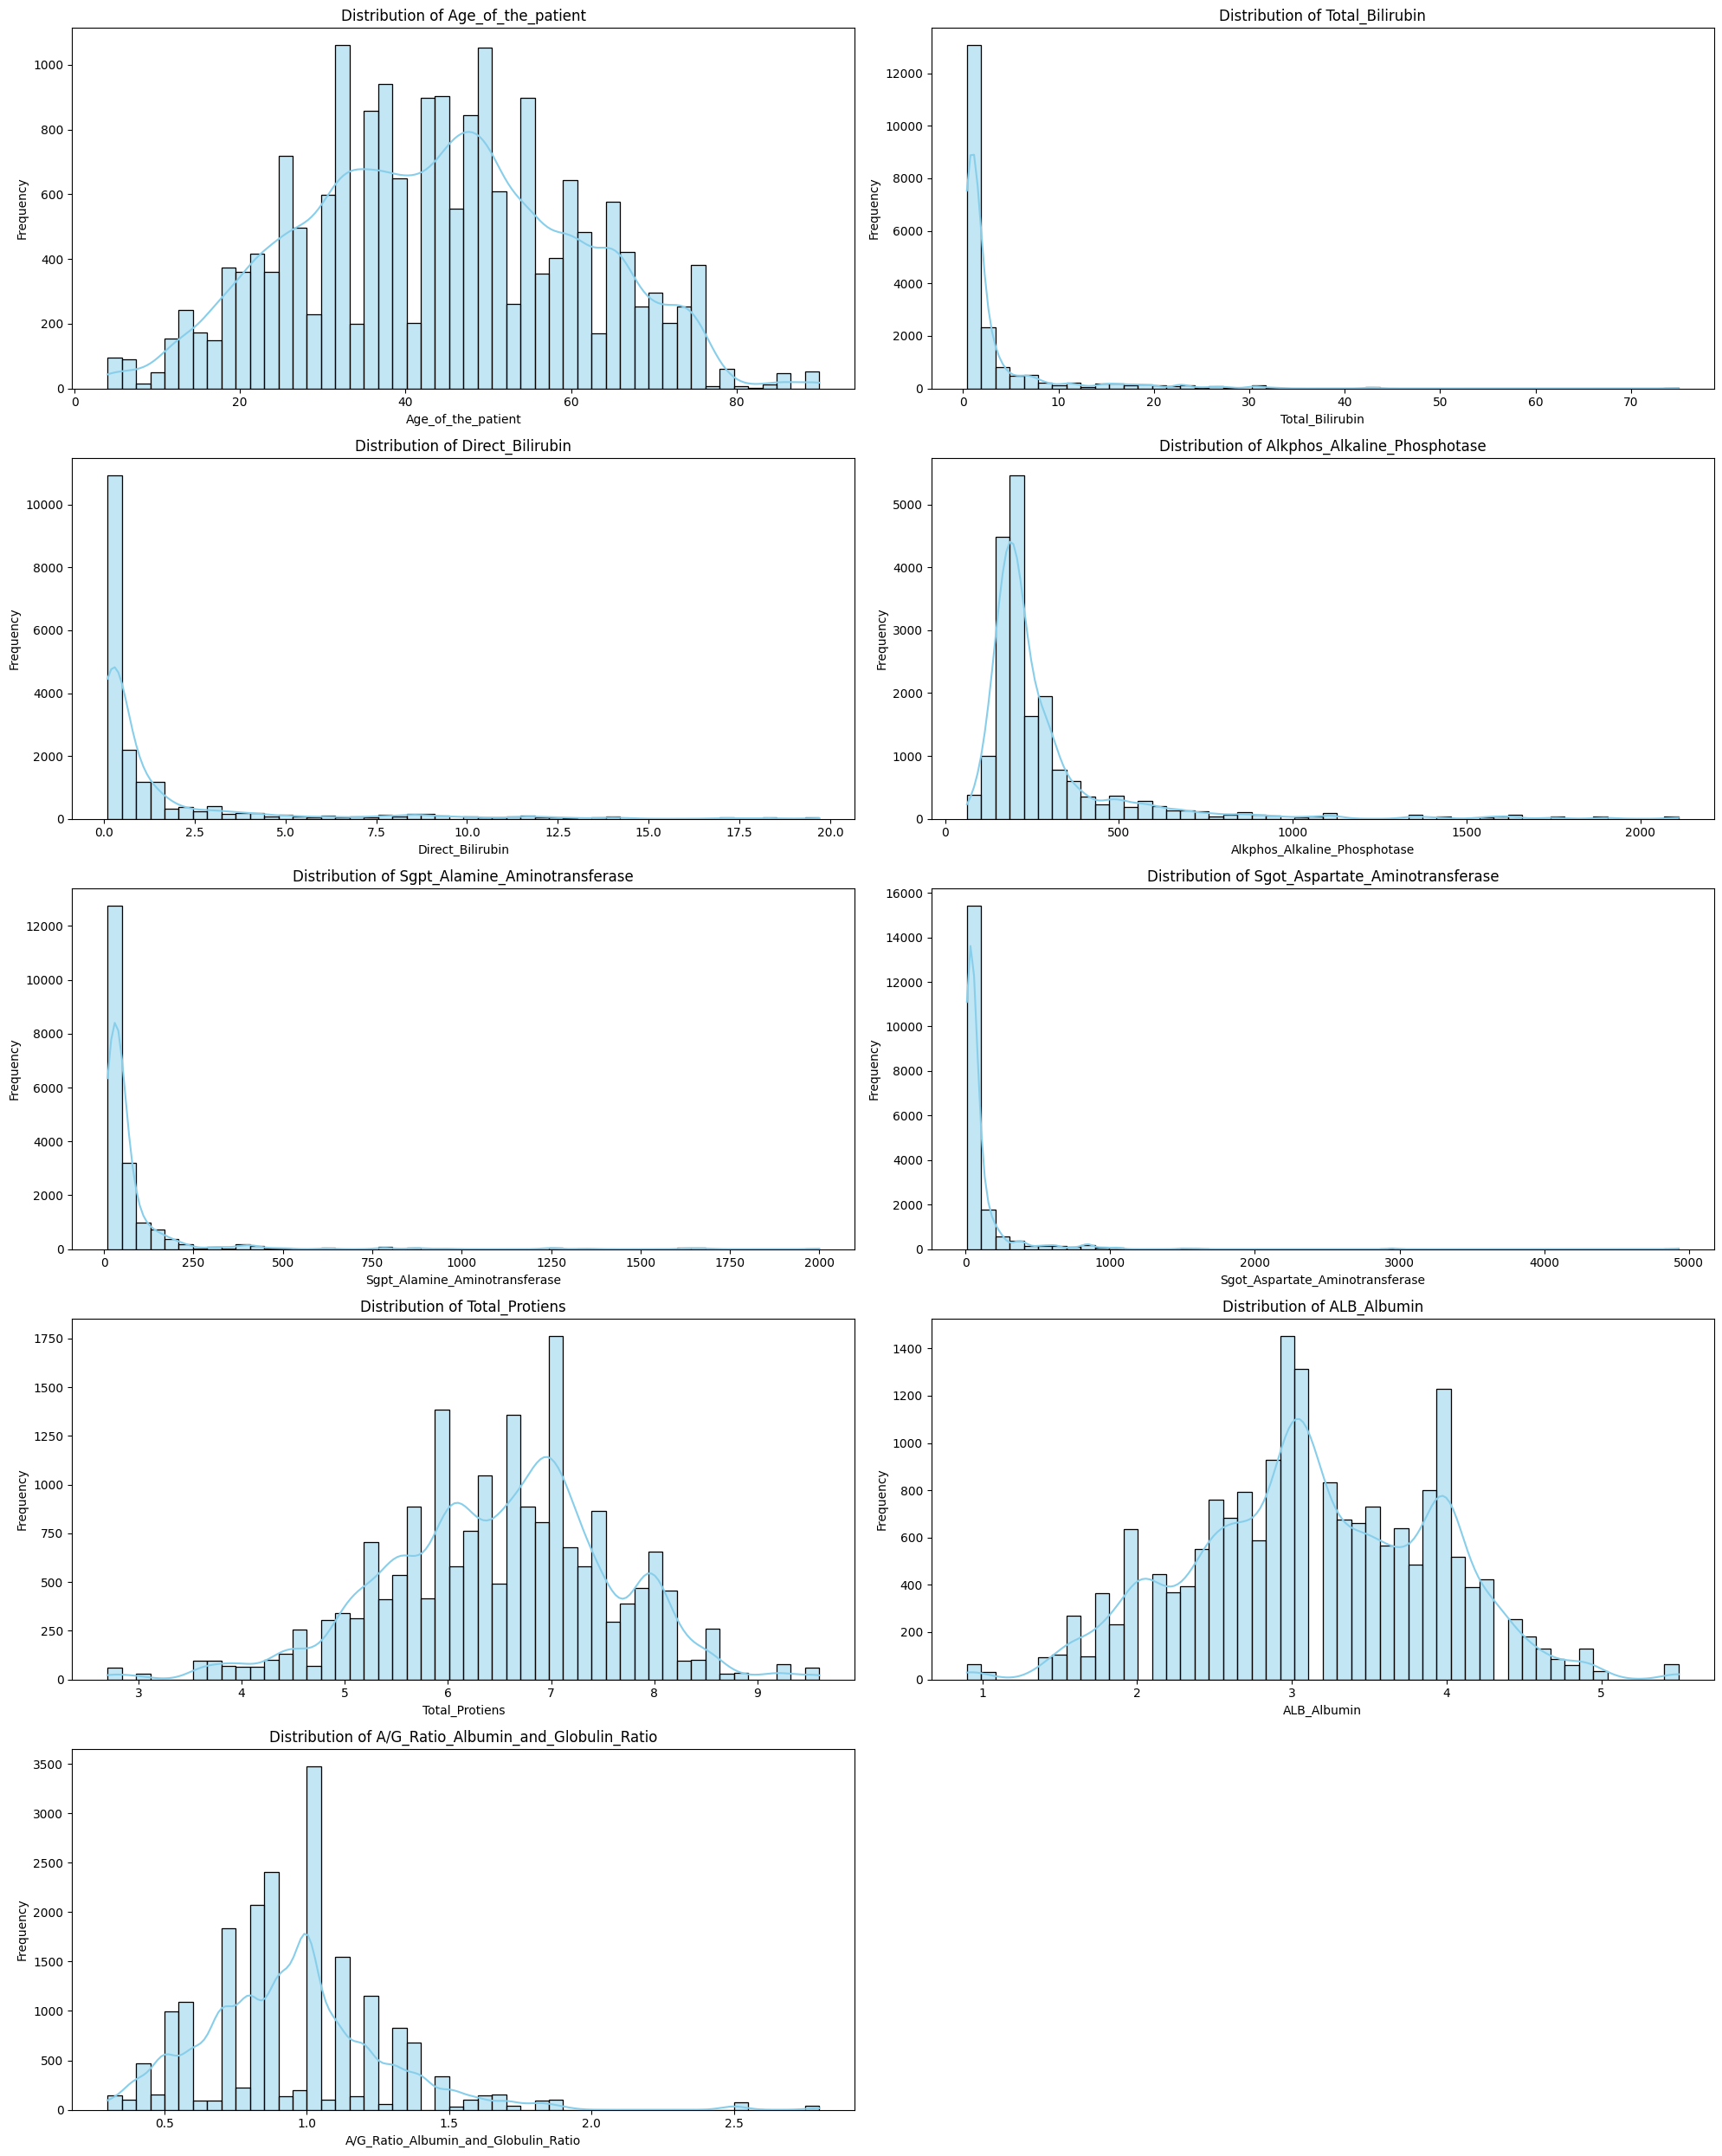

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Plot numerical feature distributions ---
numerical_features = df_train.drop(columns=["Gender_of_the_patient", "Result"]).columns

plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.histplot(df_train[col].dropna(), kde=True, bins=50, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


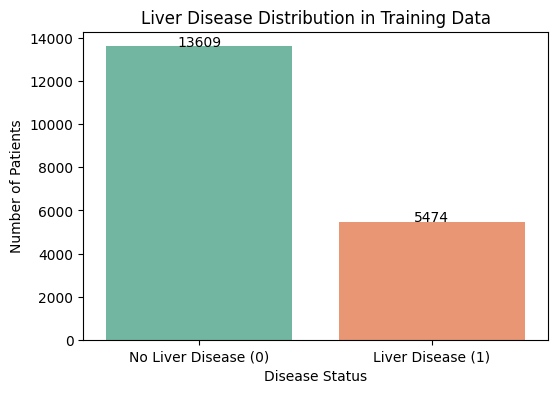

In [ ]:
# --- Countplot of Liver Disease ---
plt.figure(figsize=(6, 4))
ax = sns.countplot(x="Result", hue="Result", data=df_train, palette="Set2", legend=False)
plt.xticks([0, 1], ["No Liver Disease (0)", "Liver Disease (1)"])
plt.title("Liver Disease Distribution in Training Data")
plt.ylabel("Number of Patients")
plt.xlabel("Disease Status")

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 5,
            '{:d}'.format(int(height)),
            ha="center")

plt.show()

Boxplots for All Numerical Features (Train)

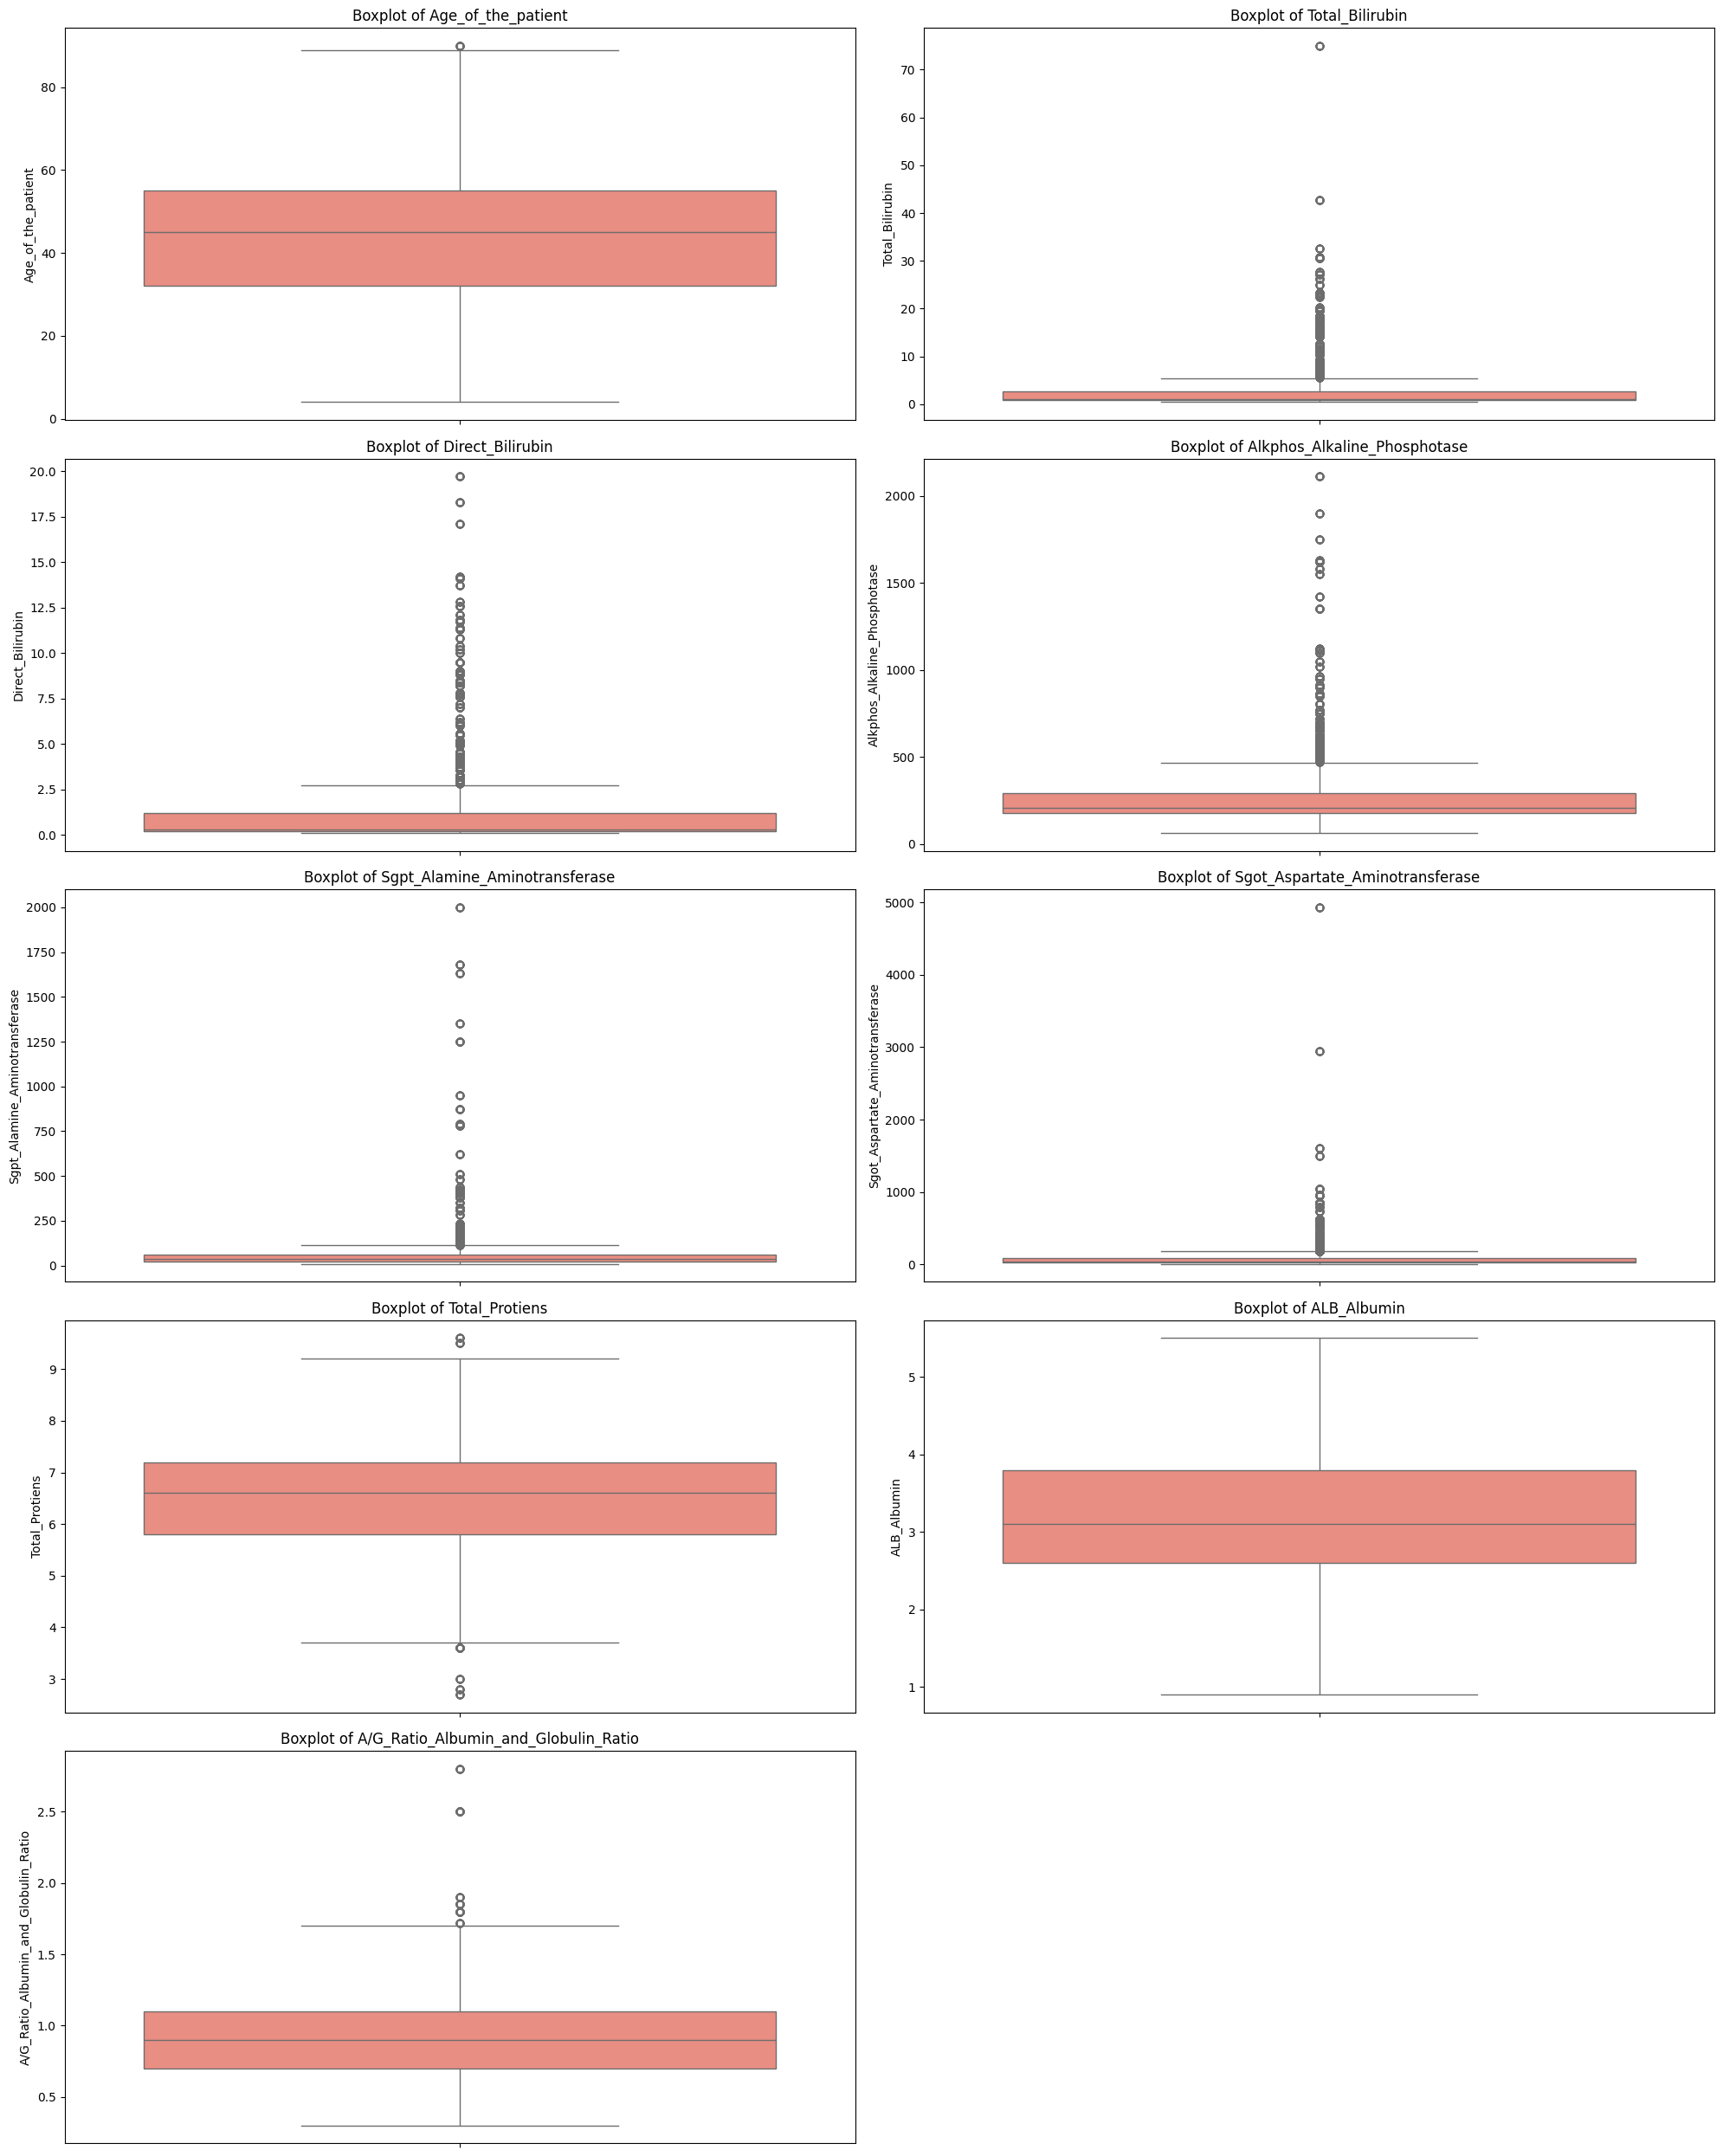

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(data=df_train, y=col, color='salmon')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


Boxplots by Liver Disease Result

This version helps you see how the distribution shifts between Result = 0 and Result = 1

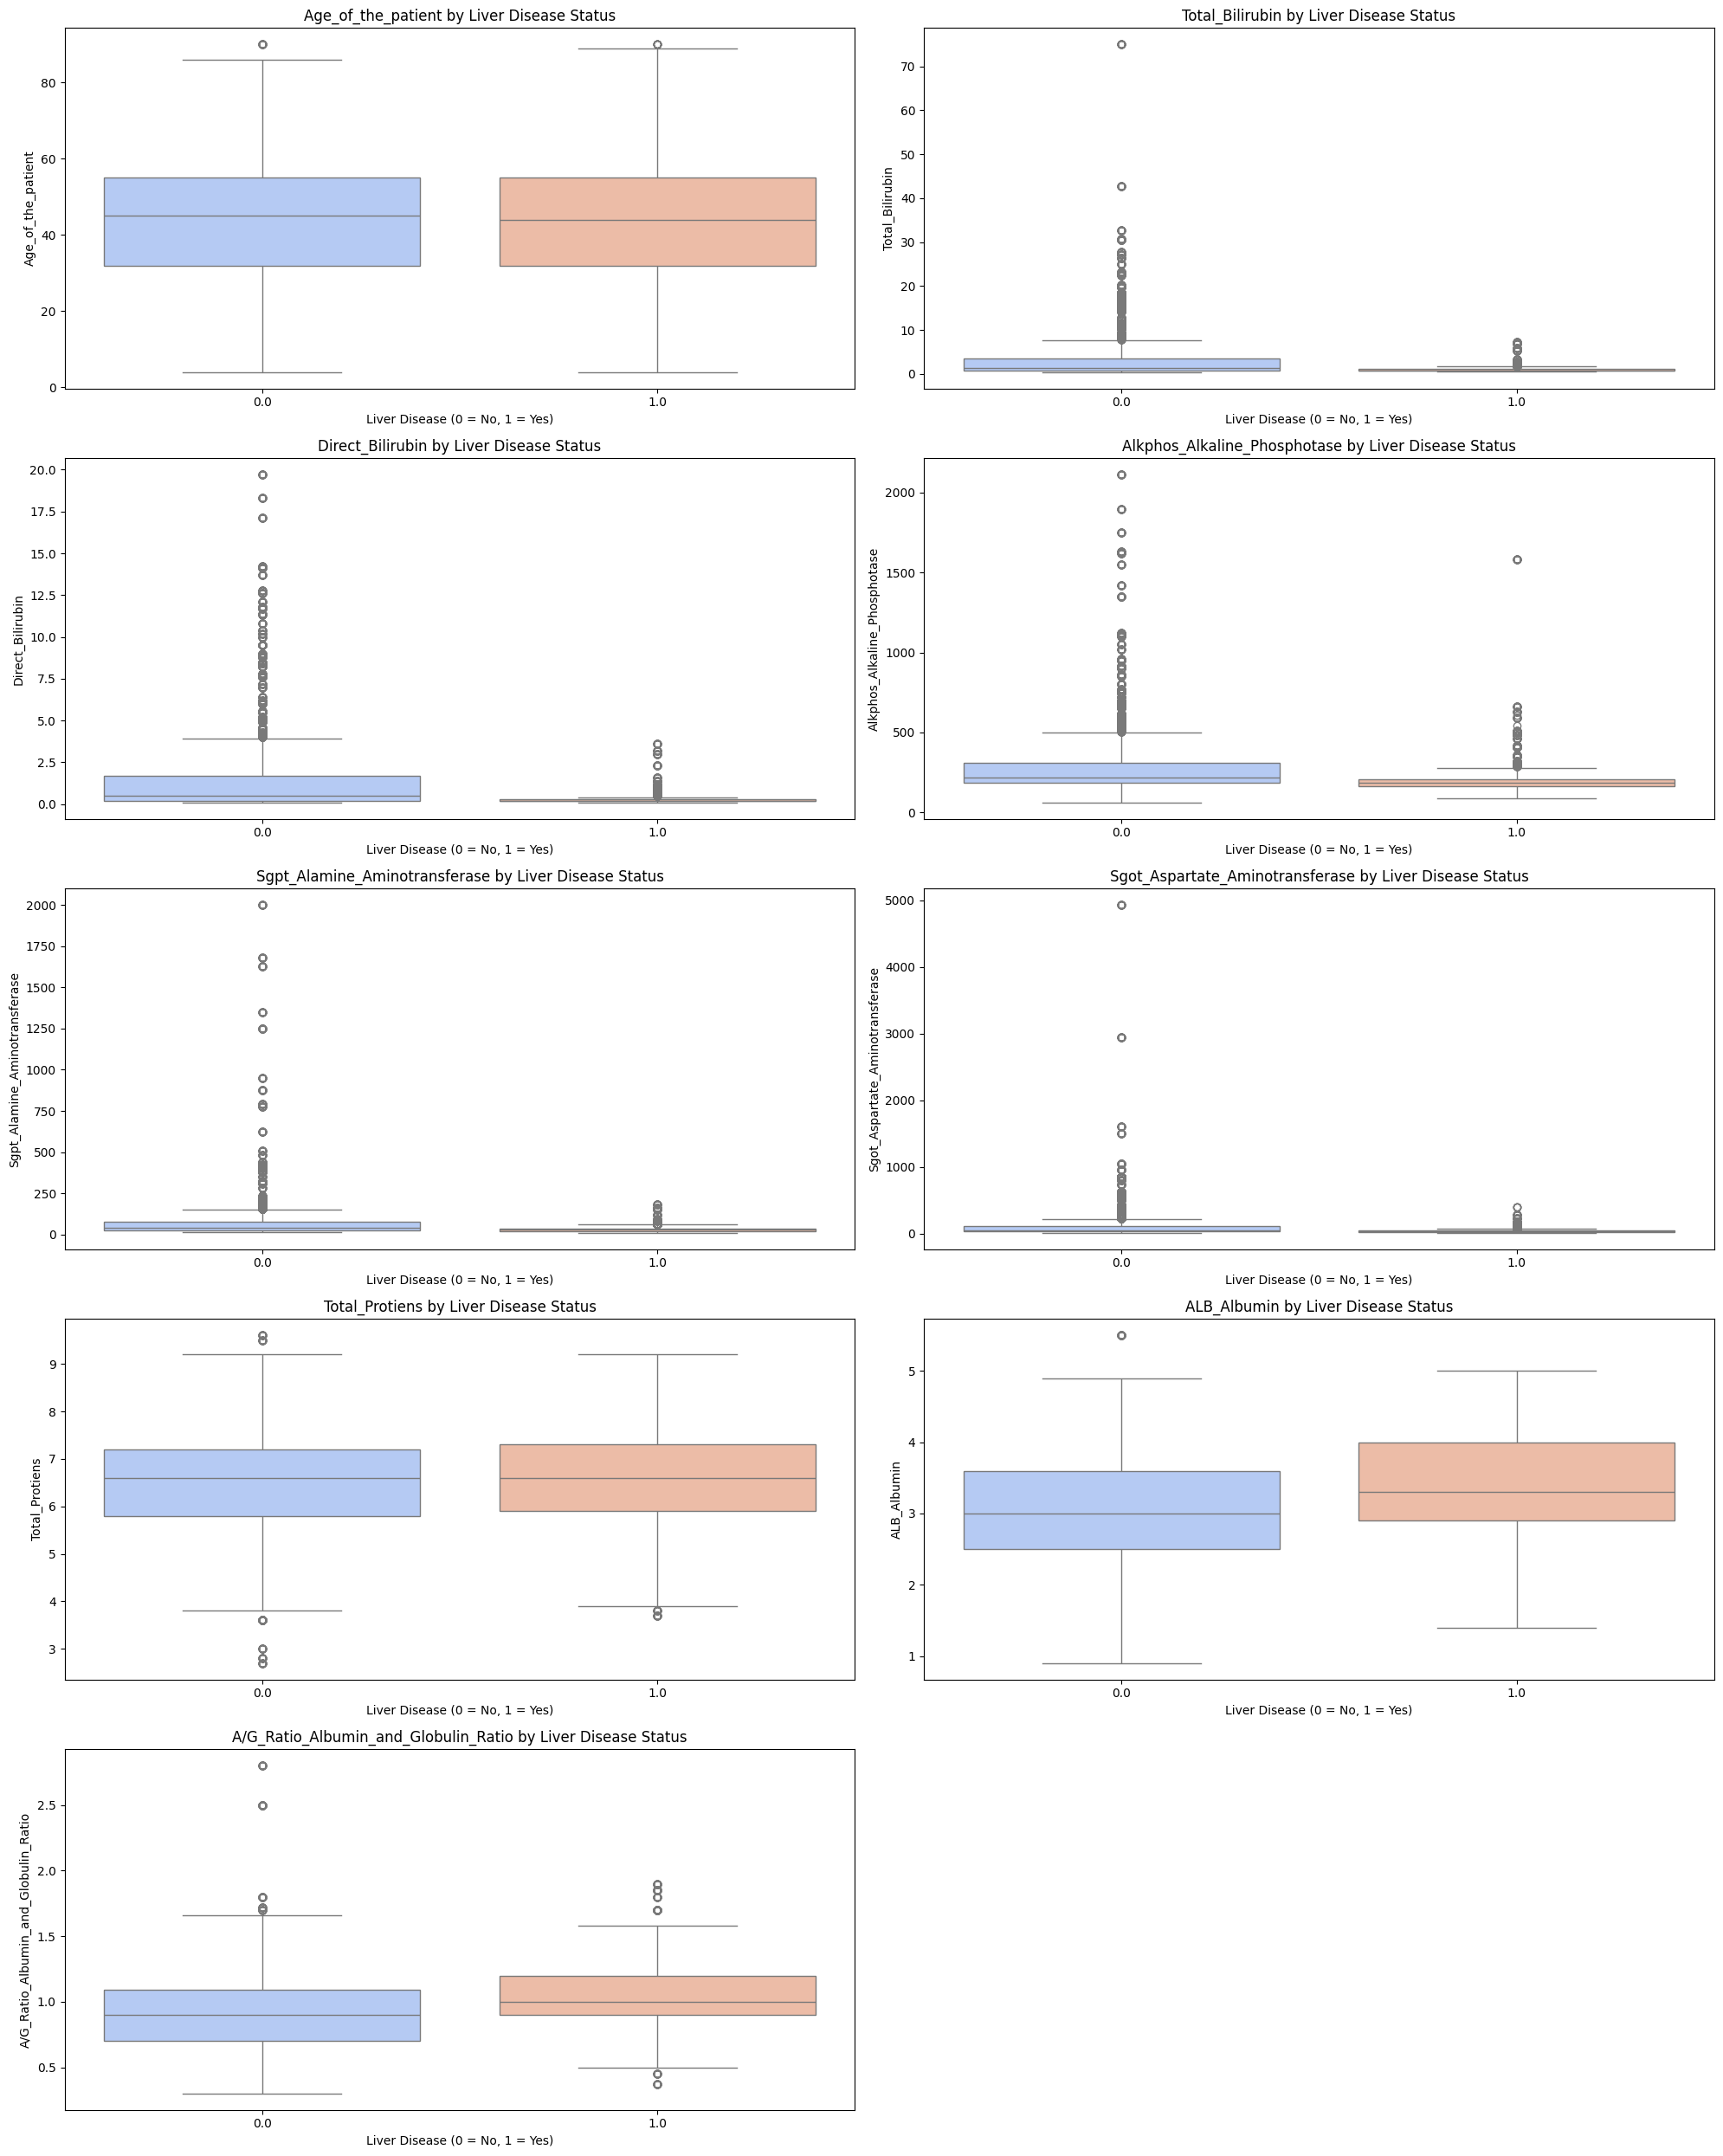

In [ ]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(
        x='Result',
        y=col,
        data=df_train,
        hue='Result',                # Explicitly setting hue
        palette='coolwarm',
        dodge=False,
        legend=False                 # Optional: suppress legend
    )
    plt.title(f'{col} by Liver Disease Status')
    plt.xlabel('Liver Disease (0 = No, 1 = Yes)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### Logistic Regression

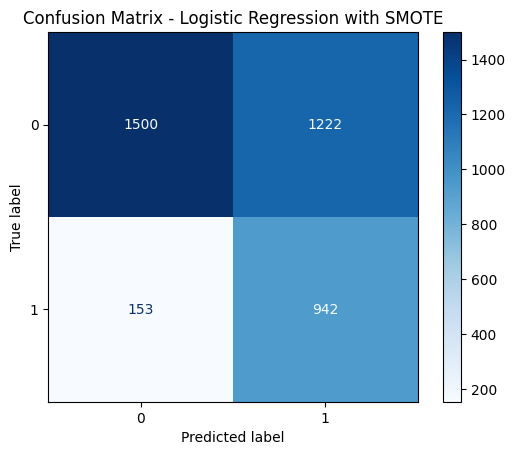

Classification Report - Logistic Regression with SMOTE:

              precision    recall  f1-score   support

         0.0       0.91      0.55      0.69      2722
         1.0       0.44      0.86      0.58      1095

    accuracy                           0.64      3817
   macro avg       0.67      0.71      0.63      3817
weighted avg       0.77      0.64      0.65      3817



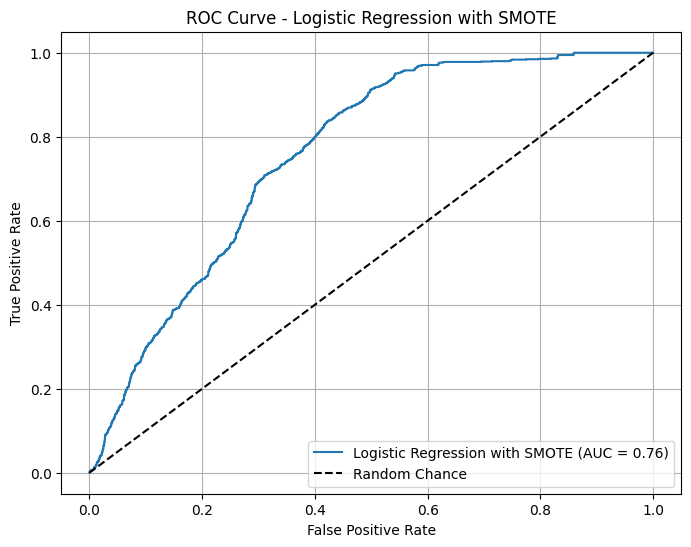

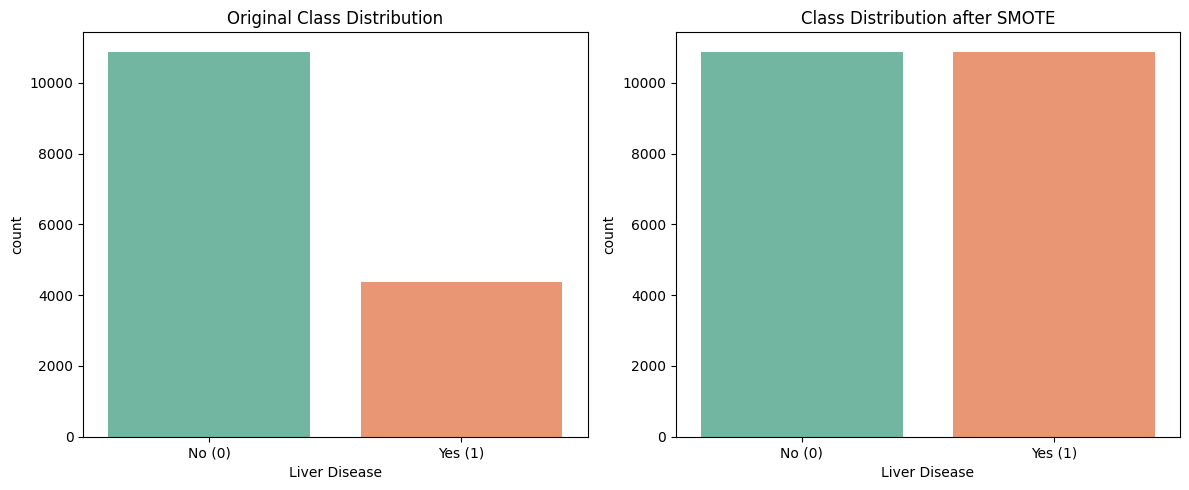

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Step 1: Prepare train/test split from training data
X = df_train.drop(columns=['Result'])
y = df_train['Result']

# Train-validation split (80-20)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Numerical features
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns

# Step 2: Pipeline with SMOTE for logistic regression
# Note: Using imblearn's Pipeline to incorporate SMOTE
smote_logreg_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(random_state=42, max_iter=1000))
])

# Step 3: Fit the model
smote_logreg_pipeline.fit(X_train[numerical_features], y_train)

# Step 4: Predict and evaluate on validation set
y_val_pred = smote_logreg_pipeline.predict(X_val[numerical_features])
y_val_proba = smote_logreg_pipeline.predict_proba(X_val[numerical_features])[:, 1]

# Step 5: Metrics and Plots
# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression with SMOTE")
plt.show()

# Classification report
print("Classification Report - Logistic Regression with SMOTE:\n")
print(classification_report(y_val, y_val_pred))

# ROC and AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression with SMOTE (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with SMOTE')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Compare original class distribution with SMOTE-balanced distribution
def plot_class_distribution(y_train_original, y_train_resampled):
    plt.figure(figsize=(12, 5))

    # Original distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train_original, hue=y_train_original, palette="Set2", legend=False)
    plt.title("Original Class Distribution")
    plt.xlabel("Liver Disease")
    plt.xticks([0, 1], ["No (0)", "Yes (1)"])

    # After SMOTE
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_train_resampled, hue=y_train_resampled, palette="Set2", legend=False)
    plt.title("Class Distribution after SMOTE")
    plt.xlabel("Liver Disease")
    plt.xticks([0, 1], ["No (0)", "Yes (1)"])

    plt.tight_layout()
    plt.show()
# Apply preprocessing steps before SMOTE to visualize the resampled data
imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()
X_train_processed = scaler.fit_transform(imputer.fit_transform(X_train[numerical_features]))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_processed, y_train)

# Plot the class distributions
plot_class_distribution(y_train, y_resampled)

Prediction distribution on test set:
Class 0.0: 949 instances
Class 1.0: 1161 instances


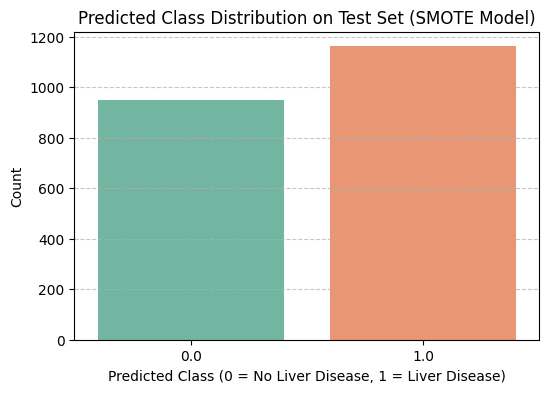

In [ ]:
# Ensure you're using the same numerical features
X_test = df_test[numerical_features]

# Predict class labels using the SMOTE pipeline
test_preds = smote_logreg_pipeline.predict(X_test)

# Predict probabilities (for ROC/AUC if needed)
test_proba = smote_logreg_pipeline.predict_proba(X_test)[:, 1]

# Output prediction counts
import numpy as np
unique, counts = np.unique(test_preds, return_counts=True)
print("Prediction distribution on test set:")
for label, count in zip(unique, counts):
    print(f"Class {label}: {count} instances")

# Visualize prediction distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x=test_preds, hue=test_preds, palette='Set2', legend=False)
plt.title("Predicted Class Distribution on Test Set (SMOTE Model)")
plt.xlabel("Predicted Class (0 = No Liver Disease, 1 = Liver Disease)")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### SVM


============================ SVM with linear kernel + SMOTE ============================



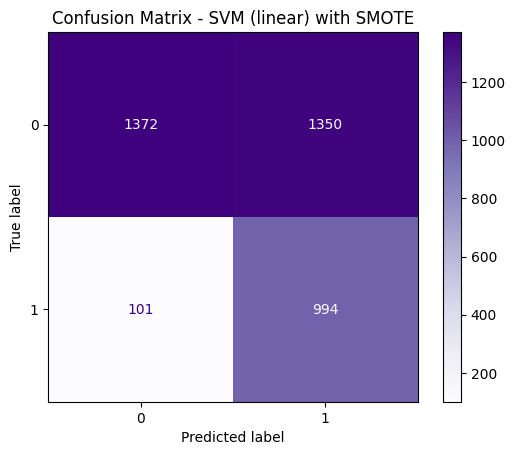

Classification Report - SVM (linear) with SMOTE:

              precision    recall  f1-score   support

         0.0       0.93      0.50      0.65      2722
         1.0       0.42      0.91      0.58      1095

    accuracy                           0.62      3817
   macro avg       0.68      0.71      0.62      3817
weighted avg       0.79      0.62      0.63      3817

 Recall for class 1 (Liver Disease): 0.9078


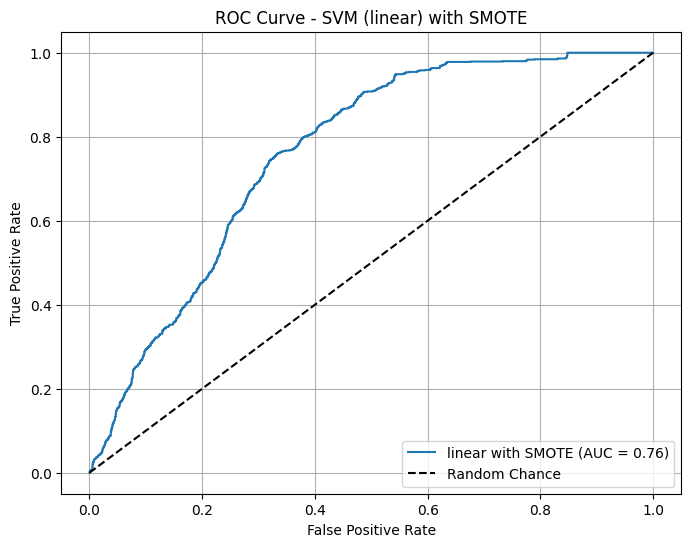


============================ SVM with poly kernel + SMOTE ============================



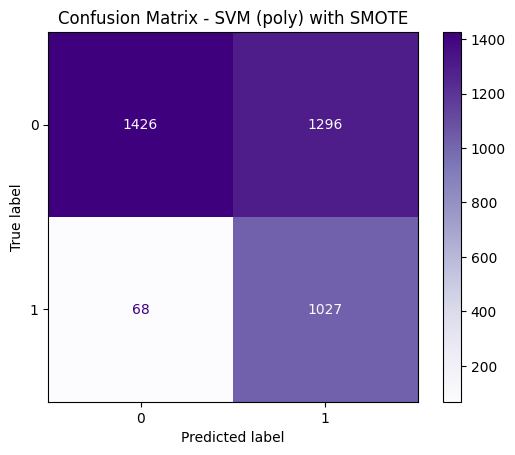

Classification Report - SVM (poly) with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.52      0.68      2722
         1.0       0.44      0.94      0.60      1095

    accuracy                           0.64      3817
   macro avg       0.70      0.73      0.64      3817
weighted avg       0.81      0.64      0.65      3817

 Recall for class 1 (Liver Disease): 0.9379


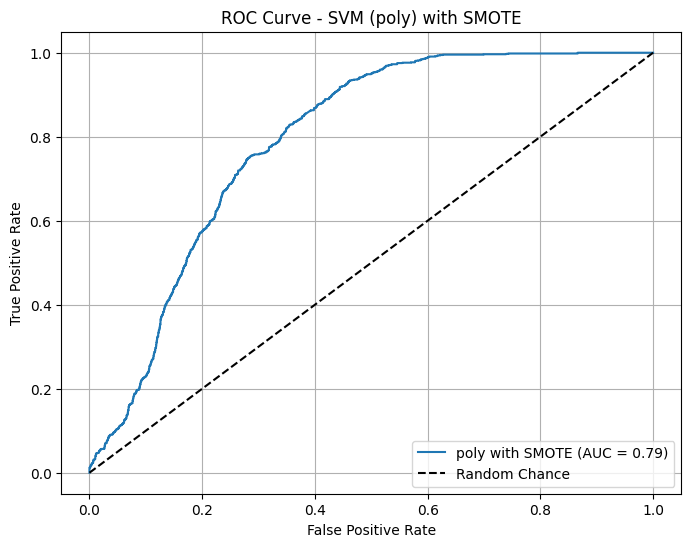


============================ SVM with rbf kernel + SMOTE ============================



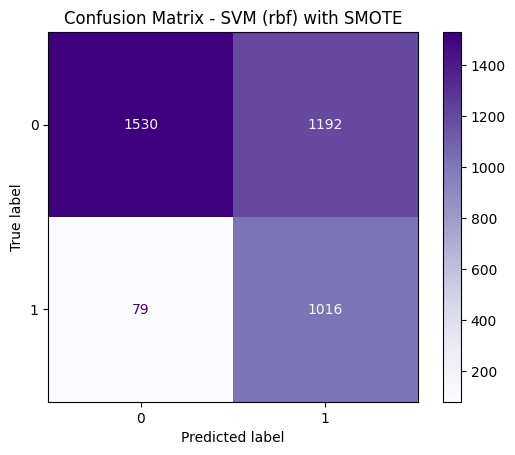

Classification Report - SVM (rbf) with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.56      0.71      2722
         1.0       0.46      0.93      0.62      1095

    accuracy                           0.67      3817
   macro avg       0.71      0.74      0.66      3817
weighted avg       0.81      0.67      0.68      3817

 Recall for class 1 (Liver Disease): 0.9279


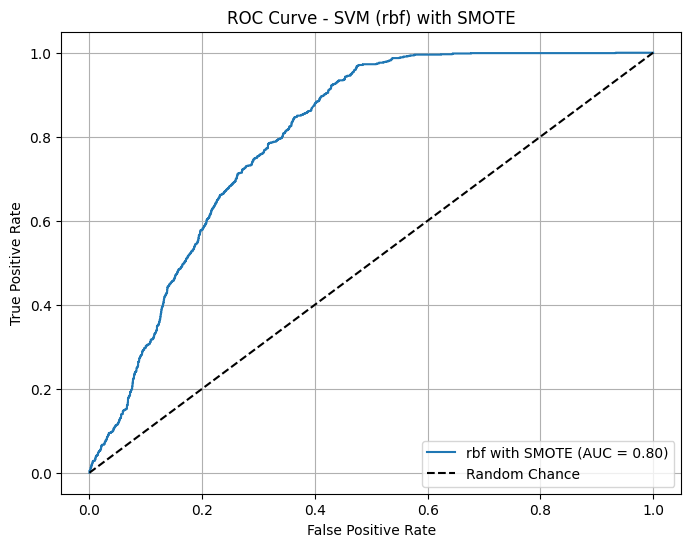


============================ SVM with sigmoid kernel + SMOTE ============================



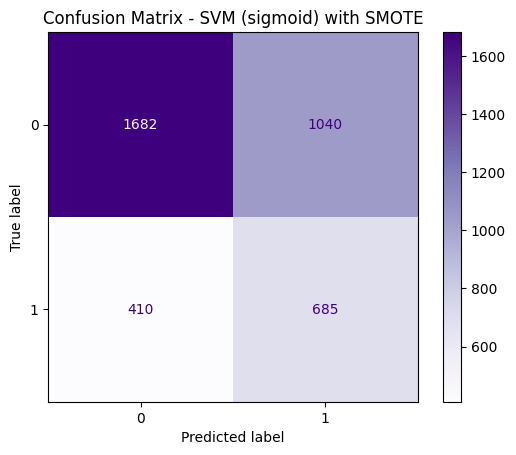

Classification Report - SVM (sigmoid) with SMOTE:

              precision    recall  f1-score   support

         0.0       0.80      0.62      0.70      2722
         1.0       0.40      0.63      0.49      1095

    accuracy                           0.62      3817
   macro avg       0.60      0.62      0.59      3817
weighted avg       0.69      0.62      0.64      3817

 Recall for class 1 (Liver Disease): 0.6256


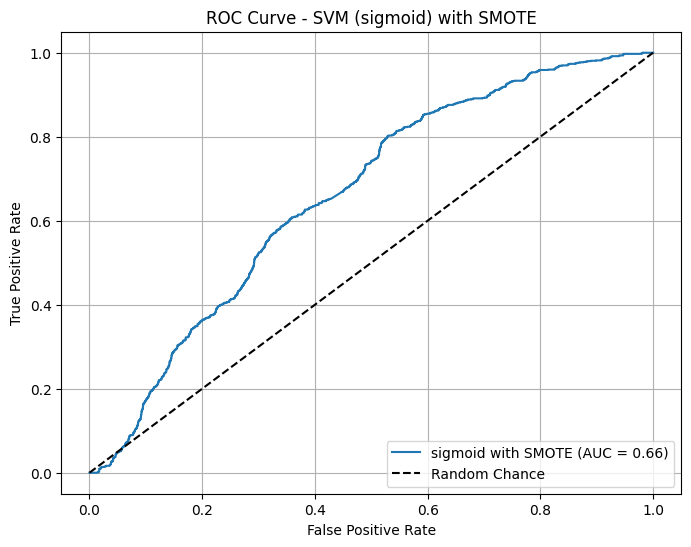


 Best SVM Kernel with SMOTE: 'poly' with Recall = 0.9379


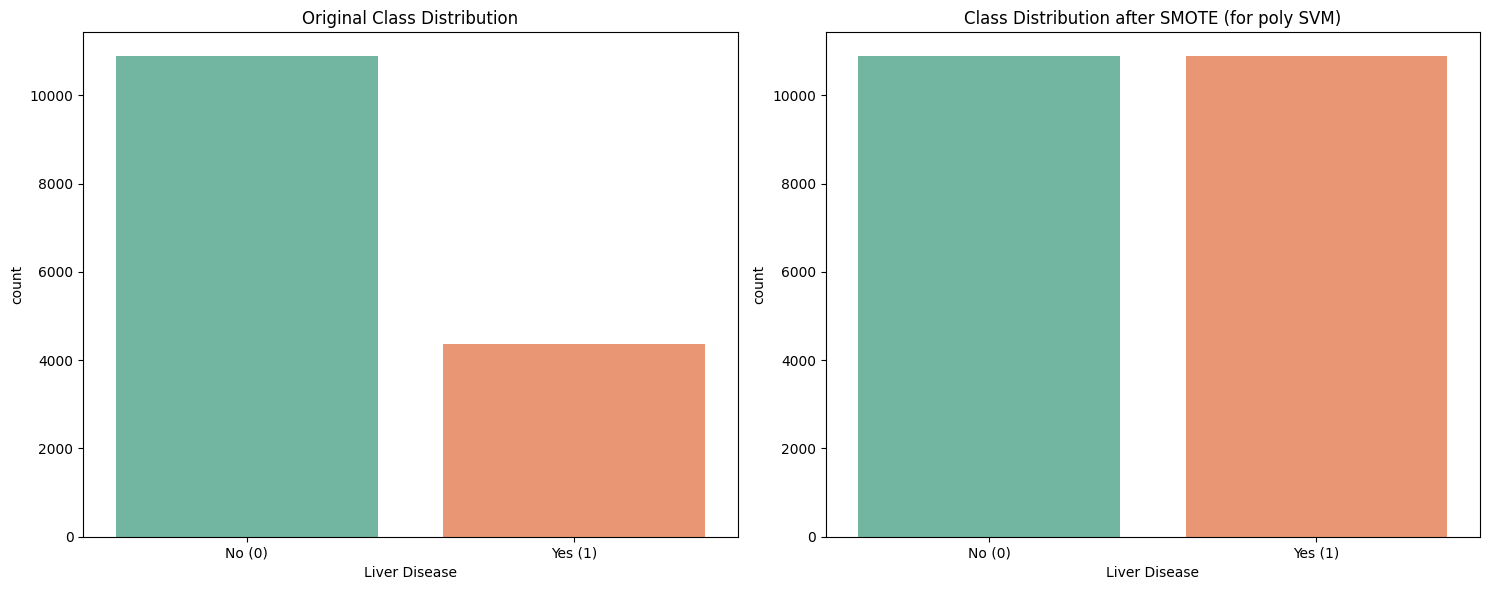

Original class distribution: [10887  4379]
After SMOTE: [10887 10887]


In [ ]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# List of kernels to try
svm_kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# To keep track of best model
svm_results = {}

for kernel in svm_kernels:
    print(f"\n============================ SVM with {kernel} kernel + SMOTE ============================\n")

    # Use imblearn's Pipeline to incorporate SMOTE
    svm_smote_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('svm', SVC(kernel=kernel, probability=True, random_state=42))
        # Note: No need for class_weight='balanced' when using SMOTE
    ])

    # Train model
    svm_smote_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = svm_smote_pipeline.predict(X_val[numerical_features])
    y_val_proba = svm_smote_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples')
    plt.title(f"Confusion Matrix - SVM ({kernel}) with SMOTE")
    plt.grid(False)
    plt.show()

    # Classification Report
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    print(f"Classification Report - SVM ({kernel}) with SMOTE:\n")
    print(classification_report(y_val, y_val_pred, zero_division=0))

    # Safely extract recall for class 1
    label_key = [key for key in report.keys() if str(key) in ['1', '1.0'] or key == 1 or key == 1.0]
    recall = report.get(label_key[0], {}).get('recall', 0) if label_key else 0
    print(f" Recall for class 1 (Liver Disease): {recall:.4f}")

    # ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{kernel} with SMOTE (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - SVM ({kernel}) with SMOTE')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    # Save results
    svm_results[kernel] = {
        'pipeline': svm_smote_pipeline,
        'recall': recall,
        'auc': roc_auc
    }

# Step: Select Best Kernel by Recall
best_kernel = max(svm_results.items(), key=lambda x: x[1]['recall'])[0]
best_model = svm_results[best_kernel]['pipeline']
best_recall = svm_results[best_kernel]['recall']
print(f"\n Best SVM Kernel with SMOTE: '{best_kernel}' with Recall = {best_recall:.4f}")

# Optional: Visualize resampling effect for the best kernel
def visualize_smote_effect(X_train_data, y_train_data, kernel):
    plt.figure(figsize=(15, 6))

    # Original class distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train_data, hue=y_train_data, palette="Set2", legend=False)
    plt.title("Original Class Distribution")
    plt.xlabel("Liver Disease")
    plt.xticks([0, 1], ["No (0)", "Yes (1)"])

    # Apply preprocessing steps
    imputer = SimpleImputer(strategy='median')
    scaler = StandardScaler()
    X_processed = scaler.fit_transform(imputer.fit_transform(X_train_data[numerical_features]))

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_processed, y_train_data)

    # After SMOTE distribution
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_resampled, hue=y_resampled, palette="Set2", legend=False)
    plt.title(f"Class Distribution after SMOTE (for {kernel} SVM)")
    plt.xlabel("Liver Disease")
    plt.xticks([0, 1], ["No (0)", "Yes (1)"])

    plt.tight_layout()
    plt.show()

    print(f"Original class distribution: {np.bincount(y_train_data)}")
    print(f"After SMOTE: {np.bincount(y_resampled)}")

# Visualize the effect of SMOTE for the best kernel
visualize_smote_effect(X_train, y_train, best_kernel)

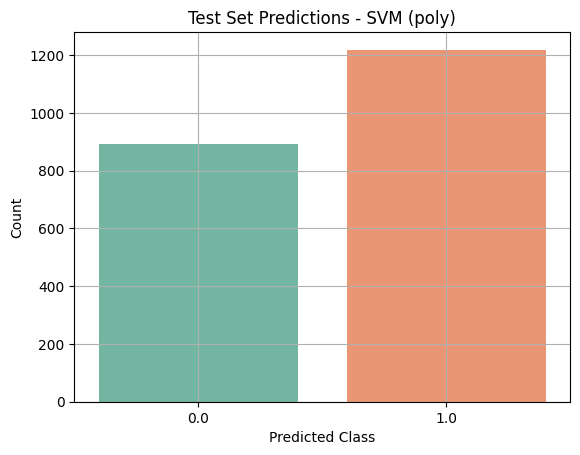


 Test Set Prediction Distribution:
Class 0: 891 instances
Class 1: 1219 instances


In [ ]:
# Step: Predict on Test Set using Best SVM
X_test = df_test[numerical_features]
test_preds = best_model.predict(X_test)
test_proba = best_model.predict_proba(X_test)[:, 1]

# Plot prediction distribution
sns.countplot(x=test_preds, hue=test_preds, palette='Set2', legend=False)
plt.title(f"Test Set Predictions - SVM ({best_kernel})")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.grid()
plt.show()

# Print counts
unique, counts = np.unique(test_preds, return_counts=True)
print("\n Test Set Prediction Distribution:")
for label, count in zip(unique, counts):
    print(f"Class {int(label)}: {count} instances")


### KNN


========================= KNN (k=2) with SMOTE =========================

 Classification Report for k=2 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      2722
         1.0       0.88      0.82      0.85      1095

    accuracy                           0.92      3817
   macro avg       0.91      0.89      0.90      3817
weighted avg       0.92      0.92      0.92      3817



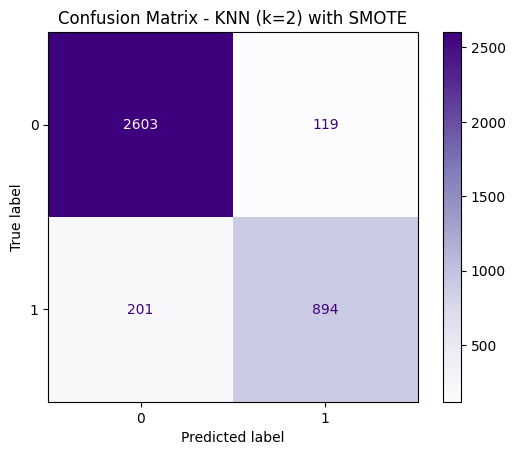

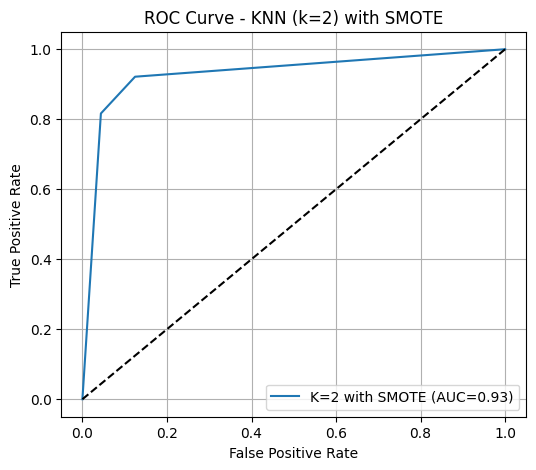


========================= KNN (k=3) with SMOTE =========================

 Classification Report for k=3 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      2722
         1.0       0.78      0.88      0.83      1095

    accuracy                           0.89      3817
   macro avg       0.86      0.89      0.87      3817
weighted avg       0.90      0.89      0.90      3817



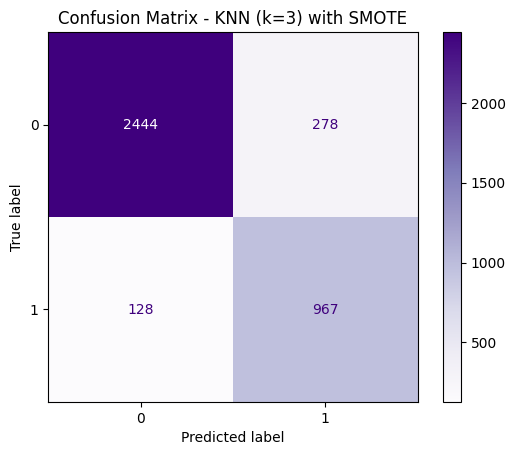

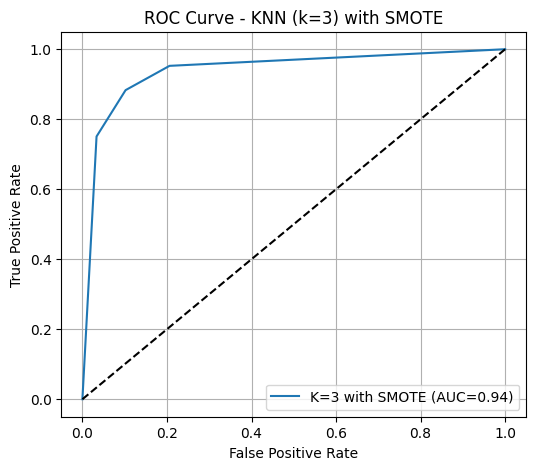


========================= KNN (k=4) with SMOTE =========================

 Classification Report for k=4 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      2722
         1.0       0.81      0.84      0.82      1095

    accuracy                           0.90      3817
   macro avg       0.87      0.88      0.88      3817
weighted avg       0.90      0.90      0.90      3817



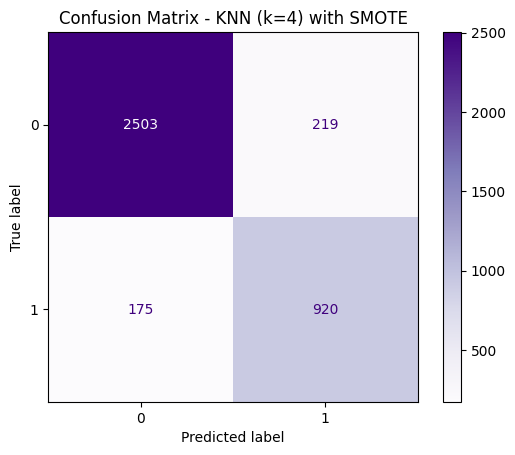

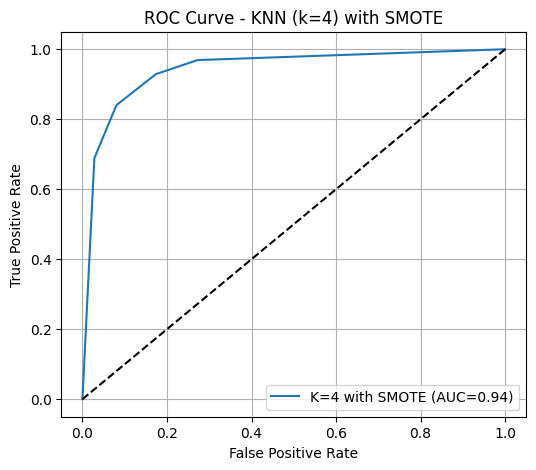


========================= KNN (k=5) with SMOTE =========================

 Classification Report for k=5 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.85      0.90      2722
         1.0       0.71      0.90      0.79      1095

    accuracy                           0.87      3817
   macro avg       0.83      0.88      0.85      3817
weighted avg       0.88      0.87      0.87      3817



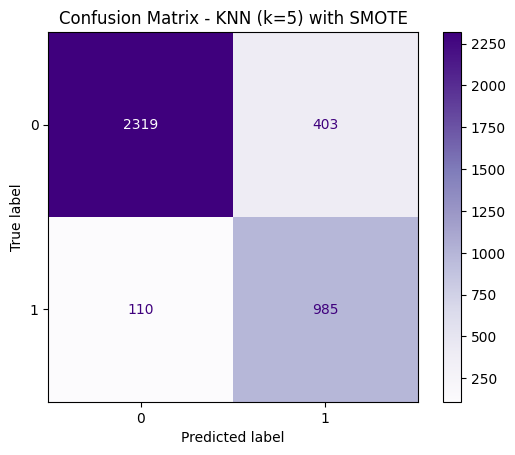

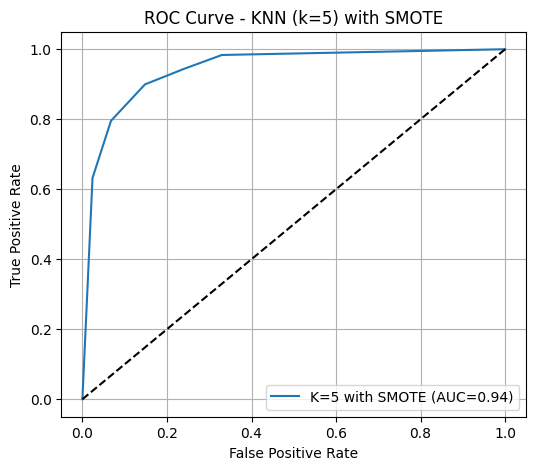


========================= KNN (k=6) with SMOTE =========================

 Classification Report for k=6 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.94      0.88      0.91      2722
         1.0       0.74      0.86      0.80      1095

    accuracy                           0.87      3817
   macro avg       0.84      0.87      0.85      3817
weighted avg       0.88      0.87      0.88      3817



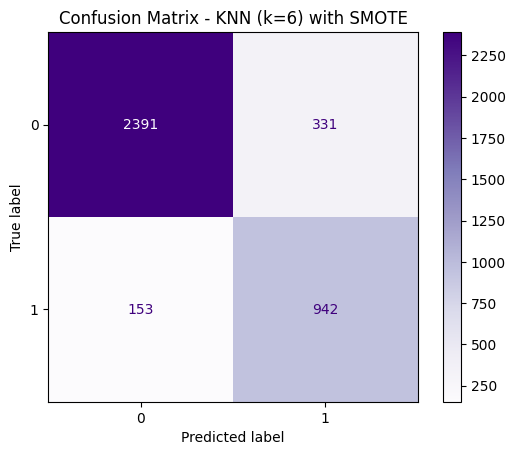

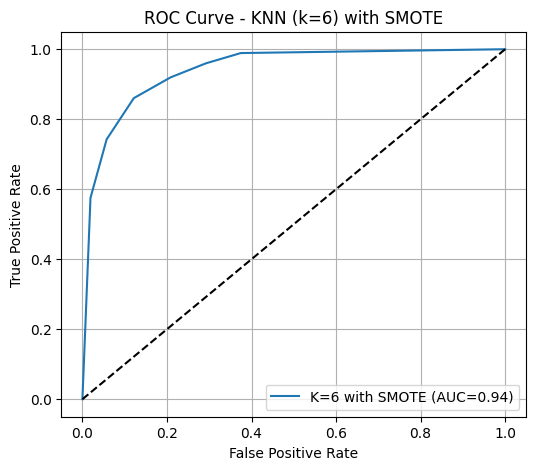


========================= KNN (k=7) with SMOTE =========================

 Classification Report for k=7 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.82      0.88      2722
         1.0       0.67      0.89      0.76      1095

    accuracy                           0.84      3817
   macro avg       0.81      0.86      0.82      3817
weighted avg       0.87      0.84      0.85      3817



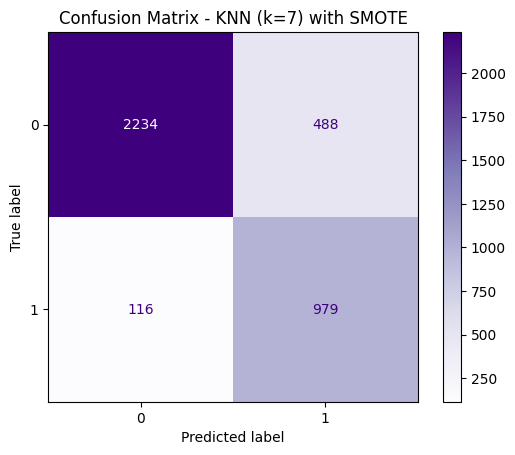

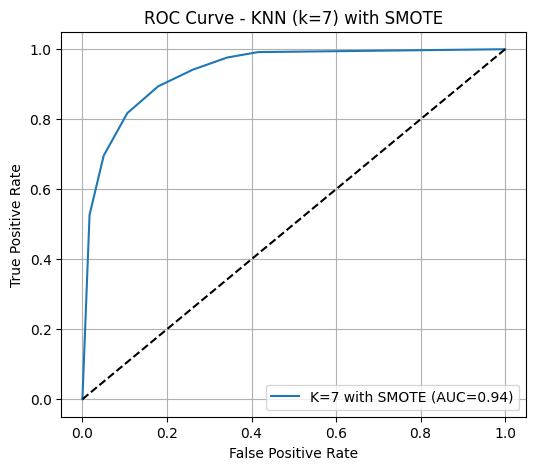


========================= KNN (k=8) with SMOTE =========================

 Classification Report for k=8 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89      2722
         1.0       0.69      0.87      0.77      1095

    accuracy                           0.85      3817
   macro avg       0.81      0.85      0.83      3817
weighted avg       0.87      0.85      0.85      3817



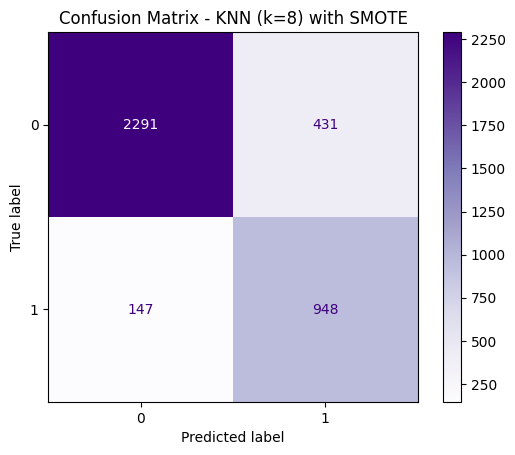

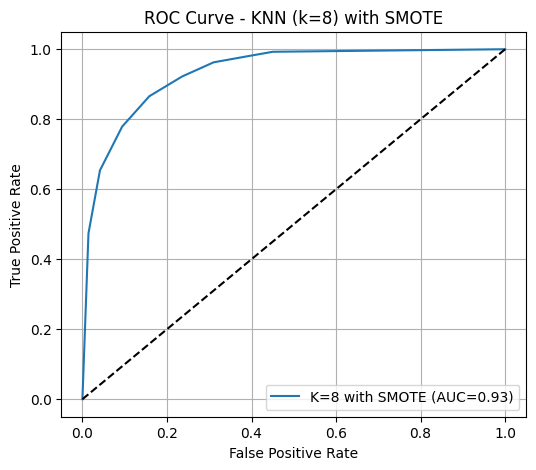


========================= KNN (k=9) with SMOTE =========================

 Classification Report for k=9 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.79      0.86      2722
         1.0       0.63      0.90      0.74      1095

    accuracy                           0.82      3817
   macro avg       0.79      0.84      0.80      3817
weighted avg       0.86      0.82      0.83      3817



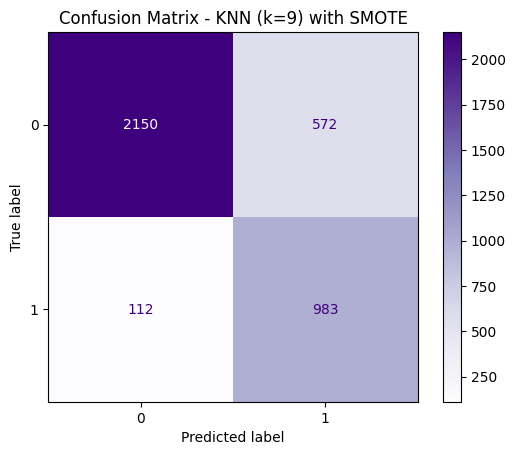

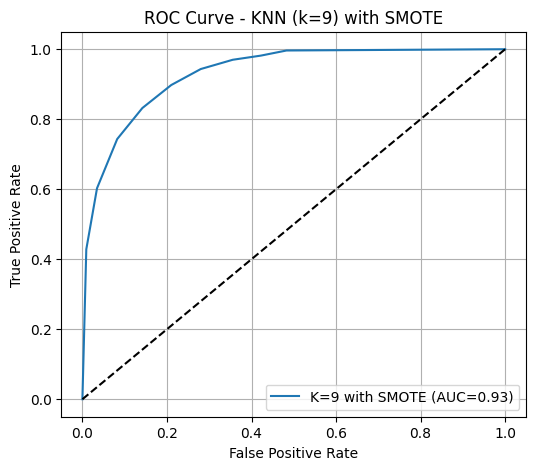


========================= KNN (k=10) with SMOTE =========================

 Classification Report for k=10 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87      2722
         1.0       0.65      0.87      0.75      1095

    accuracy                           0.83      3817
   macro avg       0.80      0.84      0.81      3817
weighted avg       0.86      0.83      0.83      3817



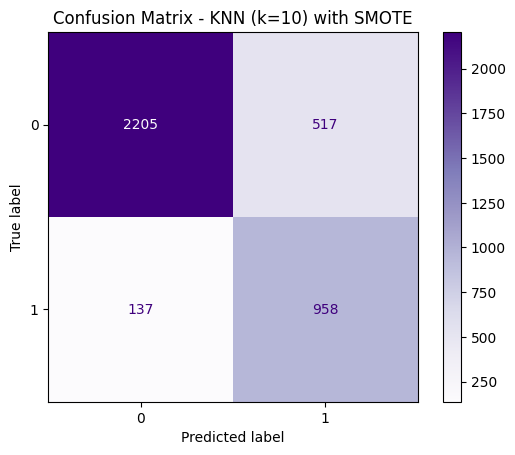

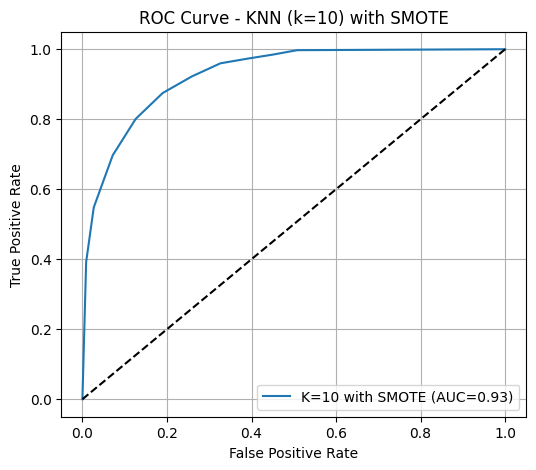


========================= KNN (k=11) with SMOTE =========================

 Classification Report for k=11 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      2722
         1.0       0.61      0.90      0.72      1095

    accuracy                           0.80      3817
   macro avg       0.78      0.83      0.79      3817
weighted avg       0.85      0.80      0.81      3817



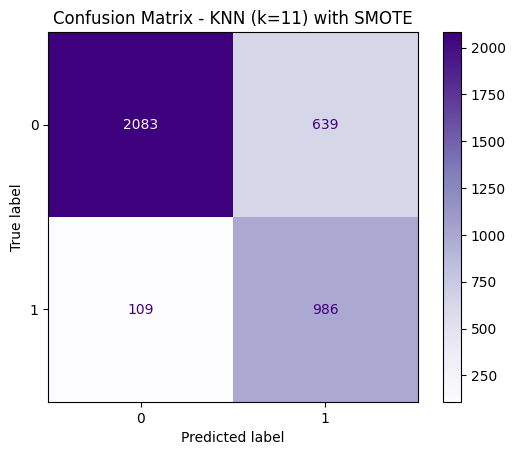

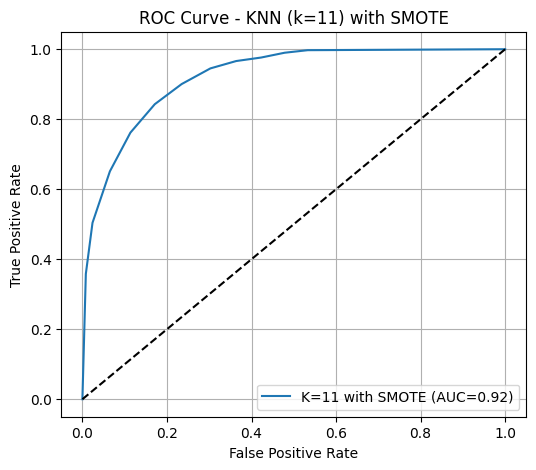


========================= KNN (k=12) with SMOTE =========================

 Classification Report for k=12 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86      2722
         1.0       0.63      0.88      0.73      1095

    accuracy                           0.81      3817
   macro avg       0.78      0.83      0.79      3817
weighted avg       0.85      0.81      0.82      3817



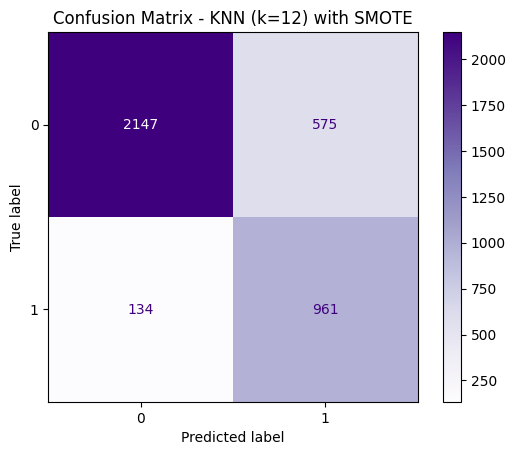

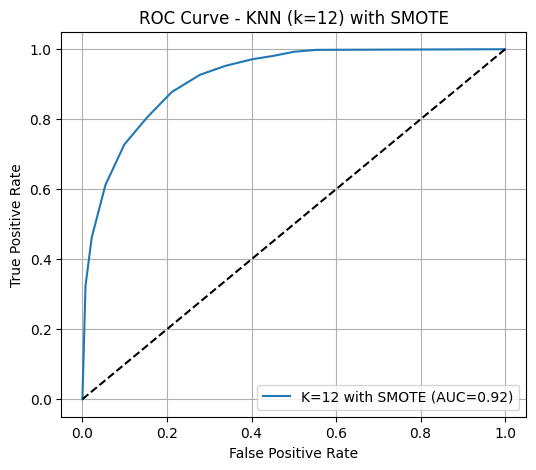


========================= KNN (k=13) with SMOTE =========================

 Classification Report for k=13 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84      2722
         1.0       0.59      0.90      0.71      1095

    accuracy                           0.79      3817
   macro avg       0.77      0.83      0.78      3817
weighted avg       0.85      0.79      0.80      3817



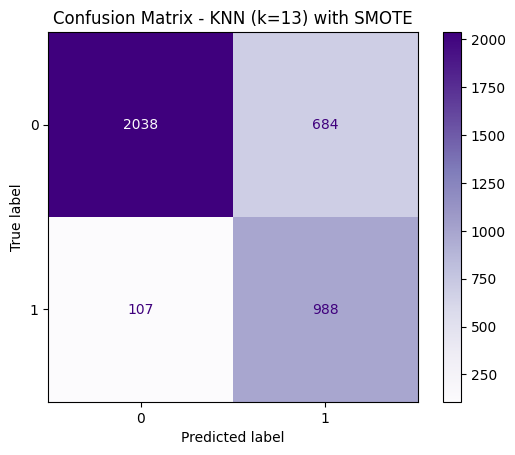

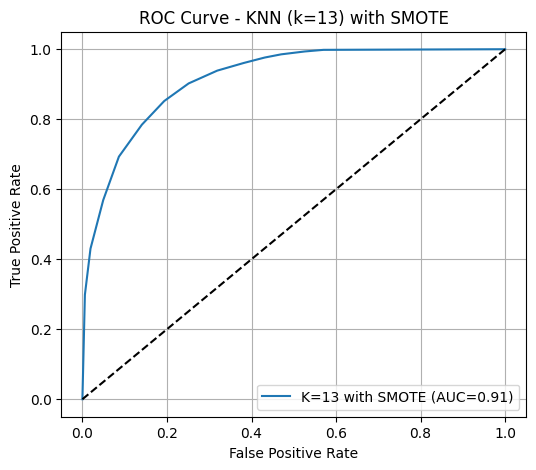


========================= KNN (k=14) with SMOTE =========================

 Classification Report for k=14 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      2722
         1.0       0.60      0.88      0.72      1095

    accuracy                           0.80      3817
   macro avg       0.77      0.82      0.78      3817
weighted avg       0.84      0.80      0.81      3817



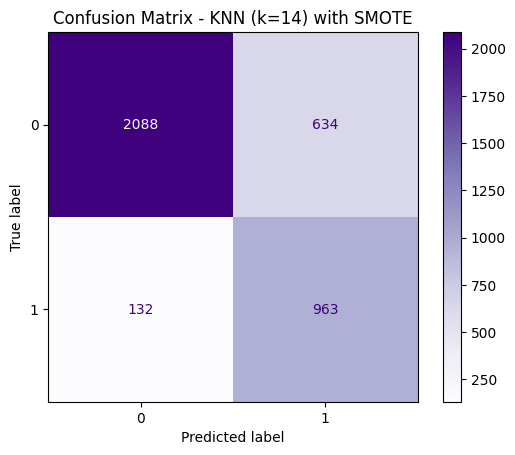

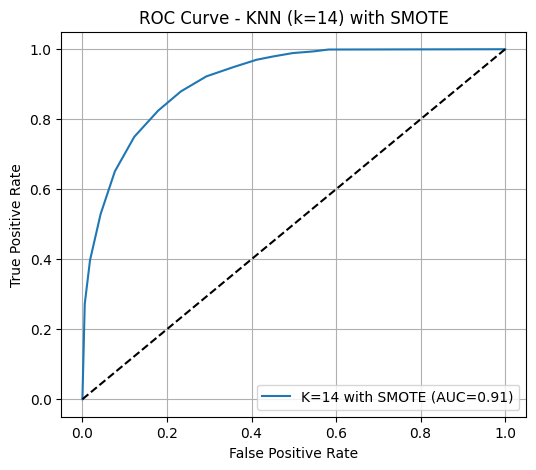


========================= KNN (k=15) with SMOTE =========================

 Classification Report for k=15 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.73      0.82      2722
         1.0       0.57      0.90      0.70      1095

    accuracy                           0.78      3817
   macro avg       0.76      0.81      0.76      3817
weighted avg       0.84      0.78      0.79      3817



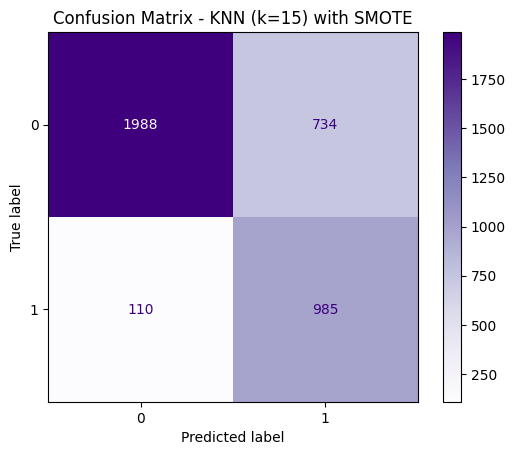

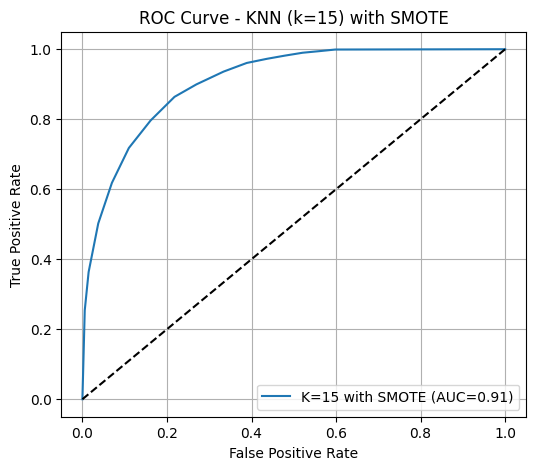


========================= KNN (k=16) with SMOTE =========================

 Classification Report for k=16 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.94      0.75      0.83      2722
         1.0       0.59      0.88      0.70      1095

    accuracy                           0.79      3817
   macro avg       0.76      0.81      0.77      3817
weighted avg       0.84      0.79      0.80      3817



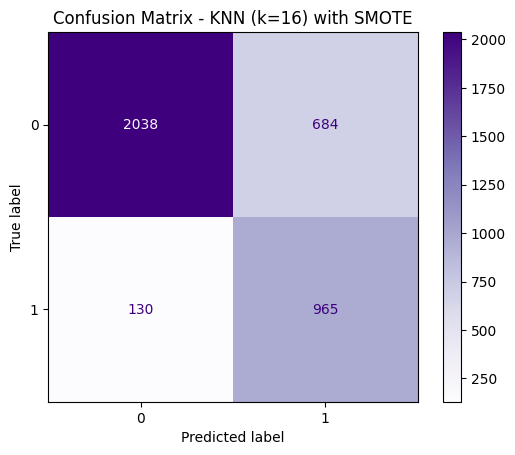

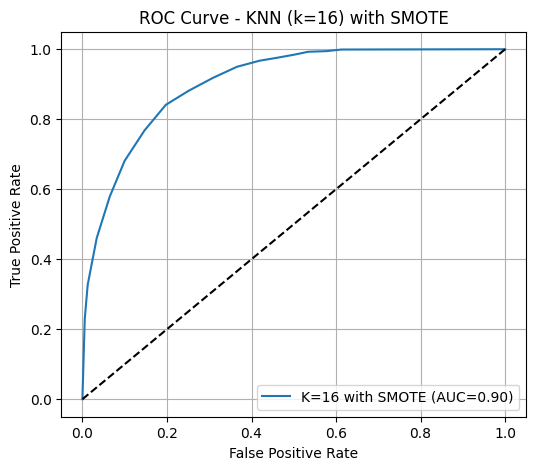


========================= KNN (k=17) with SMOTE =========================

 Classification Report for k=17 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81      2722
         1.0       0.56      0.90      0.69      1095

    accuracy                           0.77      3817
   macro avg       0.75      0.81      0.75      3817
weighted avg       0.84      0.77      0.78      3817



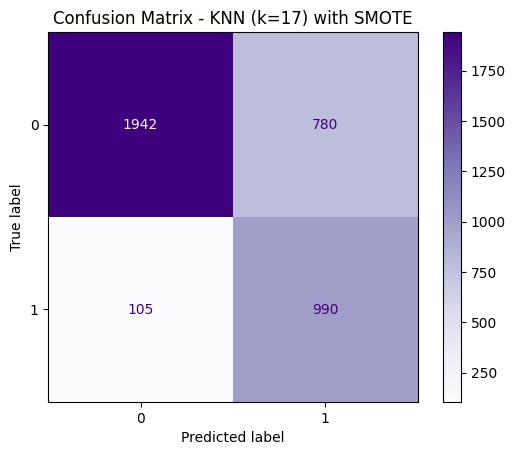

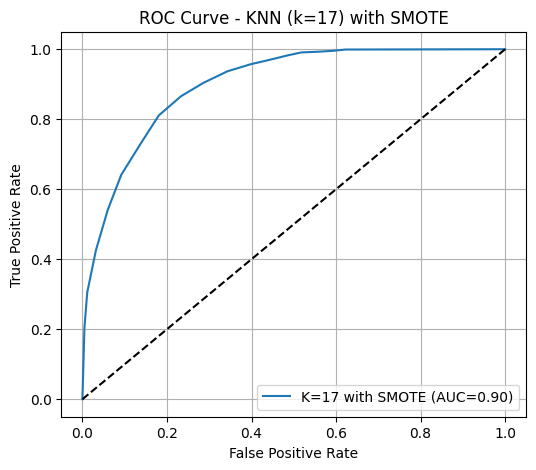


========================= KNN (k=18) with SMOTE =========================

 Classification Report for k=18 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82      2722
         1.0       0.57      0.89      0.70      1095

    accuracy                           0.78      3817
   macro avg       0.76      0.81      0.76      3817
weighted avg       0.84      0.78      0.79      3817



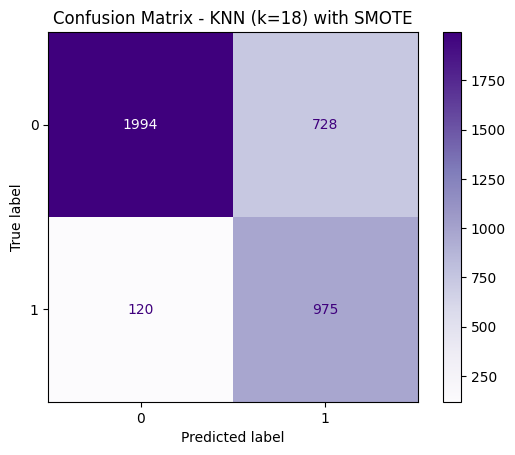

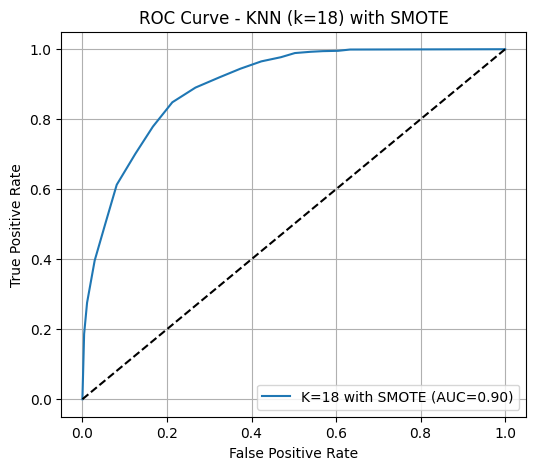


========================= KNN (k=19) with SMOTE =========================

 Classification Report for k=19 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.95      0.70      0.80      2722
         1.0       0.55      0.91      0.68      1095

    accuracy                           0.76      3817
   macro avg       0.75      0.80      0.74      3817
weighted avg       0.83      0.76      0.77      3817



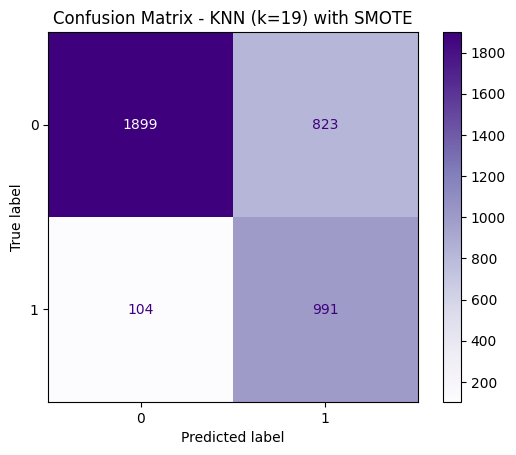

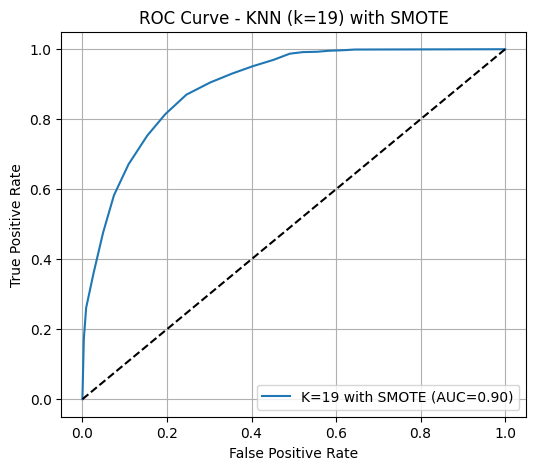


========================= KNN (k=20) with SMOTE =========================

 Classification Report for k=20 with SMOTE:

              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82      2722
         1.0       0.56      0.89      0.69      1095

    accuracy                           0.77      3817
   macro avg       0.75      0.81      0.75      3817
weighted avg       0.83      0.77      0.78      3817



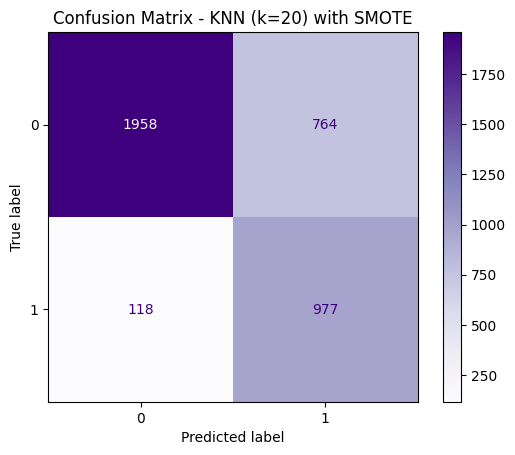

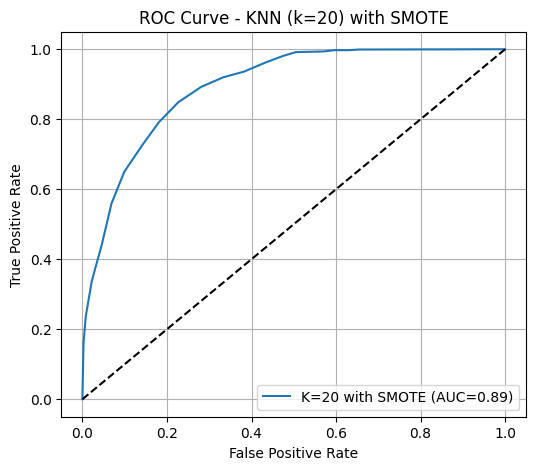


 KNN with SMOTE Summary (k=2 to 20):

     k  accuracy    recall       auc
0   19  0.757139  0.905023  0.895300
1   17  0.768143  0.904110  0.900016
2   13  0.792769  0.902283  0.914931
3   11  0.804035  0.900457  0.921626
4   15  0.778884  0.899543  0.908305
5    5  0.865601  0.899543  0.942901
6    9  0.820802  0.897717  0.930968
7    7  0.841761  0.894064  0.936782
8   20  0.768928  0.892237  0.893735
9   18  0.777836  0.890411  0.897752
10   3  0.893634  0.883105  0.939142
11  16  0.786744  0.881279  0.904339
12  14  0.799319  0.879452  0.911141
13  12  0.814252  0.877626  0.918302
14  10  0.828661  0.874886  0.926834
15   8  0.848572  0.865753  0.933246
16   6  0.873199  0.860274  0.940429
17   4  0.896778  0.840183  0.942046
18   2  0.916165  0.816438  0.929158


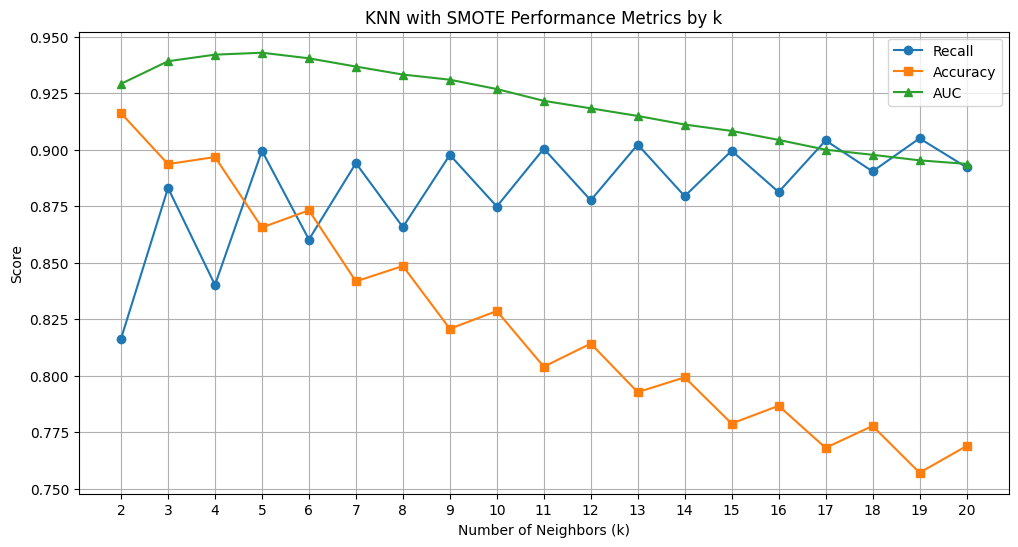


 Best k based on Recall: 19.0 (Recall = 0.9050, Accuracy = 0.7571, AUC = 0.8953)


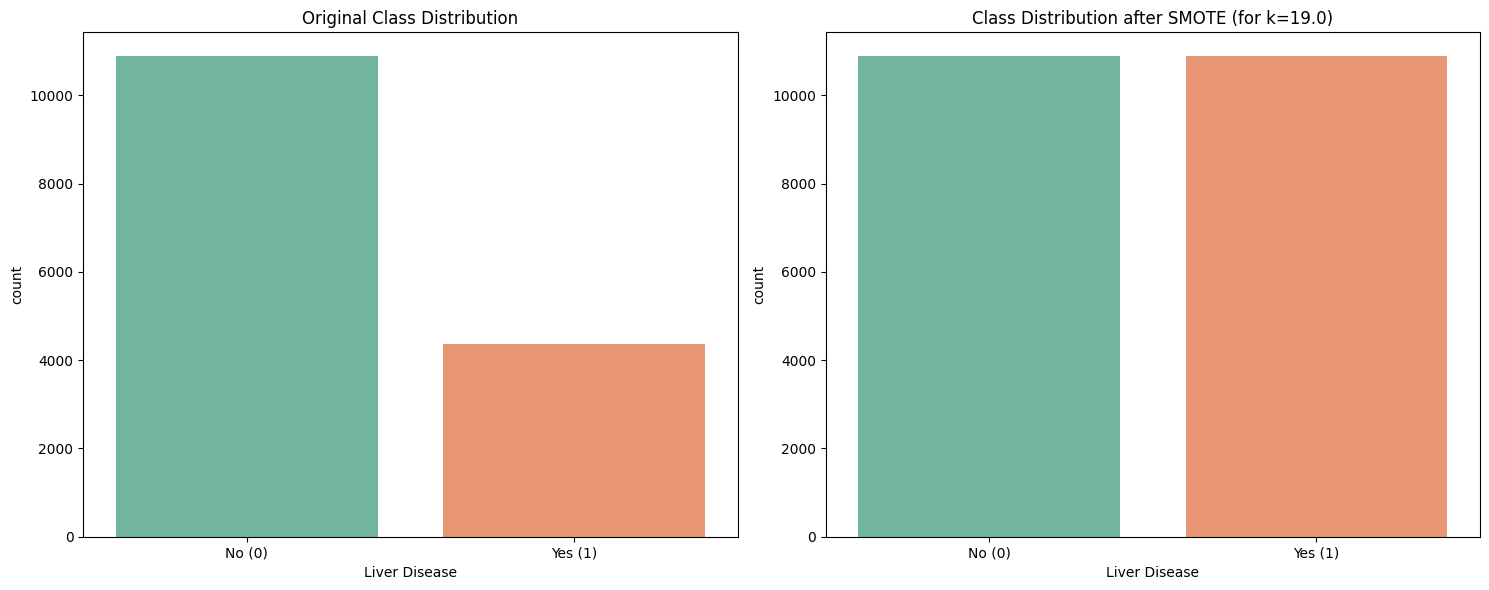

Original class distribution: [10887  4379]
After SMOTE: [10887 10887]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Store performance metrics
knn_results = []

for k in range(2, 21):
    print(f"\n========================= KNN (k={k}) with SMOTE =========================\n")

    # Use imblearn's Pipeline to incorporate SMOTE
    knn_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])

    # Train
    knn_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = knn_pipeline.predict(X_val[numerical_features])
    y_val_proba = knn_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Classification Report
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    print(f" Classification Report for k={k} with SMOTE:\n")
    print(classification_report(y_val, y_val_pred, zero_division=0))

    # Safely extract recall for class 1
    label_key = [key for key in report.keys() if str(key) in ['1', '1.0'] or key == 1 or key == 1.0]
    recall = report.get(label_key[0], {}).get('recall', 0) if label_key else 0
    accuracy = accuracy_score(y_val, y_val_pred)

    # ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    knn_results.append({
        'k': k,
        'accuracy': accuracy,
        'recall': recall,
        'auc': roc_auc
    })

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples')
    plt.title(f"Confusion Matrix - KNN (k={k}) with SMOTE")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'K={k} with SMOTE (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - KNN (k={k}) with SMOTE')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Results Summary
knn_df = pd.DataFrame(knn_results)
print("\n KNN with SMOTE Summary (k=2 to 20):\n")
print(knn_df.sort_values(by='recall', ascending=False).reset_index(drop=True))

# Plot metrics vs k
plt.figure(figsize=(12, 6))
plt.plot(knn_df['k'], knn_df['recall'], 'o-', label='Recall')
plt.plot(knn_df['k'], knn_df['accuracy'], 's-', label='Accuracy')
plt.plot(knn_df['k'], knn_df['auc'], '^-', label='AUC')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Score')
plt.title('KNN with SMOTE Performance Metrics by k')
plt.grid(True)
plt.legend()
plt.xticks(range(2, 21))
plt.show()

# Best K
best_k_row = knn_df.loc[knn_df['recall'].idxmax()]
best_k = best_k_row['k']
print(f"\n Best k based on Recall: {best_k} (Recall = {best_k_row['recall']:.4f}, Accuracy = {best_k_row['accuracy']:.4f}, AUC = {best_k_row['auc']:.4f})")

# Final Model on Full Training Set
final_knn_pipeline = ImbPipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=int(best_k)))
])
final_knn_pipeline.fit(X_train[numerical_features], y_train)

# Visualize SMOTE effect for the best k
def visualize_smote_effect(X_train_data, y_train_data, best_k_value):
    plt.figure(figsize=(15, 6))

    # Original class distribution
    plt.subplot(1, 2, 1)
    sns.countplot(x=y_train_data, hue=y_train_data, palette="Set2", legend=False)
    plt.title("Original Class Distribution")
    plt.xlabel("Liver Disease")
    plt.xticks([0, 1], ["No (0)", "Yes (1)"])

    # Apply preprocessing steps
    imputer = SimpleImputer(strategy='median')
    scaler = StandardScaler()
    X_processed = scaler.fit_transform(imputer.fit_transform(X_train_data[numerical_features]))

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_processed, y_train_data)

    # After SMOTE distribution
    plt.subplot(1, 2, 2)
    sns.countplot(x=y_resampled, hue=y_resampled, palette="Set2", legend=False)
    plt.title(f"Class Distribution after SMOTE (for k={best_k_value})")
    plt.xlabel("Liver Disease")
    plt.xticks([0, 1], ["No (0)", "Yes (1)"])

    plt.tight_layout()
    plt.show()

    print(f"Original class distribution: {np.bincount(y_train_data)}")
    print(f"After SMOTE: {np.bincount(y_resampled)}")

# Visualize the effect of SMOTE for best k
visualize_smote_effect(X_train, y_train, best_k)

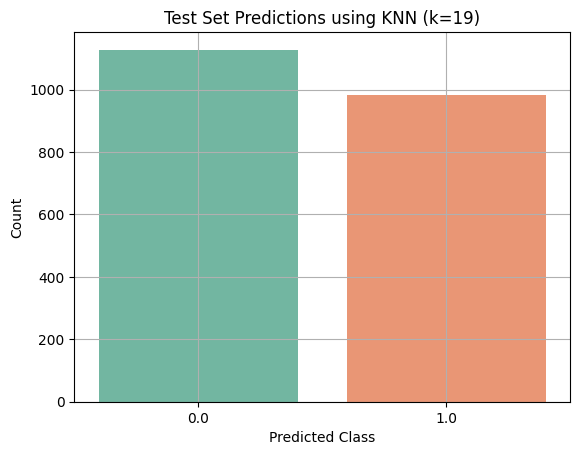


 Prediction distribution on test set:
Class 0: 1128 instances
Class 1: 982 instances


In [ ]:
# Predict on Test Set
X_test = df_test[numerical_features]
test_preds = final_knn_pipeline.predict(X_test)
test_proba = final_knn_pipeline.predict_proba(X_test)[:, 1]

# Prediction Distribution Plot (Fix seaborn warning)
sns.countplot(x=test_preds, hue=test_preds, palette='Set2', legend=False)
plt.title(f"Test Set Predictions using KNN (k={int(best_k)})")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.grid()
plt.show()

# Print Prediction Distribution
unique, counts = np.unique(test_preds, return_counts=True)
print("\n Prediction distribution on test set:")
for label, count in zip(unique, counts):
    print(f"Class {int(label)}: {count} instances")


### Decision Tree

Part 1: Standard Decision Tree using all features


 Classification Report - Decision Tree (with SMOTE):

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2722
         1.0       0.97      0.98      0.98      1095

    accuracy                           0.99      3817
   macro avg       0.98      0.98      0.98      3817
weighted avg       0.99      0.99      0.99      3817

 Recall (class 1 - Liver Disease): 0.9808
 Accuracy: 0.9866


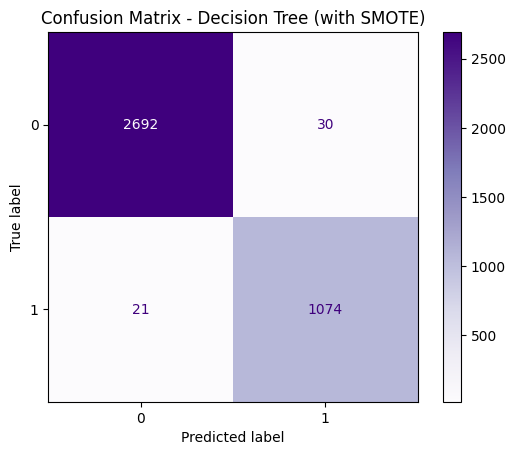

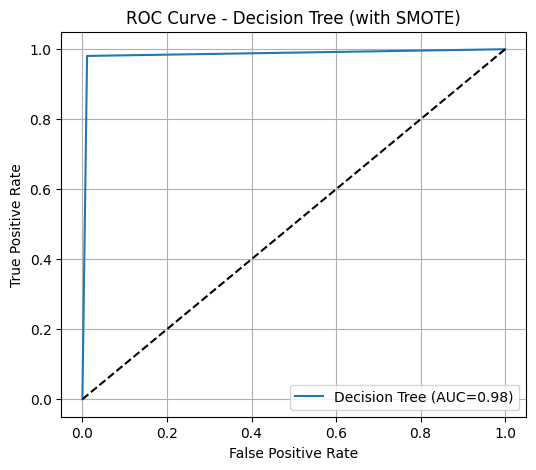

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline  # Note: imblearn's Pipeline, not sklearn's
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Define the pipeline with SMOTE
dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=42))
])

# Train the model
dt_pipeline.fit(X_train[numerical_features], y_train)

# Predict on validation set
y_val_pred = dt_pipeline.predict(X_val[numerical_features])
y_val_proba = dt_pipeline.predict_proba(X_val[numerical_features])[:, 1]

# Classification Report
report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
print("\n Classification Report - Decision Tree (with SMOTE):\n")
print(classification_report(y_val, y_val_pred, zero_division=0))

# Extract recall and accuracy
recall_class1 = report.get('1.0', {}).get('recall', 0)
accuracy = accuracy_score(y_val, y_val_pred)
print(f" Recall (class 1 - Liver Disease): {recall_class1:.4f}")
print(f" Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Purples')
plt.title("Confusion Matrix - Decision Tree (with SMOTE)")
plt.grid(False)
plt.show()

# ROC & AUC
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC={roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Decision Tree (with SMOTE)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()


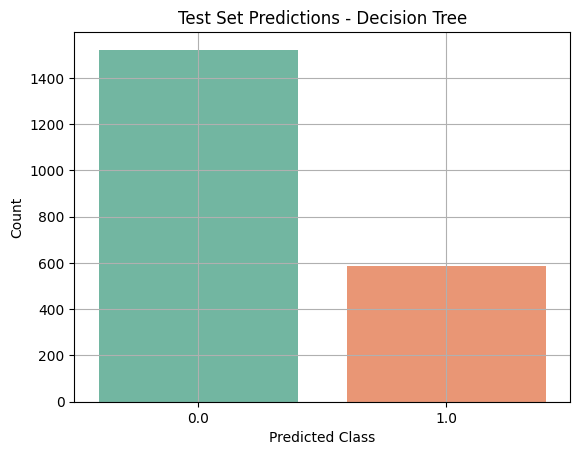


 Test Set Prediction Distribution:
Class 0: 1522 instances
Class 1: 588 instances


In [ ]:
# Predict on Test Set
test_preds = dt_pipeline.predict(df_test[numerical_features])
test_proba = dt_pipeline.predict_proba(df_test[numerical_features])[:, 1]

# Prediction Distribution
sns.countplot(x=test_preds, hue=test_preds, palette='Set2', legend=False)
plt.title("Test Set Predictions - Decision Tree")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.grid()
plt.show()

# Print prediction counts
unique, counts = np.unique(test_preds, return_counts=True)
print("\n Test Set Prediction Distribution:")
for label, count in zip(unique, counts):
    print(f"Class {int(label)}: {count} instances")


Part 2: Decision Tree with feature subset (1 to n features)


 Evaluating Decision Tree with Feature Subsets:


 Decision Tree using first 1 features:
              precision    recall  f1-score   support

         0.0       0.71      0.39      0.51      2722
         1.0       0.29      0.61      0.39      1095

    accuracy                           0.45      3817
   macro avg       0.50      0.50      0.45      3817
weighted avg       0.59      0.45      0.47      3817

 Recall (class 1): 0.6073
 Accuracy: 0.4532
 AUC: 0.5070


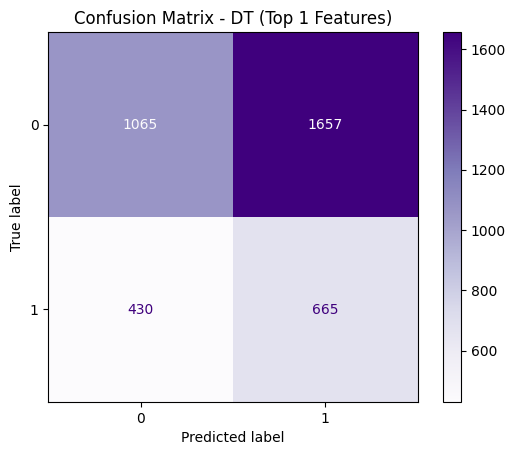

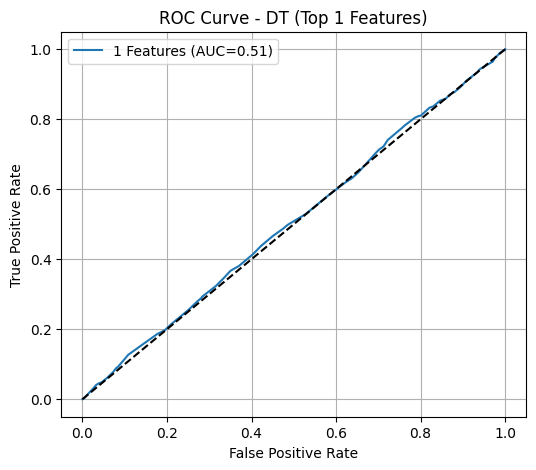


 Decision Tree using first 2 features:
              precision    recall  f1-score   support

         0.0       0.71      0.49      0.58      2722
         1.0       0.28      0.50      0.36      1095

    accuracy                           0.49      3817
   macro avg       0.50      0.49      0.47      3817
weighted avg       0.59      0.49      0.52      3817

 Recall (class 1): 0.4977
 Accuracy: 0.4933
 AUC: 0.4913


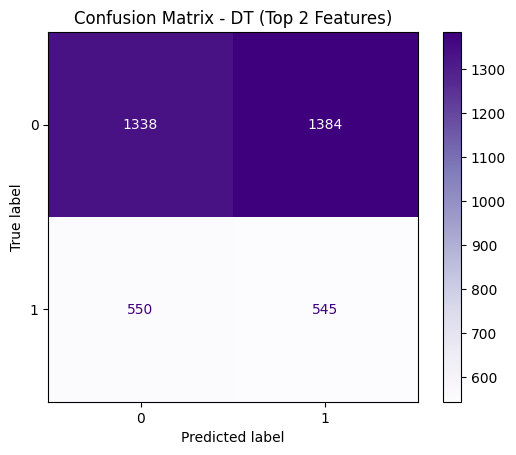

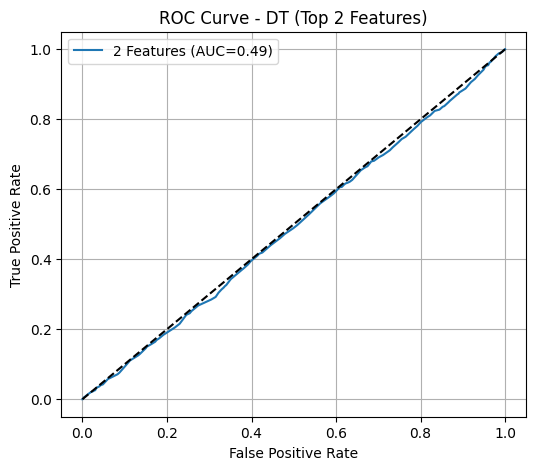


 Decision Tree using first 3 features:
              precision    recall  f1-score   support

         0.0       0.79      0.64      0.71      2722
         1.0       0.40      0.59      0.47      1095

    accuracy                           0.62      3817
   macro avg       0.60      0.61      0.59      3817
weighted avg       0.68      0.62      0.64      3817

 Recall (class 1): 0.5900
 Accuracy: 0.6241
 AUC: 0.6575


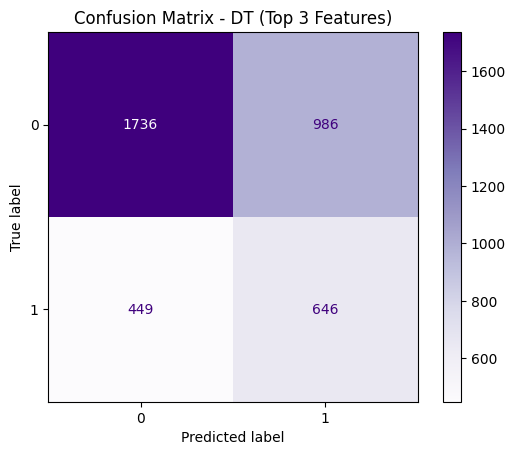

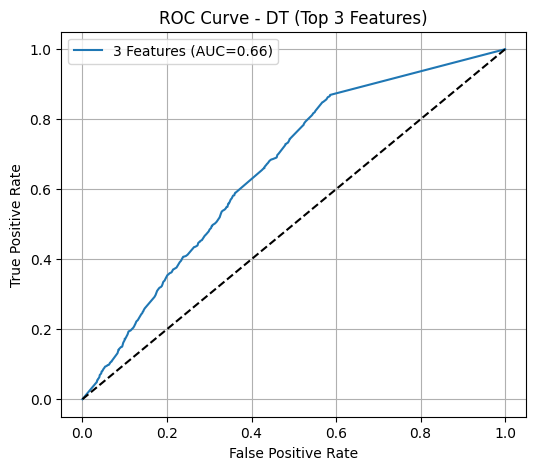


 Decision Tree using first 4 features:
              precision    recall  f1-score   support

         0.0       0.81      0.72      0.76      2722
         1.0       0.46      0.59      0.52      1095

    accuracy                           0.68      3817
   macro avg       0.64      0.66      0.64      3817
weighted avg       0.71      0.68      0.69      3817

 Recall (class 1): 0.5945
 Accuracy: 0.6819
 AUC: 0.7308


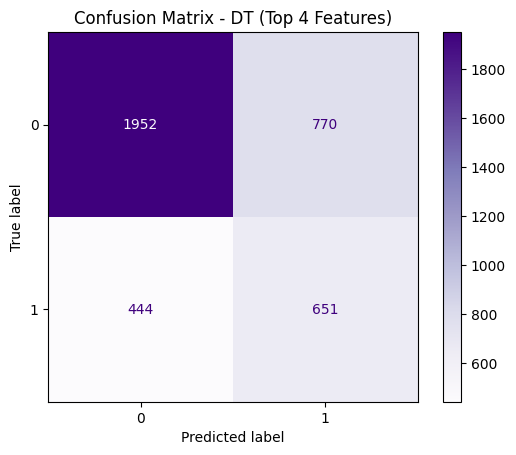

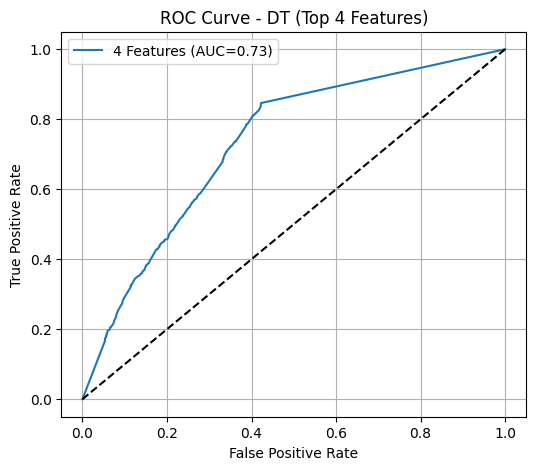


 Decision Tree using first 5 features:
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94      2722
         1.0       0.87      0.85      0.86      1095

    accuracy                           0.92      3817
   macro avg       0.90      0.90      0.90      3817
weighted avg       0.92      0.92      0.92      3817

 Recall (class 1): 0.8457
 Accuracy: 0.9188
 AUC: 0.9123


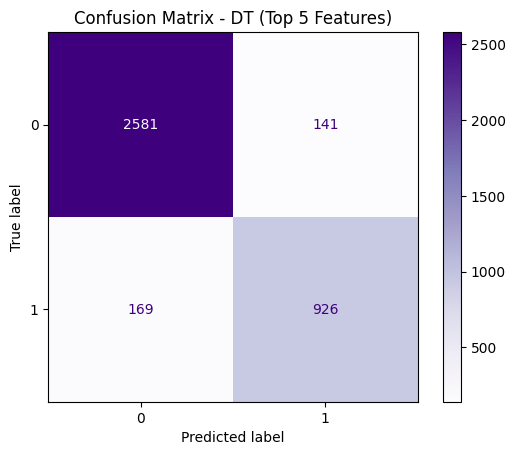

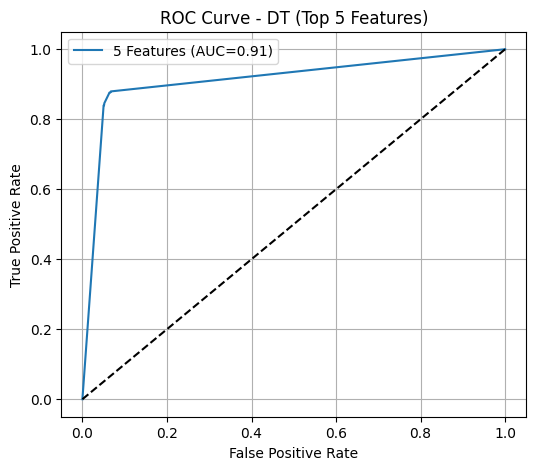


 Decision Tree using first 6 features:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2722
         1.0       0.95      0.97      0.96      1095

    accuracy                           0.98      3817
   macro avg       0.97      0.97      0.97      3817
weighted avg       0.98      0.98      0.98      3817

 Recall (class 1): 0.9662
 Accuracy: 0.9769
 AUC: 0.9742


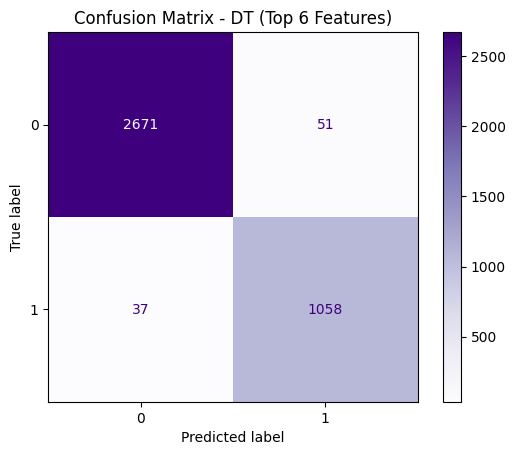

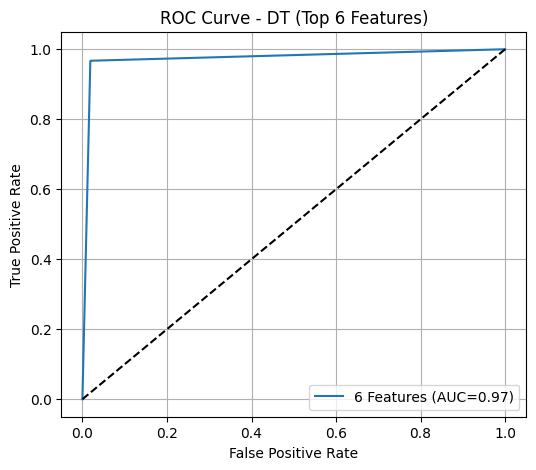


 Decision Tree using first 7 features:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2722
         1.0       0.97      0.98      0.97      1095

    accuracy                           0.98      3817
   macro avg       0.98      0.98      0.98      3817
weighted avg       0.98      0.98      0.98      3817

 Recall (class 1): 0.9763
 Accuracy: 0.9848
 AUC: 0.9822


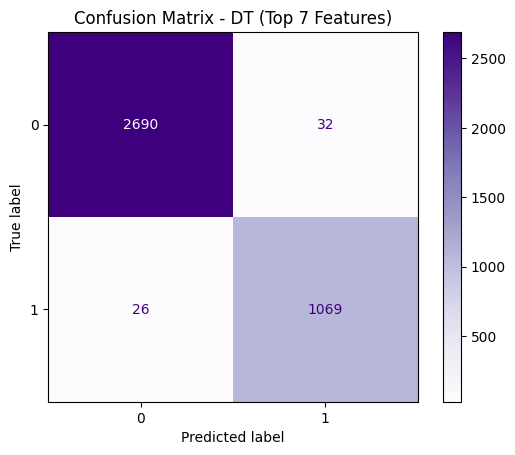

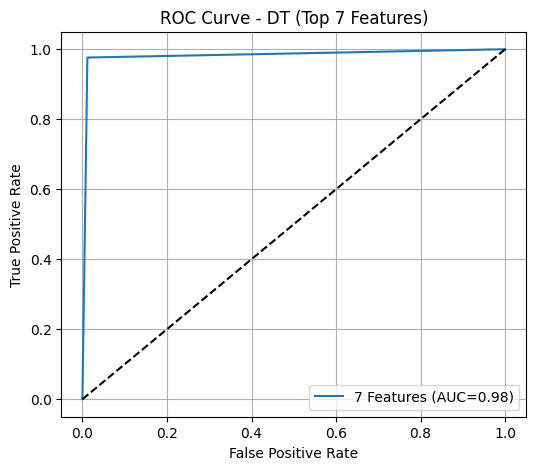


 Decision Tree using first 8 features:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2722
         1.0       0.97      0.98      0.97      1095

    accuracy                           0.98      3817
   macro avg       0.98      0.98      0.98      3817
weighted avg       0.98      0.98      0.98      3817

 Recall (class 1): 0.9772
 Accuracy: 0.9838
 AUC: 0.9818


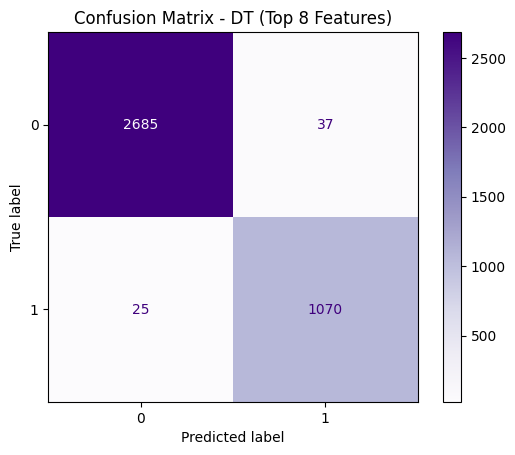

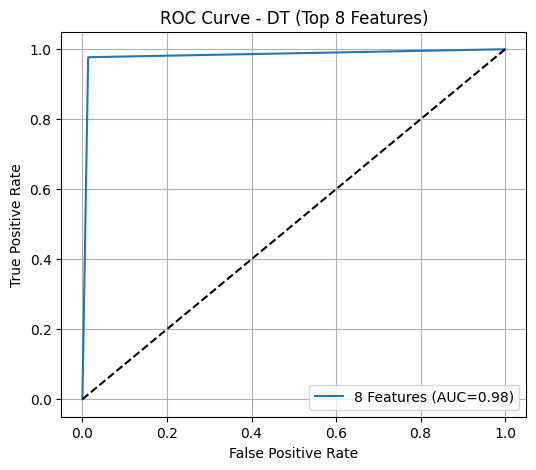


 Decision Tree using first 9 features:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2722
         1.0       0.97      0.99      0.98      1095

    accuracy                           0.99      3817
   macro avg       0.98      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817

 Recall (class 1): 0.9854
 Accuracy: 0.9879
 AUC: 0.9872


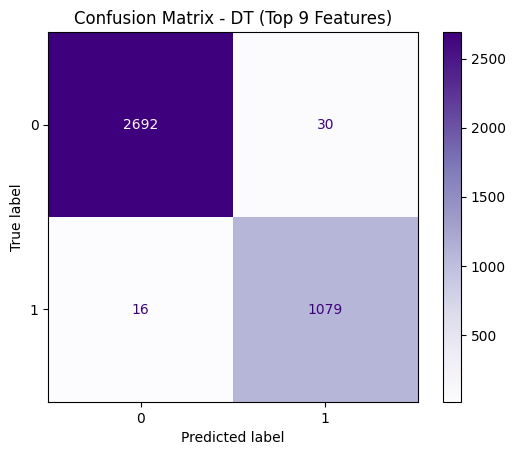

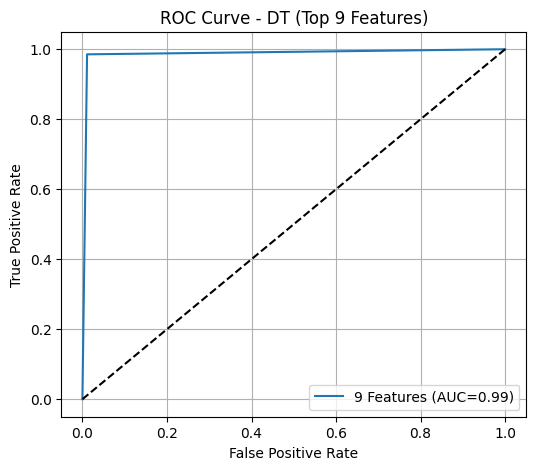


 Decision Tree using first 10 features:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2722
         1.0       0.97      0.99      0.98      1095

    accuracy                           0.99      3817
   macro avg       0.98      0.99      0.98      3817
weighted avg       0.99      0.99      0.99      3817

 Recall (class 1): 0.9863
 Accuracy: 0.9874
 AUC: 0.9871


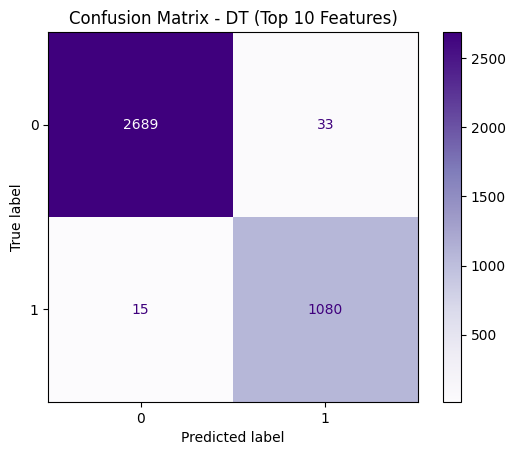

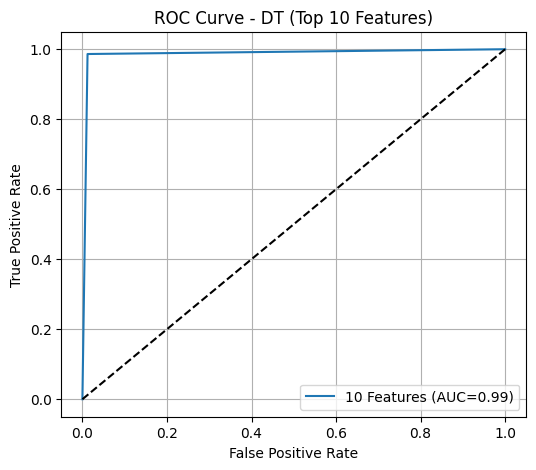


 Best Model Based on Recall:
 Feature count: 10
 Recall: 0.9863
 Accuracy: 0.9874
 AUC: 0.9871
 Features: Index(['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin',
       'A/G_Ratio_Albumin_and_Globulin_Ratio'],
      dtype='object')


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

dt_subset_results = []

print("\n Evaluating Decision Tree with Feature Subsets:\n")
for i in range(1, len(numerical_features) + 1):
    selected_features = numerical_features[:i]

    # Extract the feature subset
    X_train_subset = X_train[selected_features]
    X_val_subset = X_val[selected_features]

    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_subset, y_train)

    # Build pipeline
    dt_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=42))
    ])

    # Train
    dt_pipeline.fit(X_train_resampled, y_train_resampled)

    # Predict
    y_val_pred = dt_pipeline.predict(X_val_subset)
    y_val_proba = dt_pipeline.predict_proba(X_val_subset)[:, 1]

    # Classification Report
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)

    # Safe recall extraction
    recall = (
        report.get("1", {}).get("recall", 0) or
        report.get("1.0", {}).get("recall", 0) or
        report.get(1, {}).get("recall", 0) or
        report.get(1.0, {}).get("recall", 0)
    )

    acc = accuracy_score(y_val, y_val_pred)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    dt_subset_results.append({
        'n_features': i,
        'features': selected_features,
        'recall': recall,
        'accuracy': acc,
        'auc': roc_auc,
        'model': dt_pipeline
    })

    # Print Metrics
    print(f"\n Decision Tree using first {i} features:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print(f" Recall (class 1): {recall:.4f}")
    print(f" Accuracy: {acc:.4f}")
    print(f" AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples')
    plt.title(f"Confusion Matrix - DT (Top {i} Features)")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{i} Features (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - DT (Top {i} Features)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Best model based on Recall
best_subset = max(dt_subset_results, key=lambda x: x['recall'])

print("\n Best Model Based on Recall:")
print(f" Feature count: {best_subset['n_features']}")
print(f" Recall: {best_subset['recall']:.4f}")
print(f" Accuracy: {best_subset['accuracy']:.4f}")
print(f" AUC: {best_subset['auc']:.4f}")
print(f" Features: {best_subset['features']}")


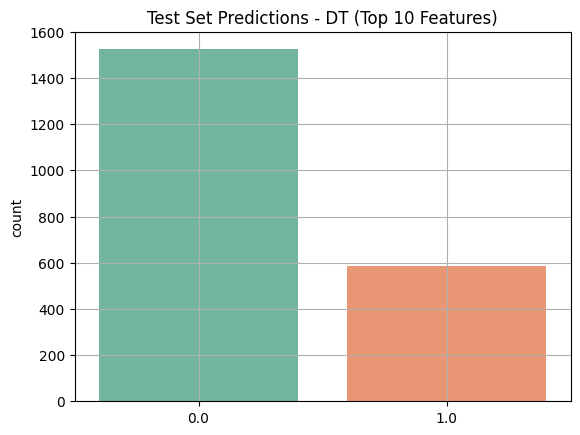


 Final Test Set Prediction Distribution:
Class 0: 1524 instances
Class 1: 586 instances


In [ ]:
#  Predict on Test Set using best model
final_dt = best_subset['model']
test_preds = final_dt.predict(df_test[best_subset['features']])
test_proba = final_dt.predict_proba(df_test[best_subset['features']])[:, 1]

#  Prediction Distribution Plot
sns.countplot(x=test_preds, hue=test_preds, palette='Set2', legend=False)
plt.title(f"Test Set Predictions - DT (Top {best_subset['n_features']} Features)")
plt.grid()
plt.show()

#  Print Test Set Class Distribution
unique, counts = np.unique(test_preds, return_counts=True)
print("\n Final Test Set Prediction Distribution:")
for label, count in zip(unique, counts):
    print(f"Class {int(label)}: {count} instances")


Random Forest with loop on tress


 Evaluating Random Forest with Varying Trees (SMOTE applied):


 Random Forest with 10 Trees:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      2722
         1.0       0.99      0.99      0.99      1095

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817

 Recall (class 1): 0.9863
 Accuracy: 0.9945
 AUC: 0.9998


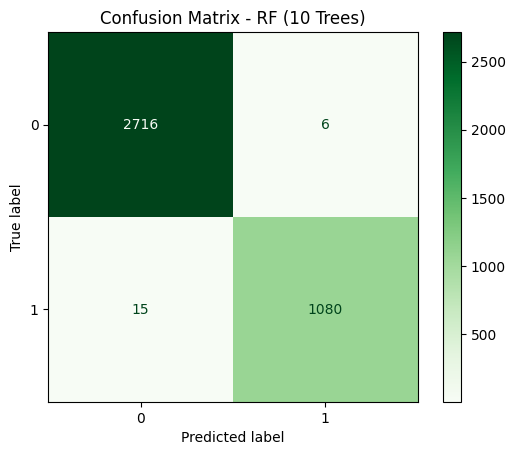

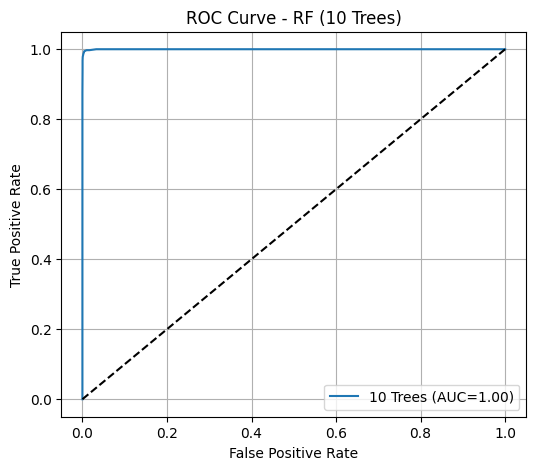


 Random Forest with 20 Trees:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       0.99      0.99      0.99      1095

    accuracy                           1.00      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9909
 Accuracy: 0.9955
 AUC: 0.9999


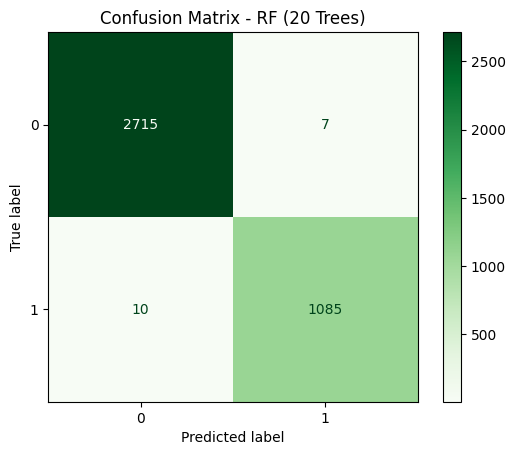

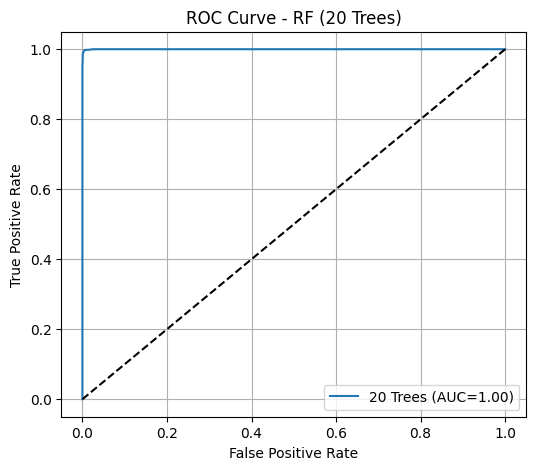


 Random Forest with 30 Trees:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       1.00      0.99      0.99      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9927
 Accuracy: 0.9966
 AUC: 0.9999


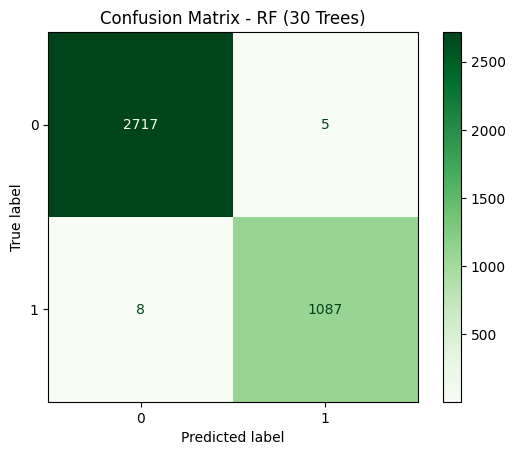

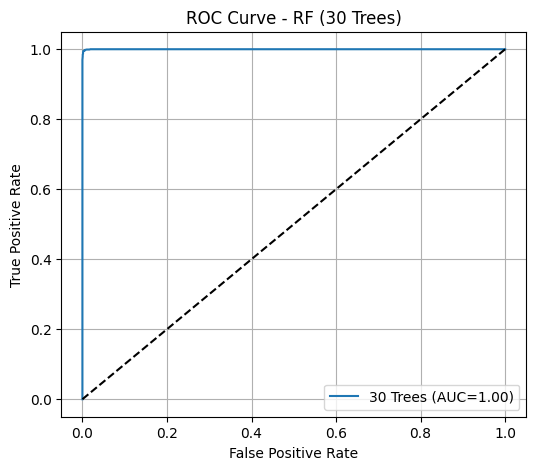


 Random Forest with 40 Trees:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       0.99      1.00      0.99      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9954
 Accuracy: 0.9969
 AUC: 1.0000


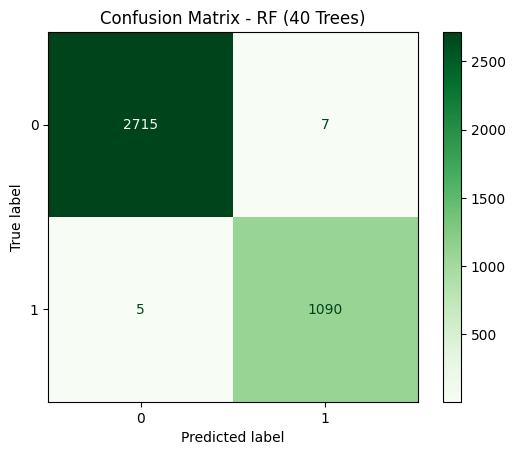

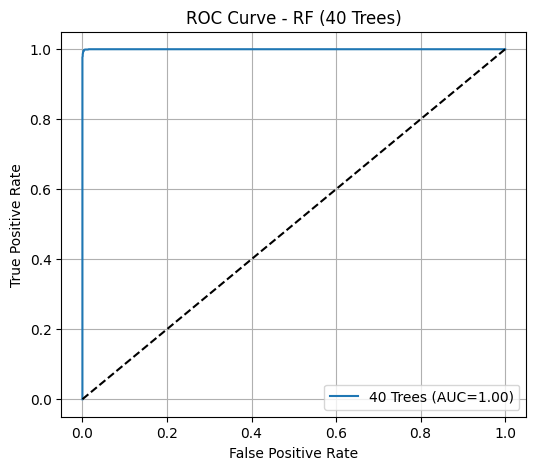


 Random Forest with 50 Trees:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       0.99      0.99      0.99      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9936
 Accuracy: 0.9961
 AUC: 0.9999


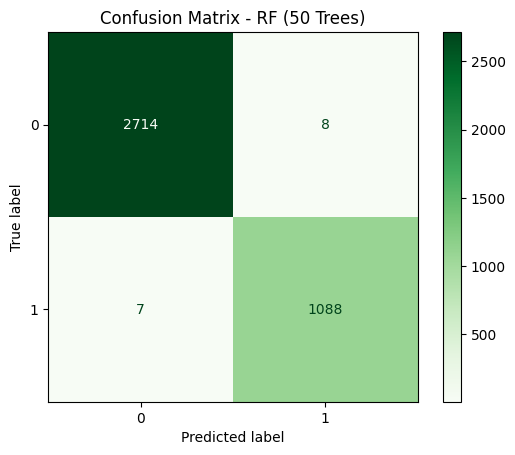

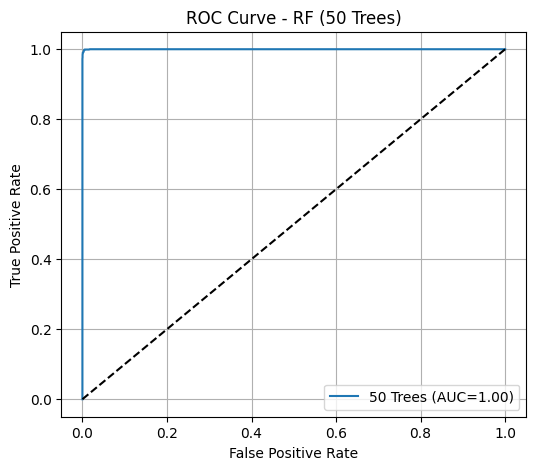


 Random Forest with 60 Trees:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       0.99      0.99      0.99      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9936
 Accuracy: 0.9961
 AUC: 1.0000


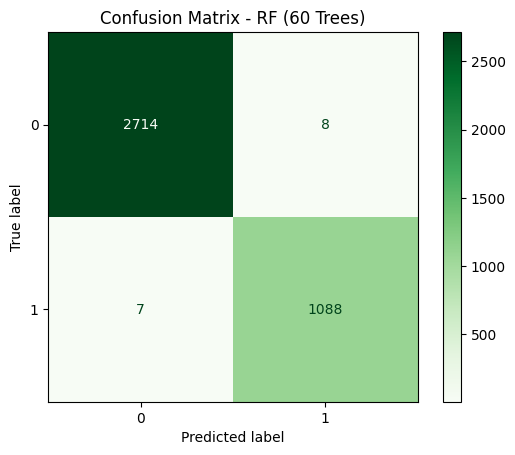

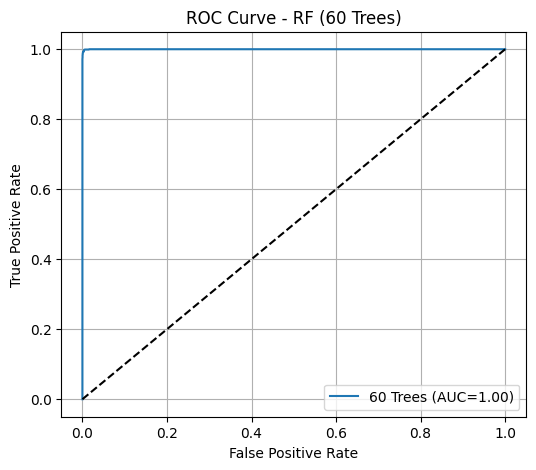


 Random Forest with 70 Trees:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       0.99      0.99      0.99      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9945
 Accuracy: 0.9963
 AUC: 1.0000


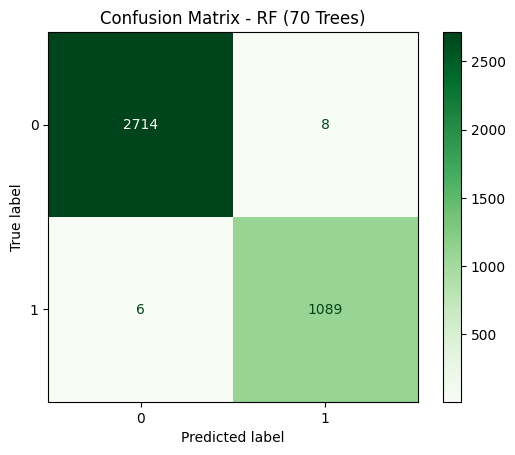

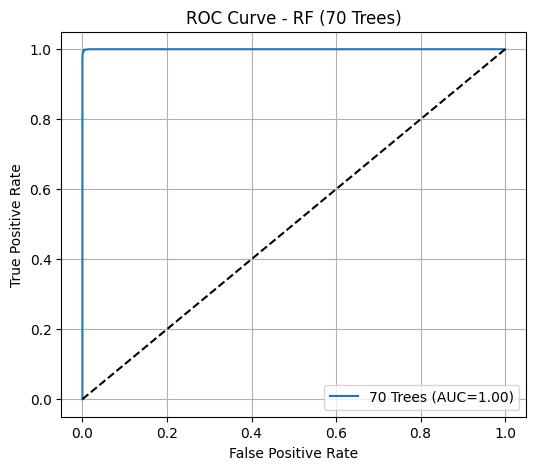


 Random Forest with 80 Trees:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       0.99      1.00      0.99      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9954
 Accuracy: 0.9966
 AUC: 1.0000


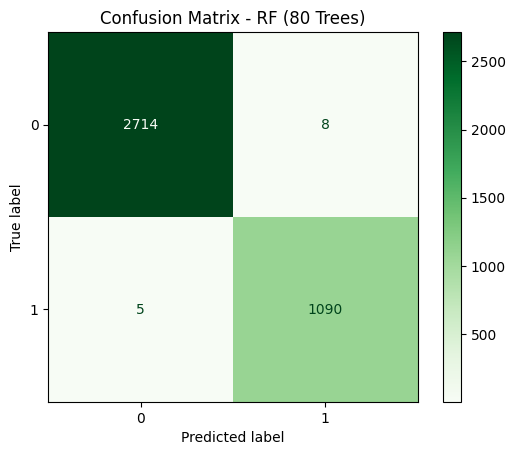

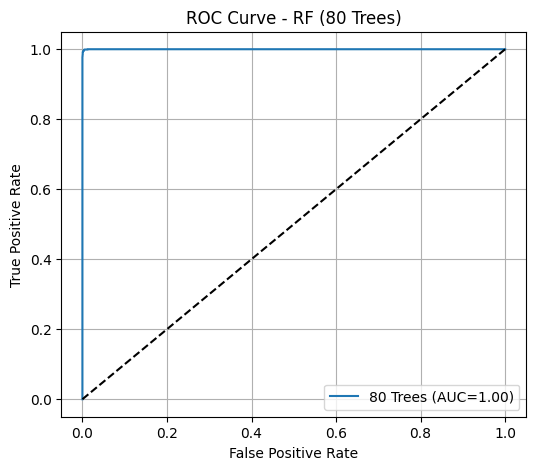


 Random Forest with 90 Trees:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       0.99      1.00      0.99      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9954
 Accuracy: 0.9969
 AUC: 1.0000


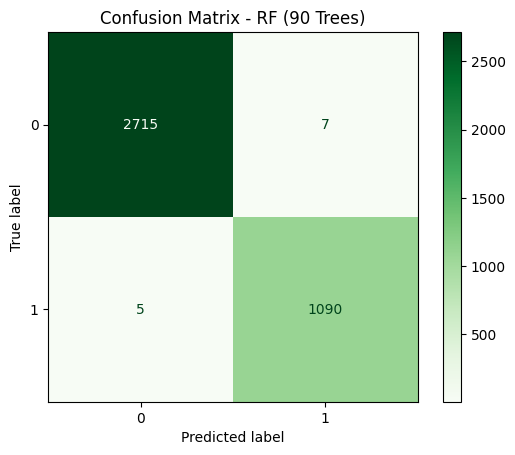

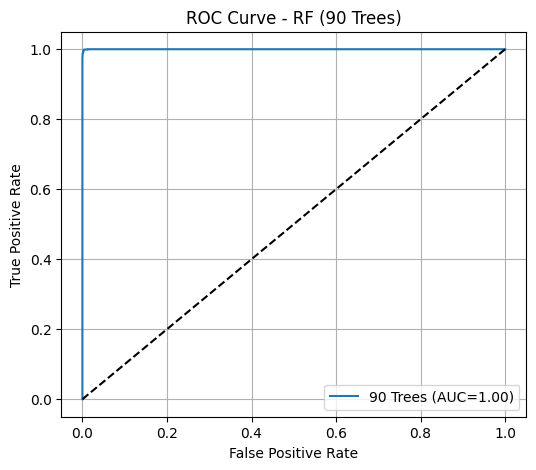


 Random Forest with 100 Trees:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       0.99      1.00      1.00      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9963
 Accuracy: 0.9974
 AUC: 1.0000


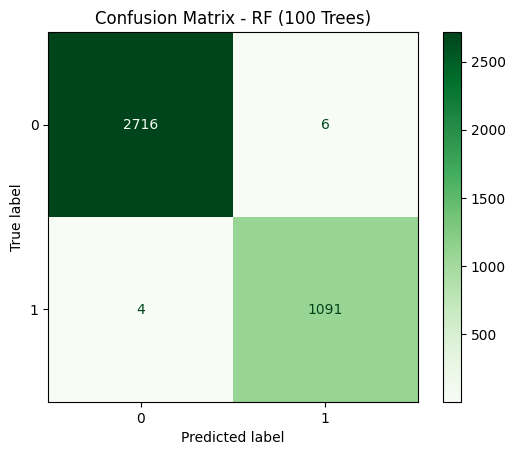

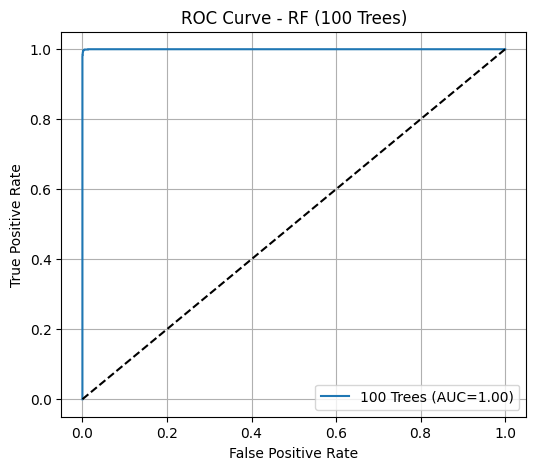


 Best Random Forest Model:
 Trees: 100
 Recall: 0.9963
 Accuracy: 0.9974
 AUC: 1.0000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rf_results = []

print("\n Evaluating Random Forest with Varying Trees (SMOTE applied):\n")
for n_trees in range(10, 110, 10):
    # SMOTE resampling
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train[numerical_features], y_train)

    # Pipeline
    rf_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('rf', RandomForestClassifier(n_estimators=n_trees, class_weight='balanced', random_state=42))
    ])

    # Train
    rf_pipeline.fit(X_resampled, y_resampled)

    # Predict
    y_val_pred = rf_pipeline.predict(X_val[numerical_features])
    y_val_proba = rf_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Metrics
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    recall_key = next((k for k in report.keys() if str(k) in ["1", "1.0"]), None)
    recall = report.get(recall_key, {}).get("recall", 0)

    acc = accuracy_score(y_val, y_val_pred)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    rf_results.append({
        'n_trees': n_trees,
        'recall': recall,
        'accuracy': acc,
        'auc': roc_auc,
        'model': rf_pipeline
    })

    # Output
    print(f"\n Random Forest with {n_trees} Trees:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print(f" Recall (class 1): {recall:.4f}")
    print(f" Accuracy: {acc:.4f}")
    print(f" AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Greens')
    plt.title(f"Confusion Matrix - RF ({n_trees} Trees)")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{n_trees} Trees (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - RF ({n_trees} Trees)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Best model based on recall
best_rf = max(rf_results, key=lambda x: x['recall'])

print("\n Best Random Forest Model:")
print(f" Trees: {best_rf['n_trees']}")
print(f" Recall: {best_rf['recall']:.4f}")
print(f" Accuracy: {best_rf['accuracy']:.4f}")
print(f" AUC: {best_rf['auc']:.4f}")


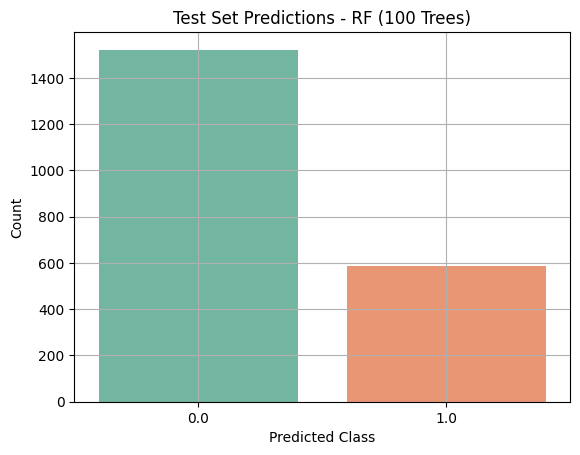


 Final Test Set Prediction Distribution:
Class 0: 1522 instances
Class 1: 588 instances


In [ ]:
# Final prediction on test data using best model
final_rf = best_rf['model']
test_preds = final_rf.predict(df_test[numerical_features])

# Plot test predictions
sns.countplot(x=test_preds,hue=test_preds, palette='Set2', legend=False)
plt.title(f"Test Set Predictions - RF ({best_rf['n_trees']} Trees)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.grid()
plt.show()

# Print test prediction distribution
unique, counts = np.unique(test_preds, return_counts=True)
print("\n Final Test Set Prediction Distribution:")
for label, count in zip(unique, counts):
    print(f"Class {int(label)}: {count} instances")

### AdaBoost


 Evaluating AdaBoost with Varying Estimators (Using SMOTE):


 AdaBoost with 10 Estimators:
              precision    recall  f1-score   support

         0.0       0.85      0.69      0.76      2722
         1.0       0.47      0.69      0.56      1095

    accuracy                           0.69      3817
   macro avg       0.66      0.69      0.66      3817
weighted avg       0.74      0.69      0.70      3817

 Recall (class 1): 0.6877
 Accuracy: 0.6911
 AUC: 0.7455


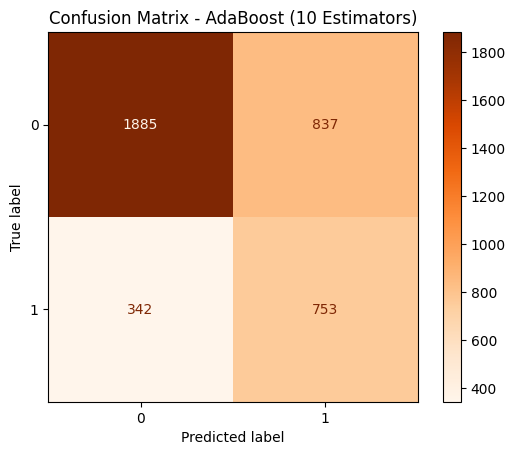

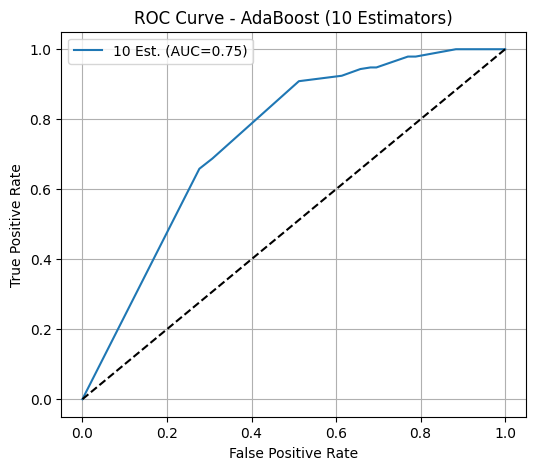


 AdaBoost with 20 Estimators:
              precision    recall  f1-score   support

         0.0       0.85      0.70      0.76      2722
         1.0       0.48      0.69      0.56      1095

    accuracy                           0.69      3817
   macro avg       0.66      0.69      0.66      3817
weighted avg       0.74      0.69      0.71      3817

 Recall (class 1): 0.6877
 Accuracy: 0.6940
 AUC: 0.7495


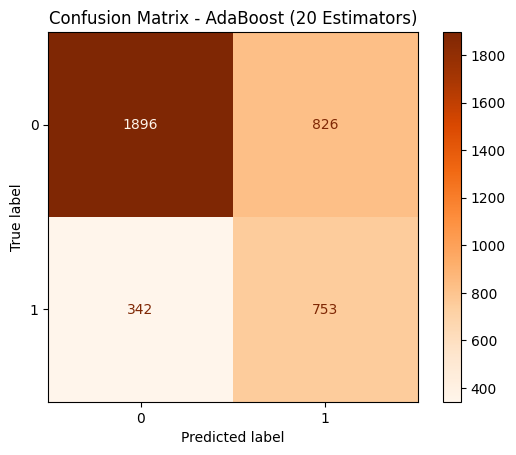

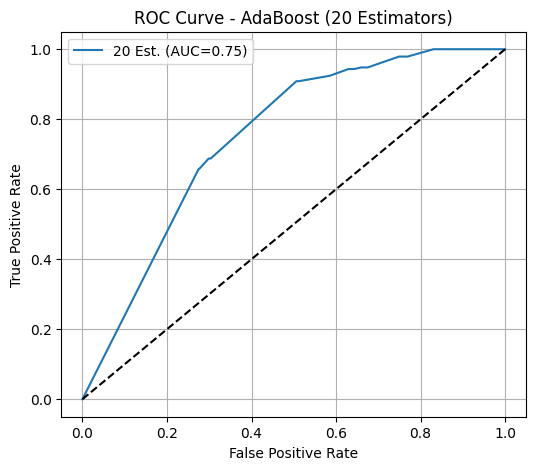


 AdaBoost with 30 Estimators:
              precision    recall  f1-score   support

         0.0       0.86      0.68      0.76      2722
         1.0       0.48      0.74      0.58      1095

    accuracy                           0.69      3817
   macro avg       0.67      0.71      0.67      3817
weighted avg       0.75      0.69      0.71      3817

 Recall (class 1): 0.7370
 Accuracy: 0.6935
 AUC: 0.7660


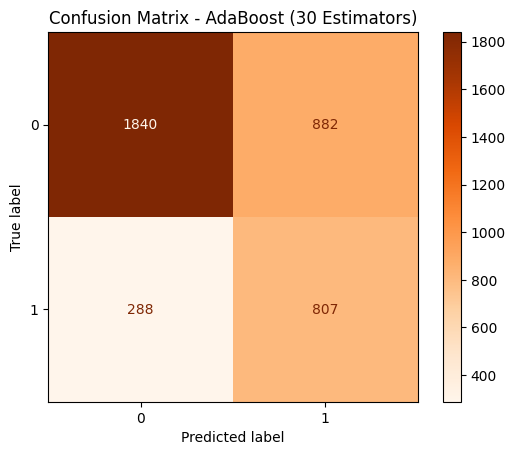

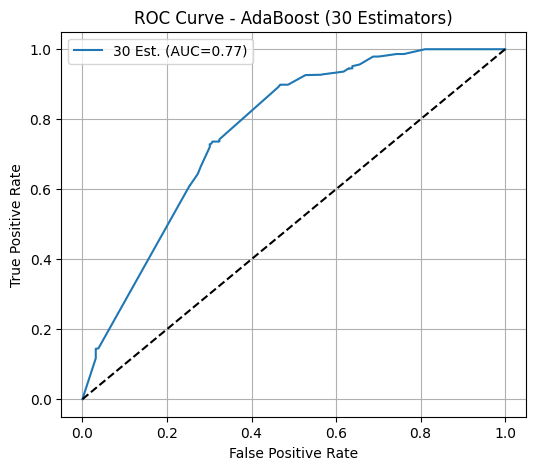


 AdaBoost with 40 Estimators:
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      2722
         1.0       0.48      0.74      0.58      1095

    accuracy                           0.70      3817
   macro avg       0.67      0.71      0.67      3817
weighted avg       0.76      0.70      0.71      3817

 Recall (class 1): 0.7416
 Accuracy: 0.6958
 AUC: 0.7678


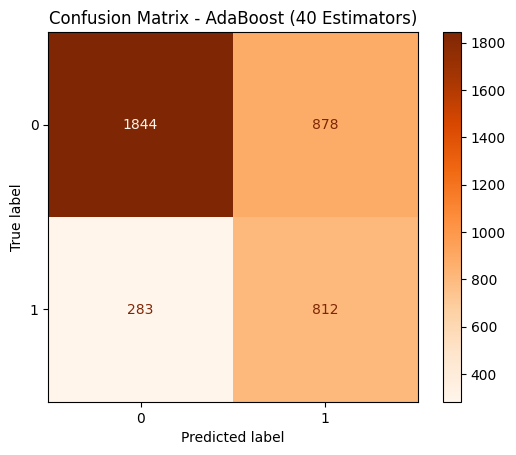

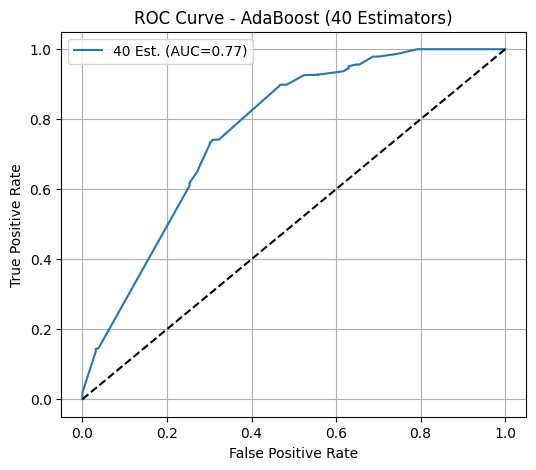


 AdaBoost with 50 Estimators:
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      2722
         1.0       0.48      0.74      0.58      1095

    accuracy                           0.70      3817
   macro avg       0.67      0.71      0.67      3817
weighted avg       0.76      0.70      0.71      3817

 Recall (class 1): 0.7416
 Accuracy: 0.6958
 AUC: 0.7702


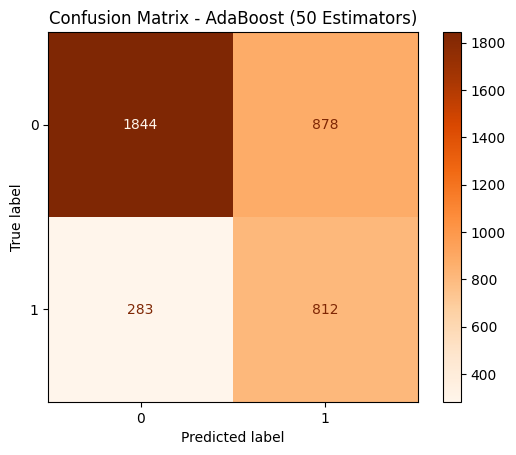

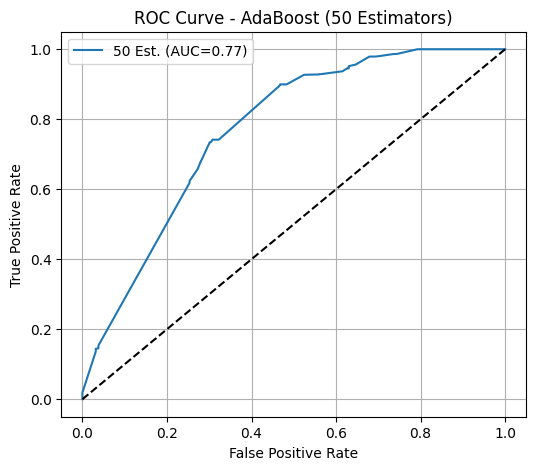


 AdaBoost with 60 Estimators:
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      2722
         1.0       0.48      0.74      0.58      1095

    accuracy                           0.70      3817
   macro avg       0.67      0.71      0.67      3817
weighted avg       0.76      0.70      0.71      3817

 Recall (class 1): 0.7416
 Accuracy: 0.6958
 AUC: 0.7704


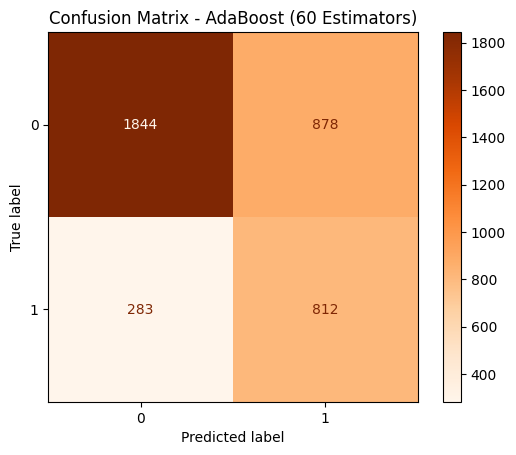

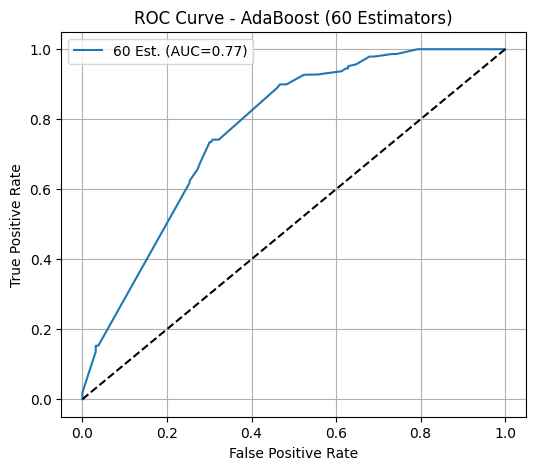


 AdaBoost with 70 Estimators:
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      2722
         1.0       0.48      0.74      0.58      1095

    accuracy                           0.70      3817
   macro avg       0.67      0.71      0.67      3817
weighted avg       0.76      0.70      0.71      3817

 Recall (class 1): 0.7425
 Accuracy: 0.6961
 AUC: 0.7717


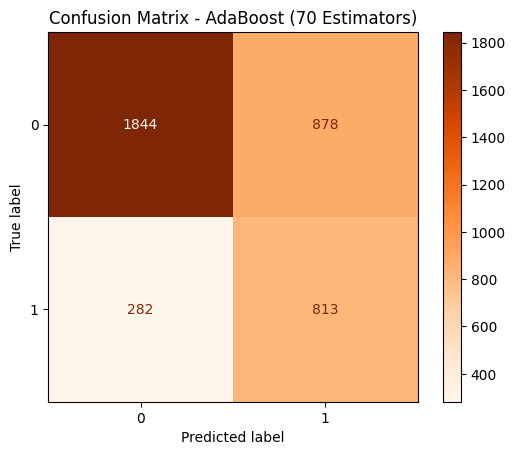

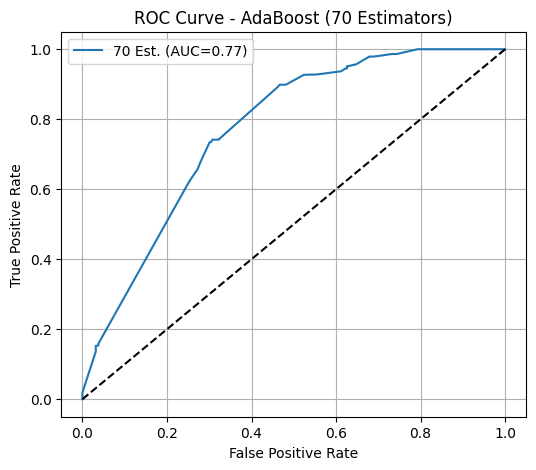


 AdaBoost with 80 Estimators:
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      2722
         1.0       0.48      0.74      0.58      1095

    accuracy                           0.70      3817
   macro avg       0.67      0.71      0.67      3817
weighted avg       0.76      0.70      0.71      3817

 Recall (class 1): 0.7425
 Accuracy: 0.6961
 AUC: 0.7726


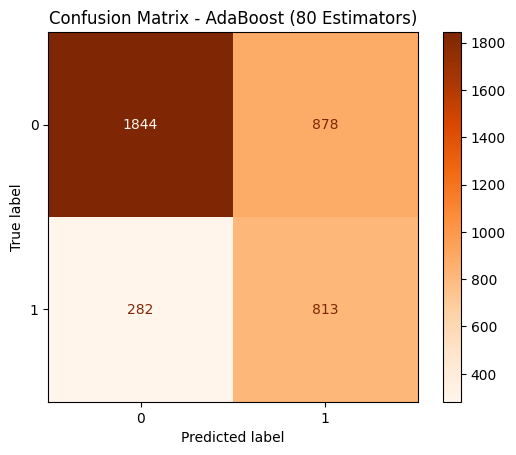

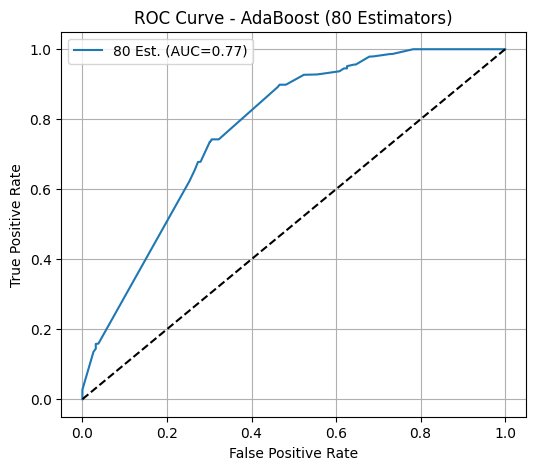


 AdaBoost with 90 Estimators:
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      2722
         1.0       0.48      0.74      0.58      1095

    accuracy                           0.70      3817
   macro avg       0.67      0.71      0.67      3817
weighted avg       0.76      0.70      0.71      3817

 Recall (class 1): 0.7425
 Accuracy: 0.6974
 AUC: 0.7731


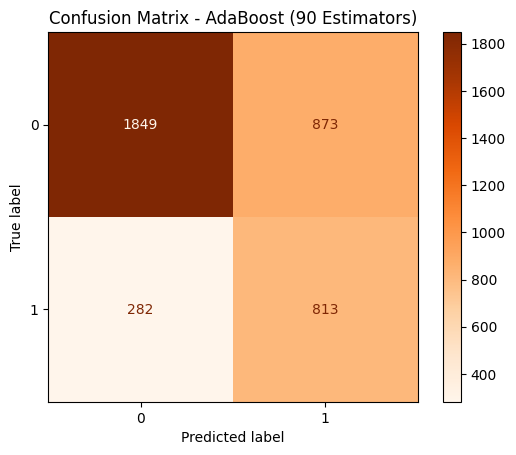

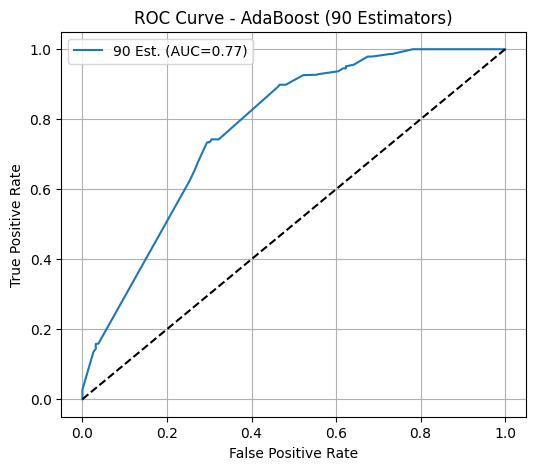


 AdaBoost with 100 Estimators:
              precision    recall  f1-score   support

         0.0       0.87      0.68      0.76      2722
         1.0       0.48      0.74      0.58      1095

    accuracy                           0.70      3817
   macro avg       0.68      0.71      0.67      3817
weighted avg       0.76      0.70      0.71      3817

 Recall (class 1): 0.7425
 Accuracy: 0.6977
 AUC: 0.7740


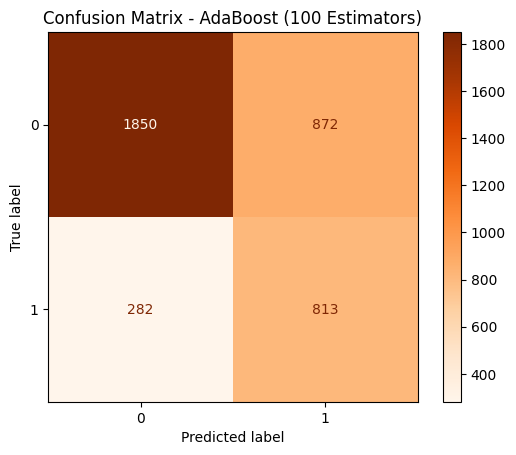

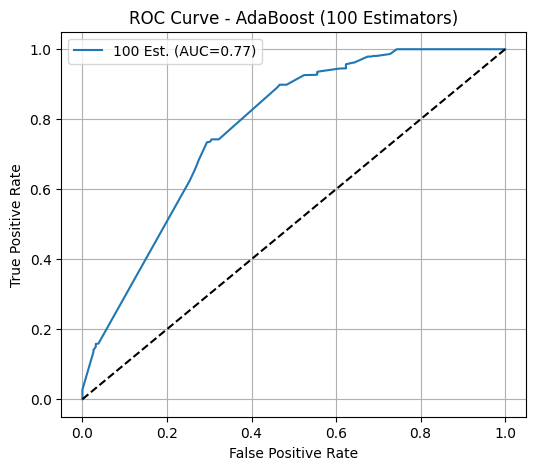


 Best AdaBoost Model:
 Estimators: 70
 Recall: 0.7425
 Accuracy: 0.6961
 AUC: 0.7717


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from imblearn.pipeline import Pipeline  # Changed from sklearn.pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

ab_results = []

print("\n Evaluating AdaBoost with Varying Estimators (Using SMOTE):\n")
for n_estimators in range(10, 110, 10):
    ab_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('ab', AdaBoostClassifier(n_estimators=n_estimators, random_state=42))
    ])

    # Train
    ab_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = ab_pipeline.predict(X_val[numerical_features])
    y_val_proba = ab_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Metrics
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)

    # Robust recall extraction for class 1
    recall_key = next((k for k in report.keys() if str(k) in ["1", "1.0"]), None)
    recall = report.get(recall_key, {}).get("recall", 0)

    acc = accuracy_score(y_val, y_val_pred)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    ab_results.append({
        'n_estimators': n_estimators,
        'recall': recall,
        'accuracy': acc,
        'auc': roc_auc,
        'model': ab_pipeline
    })

    # Output
    print(f"\n AdaBoost with {n_estimators} Estimators:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print(f" Recall (class 1): {recall:.4f}")
    print(f" Accuracy: {acc:.4f}")
    print(f" AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Oranges')
    plt.title(f"Confusion Matrix - AdaBoost ({n_estimators} Estimators)")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{n_estimators} Est. (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - AdaBoost ({n_estimators} Estimators)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

#  Best model based on recall
best_ab = max(ab_results, key=lambda x: x['recall'])

print("\n Best AdaBoost Model:")
print(f" Estimators: {best_ab['n_estimators']}")
print(f" Recall: {best_ab['recall']:.4f}")
print(f" Accuracy: {best_ab['accuracy']:.4f}")
print(f" AUC: {best_ab['auc']:.4f}")


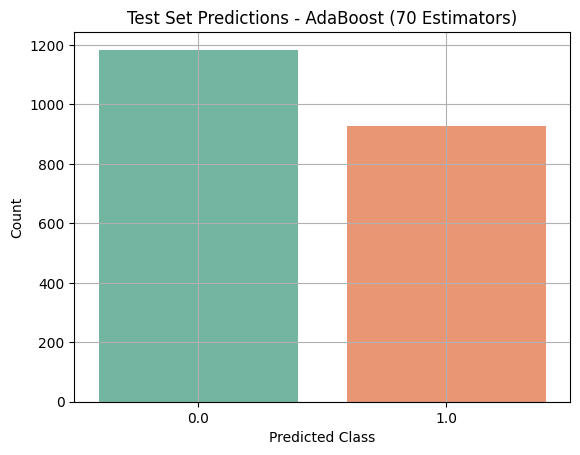


 Final Test Set Prediction Distribution:
Class 0: 1184 instances
Class 1: 926 instances


In [ ]:
# Final prediction on test data using best model
final_ab = best_ab['model']
test_preds = final_ab.predict(df_test[numerical_features])

# Plot test predictions
sns.countplot(x=test_preds, hue=test_preds, palette='Set2', legend=False)
plt.title(f"Test Set Predictions - AdaBoost ({best_ab['n_estimators']} Estimators)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.grid()
plt.show()

# Print test prediction distribution
unique, counts = np.unique(test_preds, return_counts=True)
print("\n Final Test Set Prediction Distribution:")
for label, count in zip(unique, counts):
    print(f"Class {int(label)}: {count} instances")


### XGBoost


 Evaluating XGBoost with Varying Estimators (Using SMOTE):


 XGBoost with 10 Estimators:
              precision    recall  f1-score   support

         0.0       0.97      0.79      0.87      2722
         1.0       0.65      0.94      0.77      1095

    accuracy                           0.84      3817
   macro avg       0.81      0.87      0.82      3817
weighted avg       0.88      0.84      0.84      3817

 Recall (class 1): 0.9406
 Accuracy: 0.8355
 AUC: 0.9507


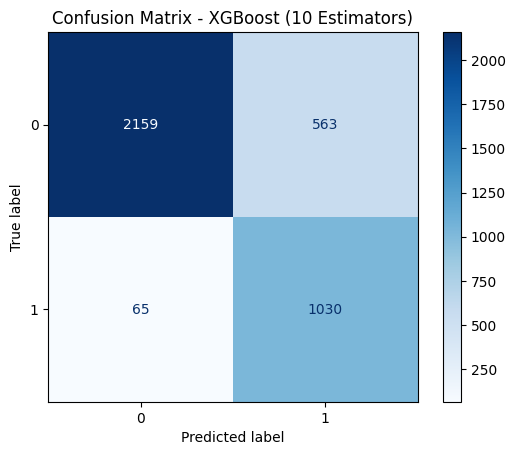

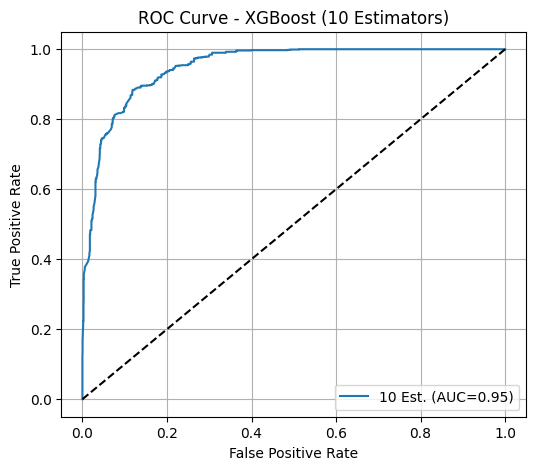


 XGBoost with 20 Estimators:
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      2722
         1.0       0.88      0.98      0.93      1095

    accuracy                           0.96      3817
   macro avg       0.94      0.97      0.95      3817
weighted avg       0.96      0.96      0.96      3817

 Recall (class 1): 0.9826
 Accuracy: 0.9578
 AUC: 0.9945


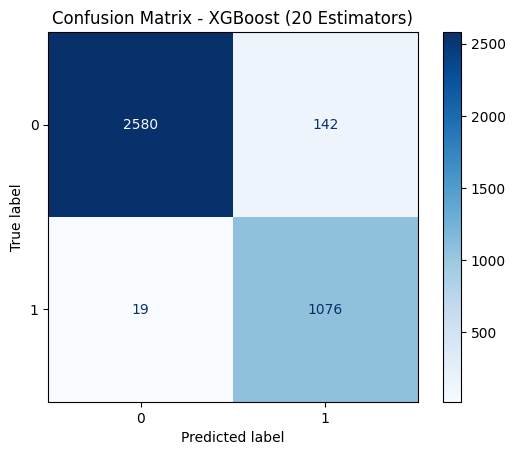

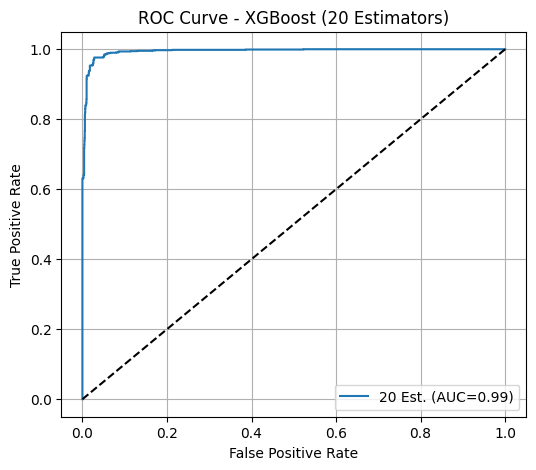


 XGBoost with 30 Estimators:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2722
         1.0       0.95      0.99      0.97      1095

    accuracy                           0.98      3817
   macro avg       0.97      0.99      0.98      3817
weighted avg       0.98      0.98      0.98      3817

 Recall (class 1): 0.9936
 Accuracy: 0.9835
 AUC: 0.9985


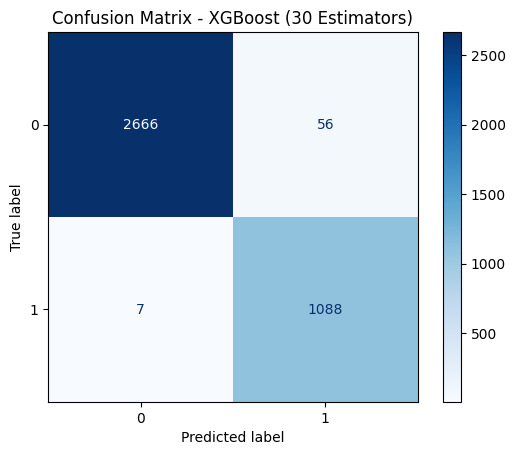

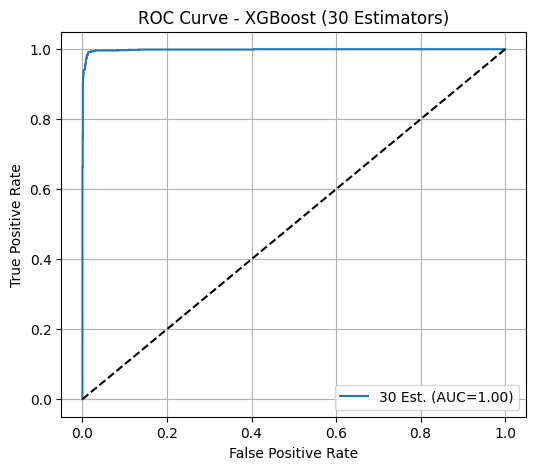


 XGBoost with 40 Estimators:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2722
         1.0       0.98      0.99      0.99      1095

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817

 Recall (class 1): 0.9945
 Accuracy: 0.9914
 AUC: 0.9993


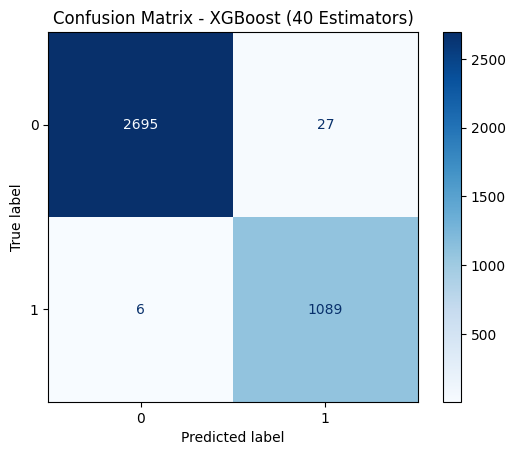

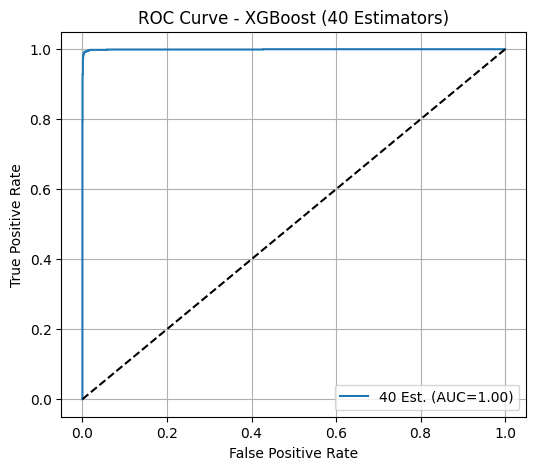


 XGBoost with 50 Estimators:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2722
         1.0       0.98      0.99      0.99      1095

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817

 Recall (class 1): 0.9945
 Accuracy: 0.9935
 AUC: 0.9996


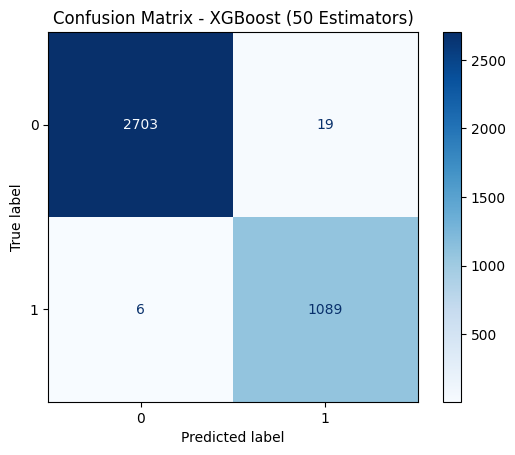

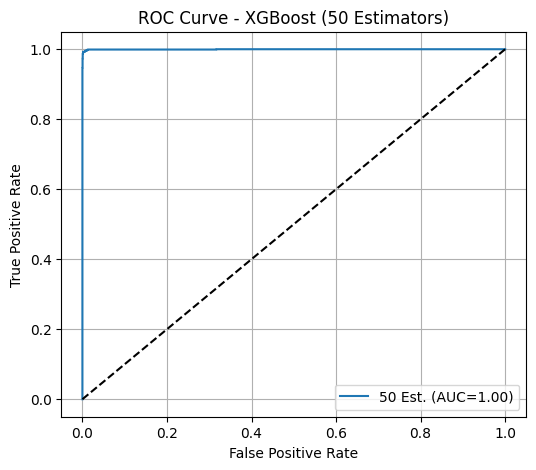


 XGBoost with 60 Estimators:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       0.99      1.00      0.99      1095

    accuracy                           1.00      3817
   macro avg       0.99      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9954
 Accuracy: 0.9961
 AUC: 0.9998


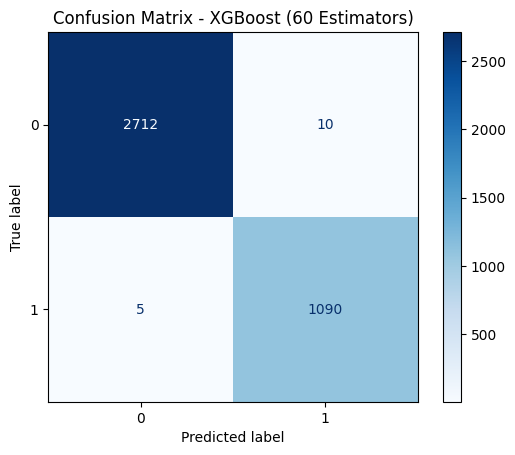

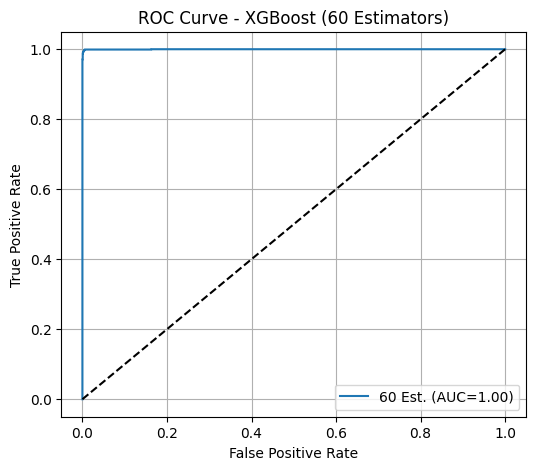


 XGBoost with 70 Estimators:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       1.00      1.00      1.00      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9963
 Accuracy: 0.9976
 AUC: 0.9999


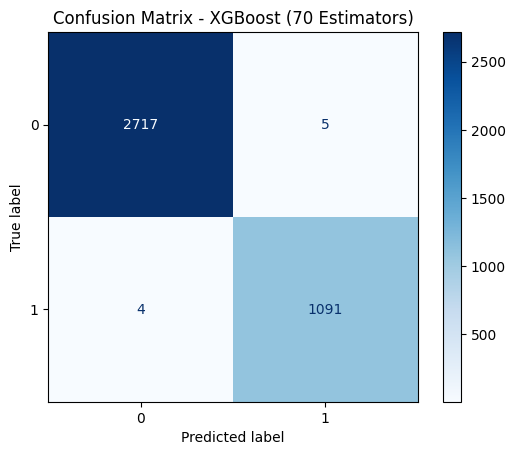

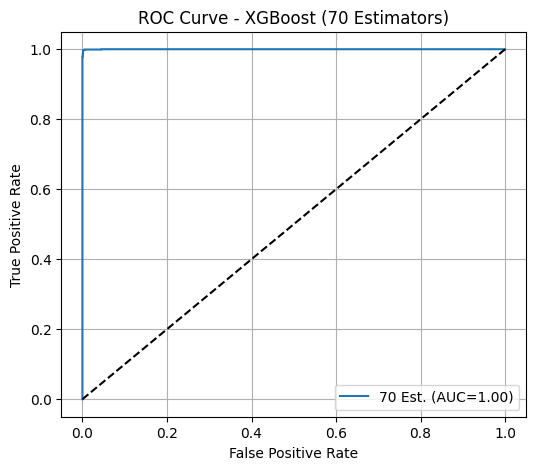


 XGBoost with 80 Estimators:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       1.00      1.00      1.00      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9982
 Accuracy: 0.9982
 AUC: 1.0000


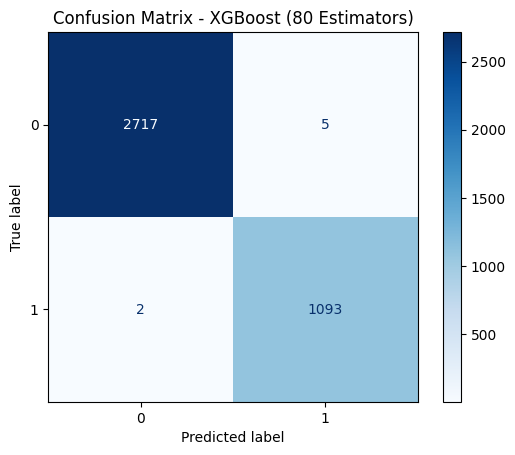

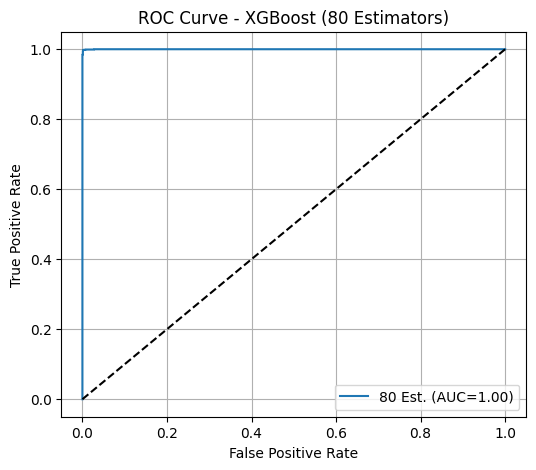


 XGBoost with 90 Estimators:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       1.00      1.00      1.00      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9973
 Accuracy: 0.9979
 AUC: 1.0000


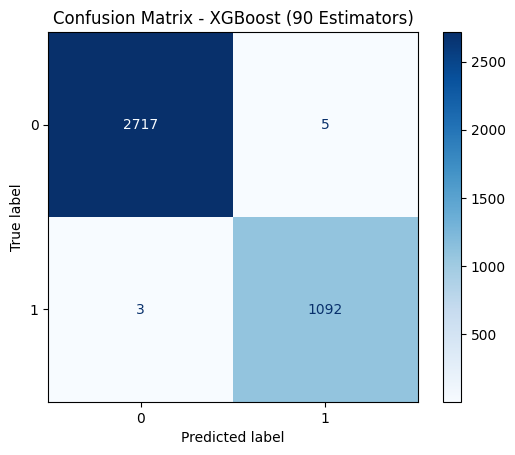

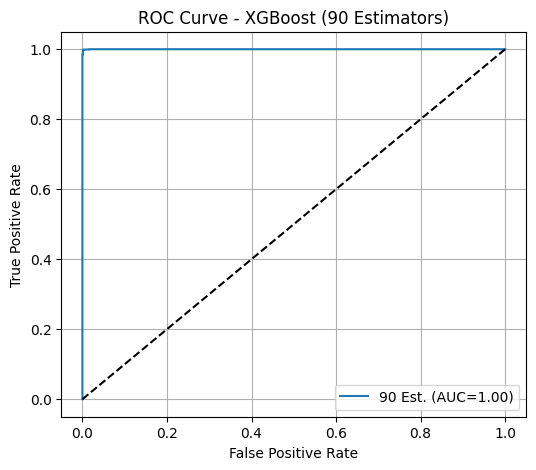


 XGBoost with 100 Estimators:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2722
         1.0       1.00      1.00      1.00      1095

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817

 Recall (class 1): 0.9982
 Accuracy: 0.9984
 AUC: 1.0000


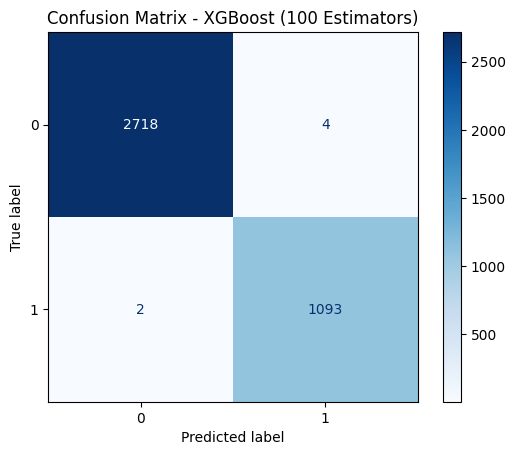

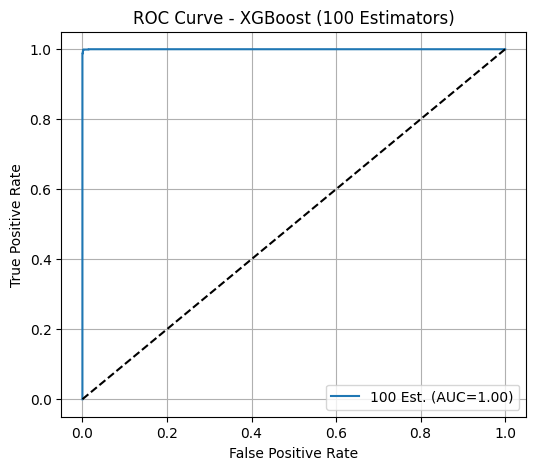


 Best XGBoost Model:
 Estimators: 80
 Recall: 0.9982
 Accuracy: 0.9982
 AUC: 1.0000


In [ ]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

xgb_results = []

# Assuming you already have X_train, X_val, y_train, y_val, and numerical_features
print("\n Evaluating XGBoost with Varying Estimators (Using SMOTE):\n")

for n_estimators in range(10, 110, 10):
    # Create a pipeline without SMOTE for now
    xgb_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('xgb', XGBClassifier(
            n_estimators=n_estimators,
            eval_metric='logloss',  # Optional: specify eval_metric
            scale_pos_weight=1,
            random_state=42
        ))
    ])

    # Apply SMOTE on training data only
    smote = SMOTE(random_state=42)
    X_train_res, y_train_res = smote.fit_resample(X_train[numerical_features], y_train)

    # Train the pipeline on resampled data
    xgb_pipeline.fit(X_train_res, y_train_res)

    # Predict
    y_val_pred = xgb_pipeline.predict(X_val[numerical_features])
    y_val_proba = xgb_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Metrics
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)

    # Robust recall extraction for class 1
    recall_key = next((k for k in report.keys() if str(k) in ["1", "1.0"]), None)
    recall = report.get(recall_key, {}).get("recall", 0)

    acc = accuracy_score(y_val, y_val_pred)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    xgb_results.append({
        'n_estimators': n_estimators,
        'recall': recall,
        'accuracy': acc,
        'auc': roc_auc,
        'model': xgb_pipeline
    })

    # Output
    print(f"\n XGBoost with {n_estimators} Estimators:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print(f" Recall (class 1): {recall:.4f}")
    print(f" Accuracy: {acc:.4f}")
    print(f" AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - XGBoost ({n_estimators} Estimators)")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{n_estimators} Est. (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - XGBoost ({n_estimators} Estimators)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Best XGBoost model based on recall
best_xgb = max(xgb_results, key=lambda x: x['recall'])

print("\n Best XGBoost Model:")
print(f" Estimators: {best_xgb['n_estimators']}")
print(f" Recall: {best_xgb['recall']:.4f}")
print(f" Accuracy: {best_xgb['accuracy']:.4f}")
print(f" AUC: {best_xgb['auc']:.4f}")


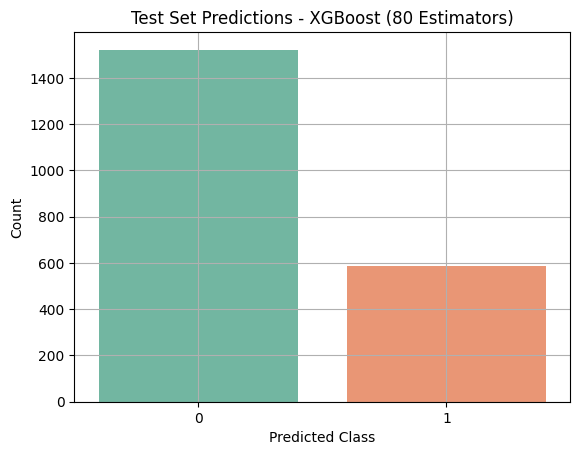


 Final Test Set Prediction Distribution:
Class 0: 1522 instances
Class 1: 588 instances


In [ ]:
# Final prediction on test data using best model
final_xgb = best_xgb['model']
test_preds = final_xgb.predict(df_test[numerical_features])

# Plot test predictions
sns.countplot(x=test_preds, hue=test_preds, palette='Set2', legend=False)
plt.title(f"Test Set Predictions - XGBoost ({best_xgb['n_estimators']} Estimators)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.grid()
plt.show()

# Print test prediction distribution
unique, counts = np.unique(test_preds, return_counts=True)
print("\n Final Test Set Prediction Distribution:")
for label, count in zip(unique, counts):
    print(f"Class {int(label)}: {count} instances")


### Gradient Boosting


 Evaluating Gradient Boosting with Varying Estimators:


 Gradient Boosting with 10 Estimators:
              precision    recall  f1-score   support

         0.0       0.93      0.58      0.72      2722
         1.0       0.47      0.90      0.61      1095

    accuracy                           0.67      3817
   macro avg       0.70      0.74      0.67      3817
weighted avg       0.80      0.67      0.69      3817

 Recall (class 1): 0.8986
 Accuracy: 0.6749
 AUC: 0.8059


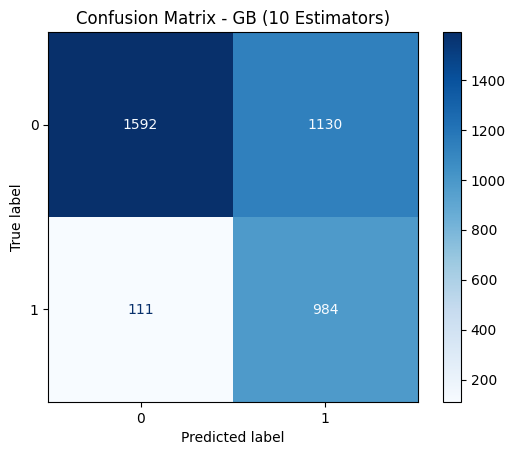

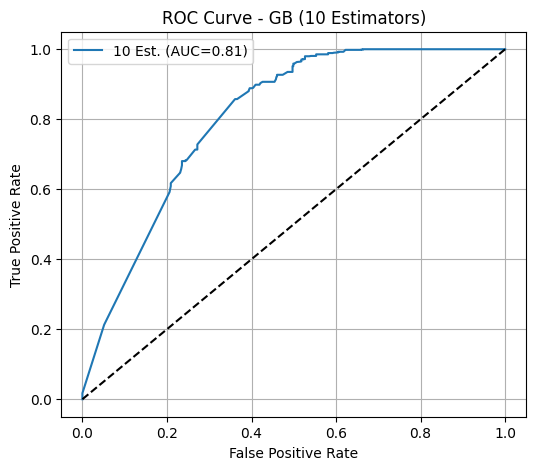


 Gradient Boosting with 20 Estimators:
              precision    recall  f1-score   support

         0.0       0.93      0.65      0.77      2722
         1.0       0.50      0.88      0.64      1095

    accuracy                           0.72      3817
   macro avg       0.72      0.76      0.70      3817
weighted avg       0.81      0.72      0.73      3817

 Recall (class 1): 0.8776
 Accuracy: 0.7160
 AUC: 0.8521


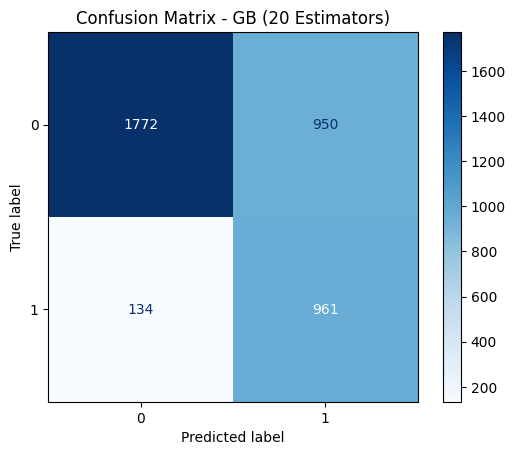

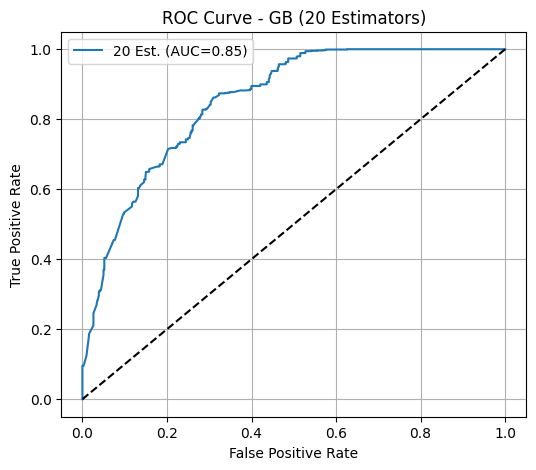


 Gradient Boosting with 30 Estimators:
              precision    recall  f1-score   support

         0.0       0.93      0.68      0.78      2722
         1.0       0.52      0.88      0.65      1095

    accuracy                           0.73      3817
   macro avg       0.73      0.78      0.72      3817
weighted avg       0.81      0.73      0.75      3817

 Recall (class 1): 0.8758
 Accuracy: 0.7338
 AUC: 0.8693


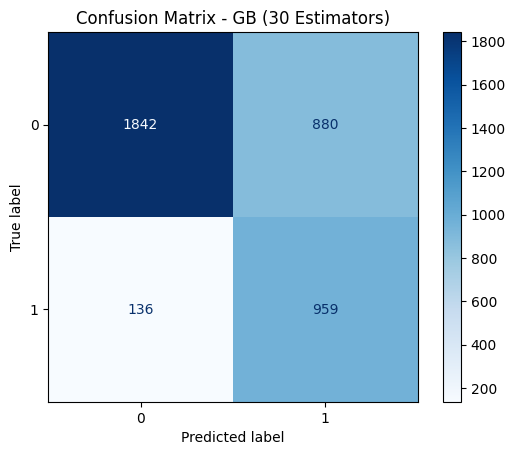

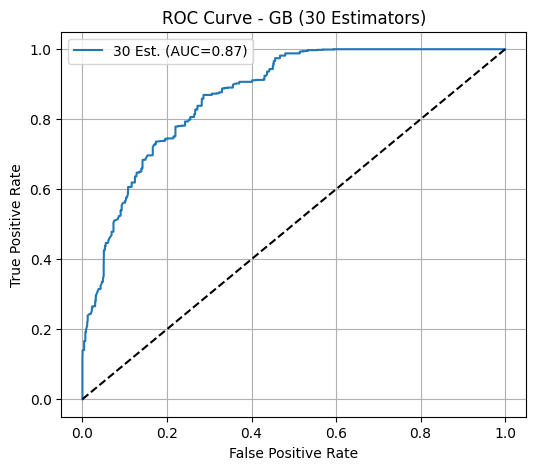


 Gradient Boosting with 40 Estimators:
              precision    recall  f1-score   support

         0.0       0.94      0.70      0.80      2722
         1.0       0.54      0.89      0.67      1095

    accuracy                           0.75      3817
   macro avg       0.74      0.79      0.74      3817
weighted avg       0.82      0.75      0.76      3817

 Recall (class 1): 0.8877
 Accuracy: 0.7514
 AUC: 0.8782


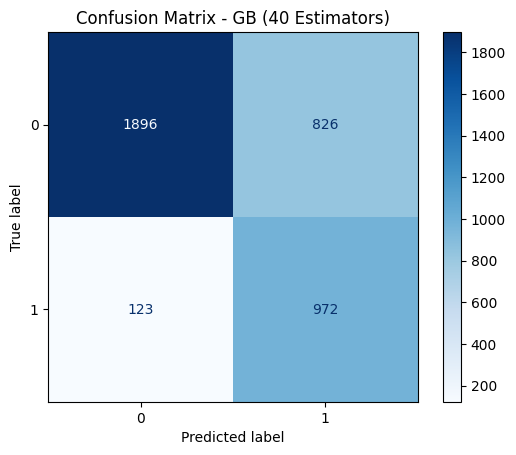

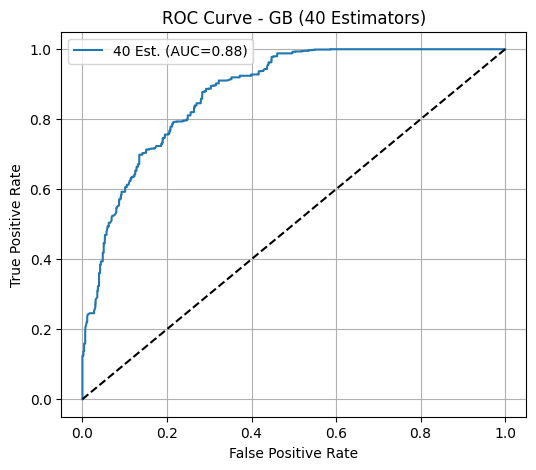


 Gradient Boosting with 50 Estimators:
              precision    recall  f1-score   support

         0.0       0.95      0.71      0.81      2722
         1.0       0.56      0.90      0.69      1095

    accuracy                           0.77      3817
   macro avg       0.75      0.81      0.75      3817
weighted avg       0.83      0.77      0.78      3817

 Recall (class 1): 0.8977
 Accuracy: 0.7668
 AUC: 0.8902


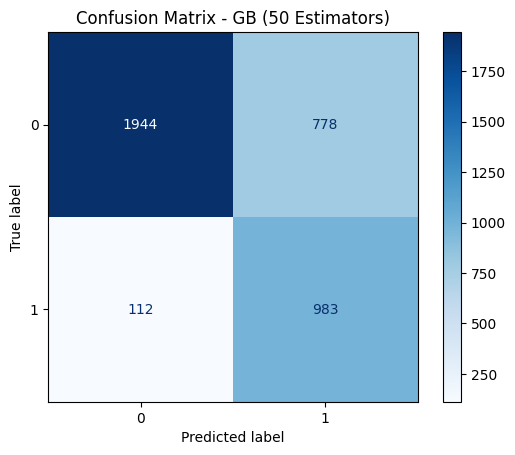

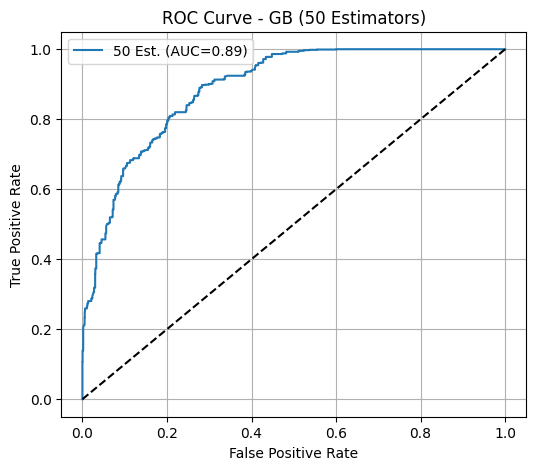


 Gradient Boosting with 60 Estimators:
              precision    recall  f1-score   support

         0.0       0.95      0.75      0.84      2722
         1.0       0.59      0.90      0.71      1095

    accuracy                           0.79      3817
   macro avg       0.77      0.82      0.78      3817
weighted avg       0.85      0.79      0.80      3817

 Recall (class 1): 0.8986
 Accuracy: 0.7933
 AUC: 0.9107


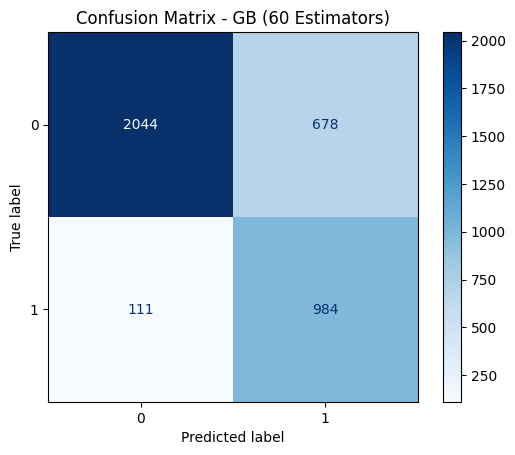

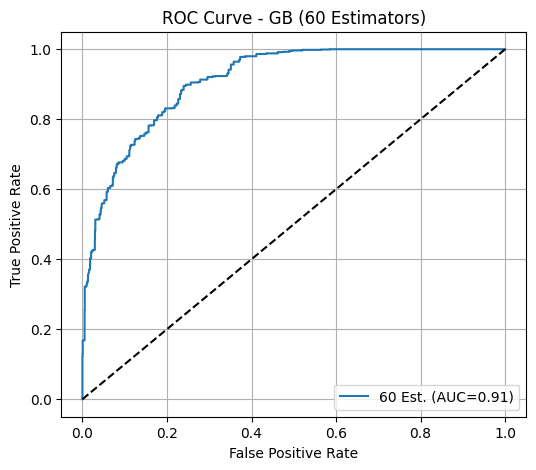


 Gradient Boosting with 70 Estimators:
              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85      2722
         1.0       0.61      0.89      0.72      1095

    accuracy                           0.80      3817
   macro avg       0.78      0.83      0.78      3817
weighted avg       0.85      0.80      0.81      3817

 Recall (class 1): 0.8941
 Accuracy: 0.8022
 AUC: 0.9215


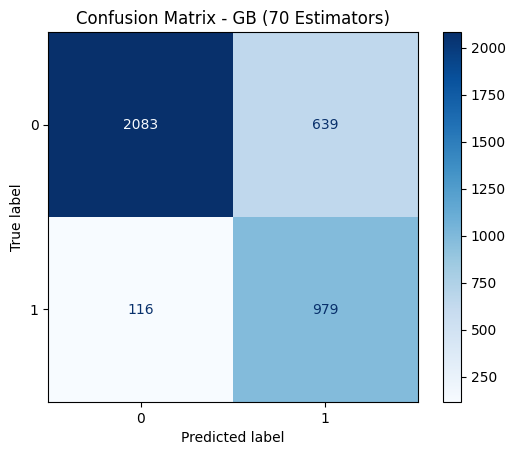

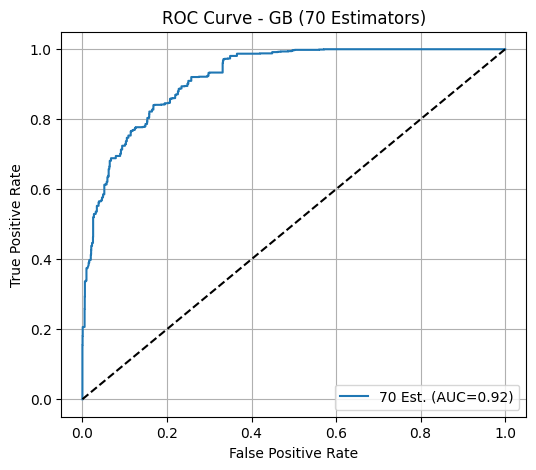


 Gradient Boosting with 80 Estimators:
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86      2722
         1.0       0.62      0.90      0.73      1095

    accuracy                           0.81      3817
   macro avg       0.79      0.84      0.80      3817
weighted avg       0.86      0.81      0.82      3817

 Recall (class 1): 0.9023
 Accuracy: 0.8132
 AUC: 0.9316


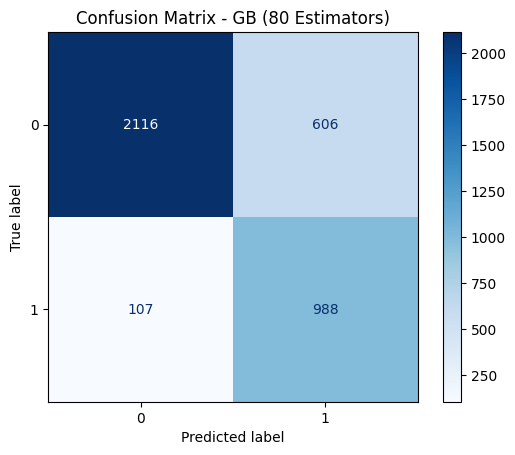

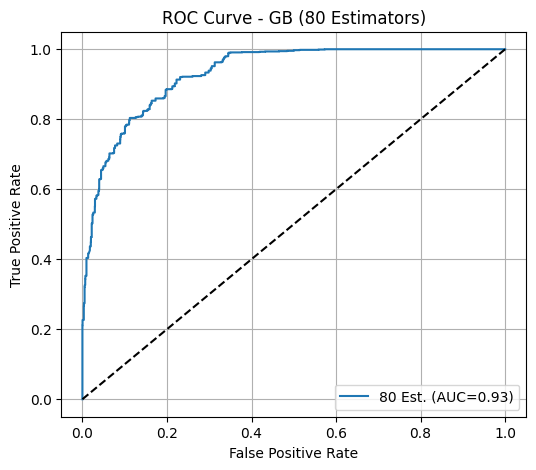


 Gradient Boosting with 90 Estimators:
              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87      2722
         1.0       0.64      0.90      0.75      1095

    accuracy                           0.83      3817
   macro avg       0.80      0.85      0.81      3817
weighted avg       0.86      0.83      0.83      3817

 Recall (class 1): 0.8995
 Accuracy: 0.8255
 AUC: 0.9415


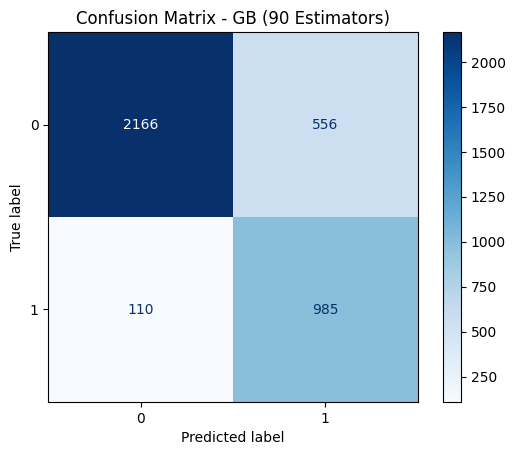

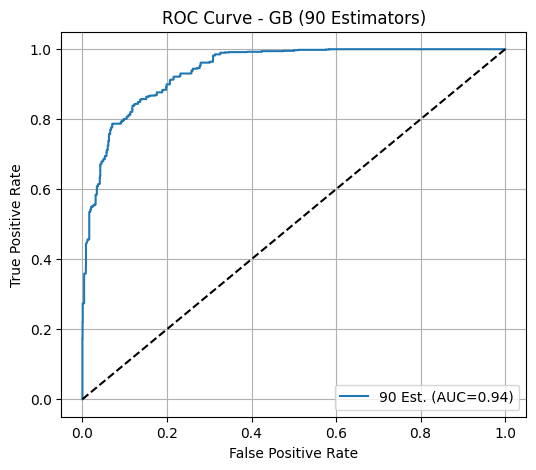


 Gradient Boosting with 100 Estimators:
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.88      2722
         1.0       0.67      0.91      0.77      1095

    accuracy                           0.85      3817
   macro avg       0.81      0.87      0.83      3817
weighted avg       0.88      0.85      0.85      3817

 Recall (class 1): 0.9114
 Accuracy: 0.8467
 AUC: 0.9506


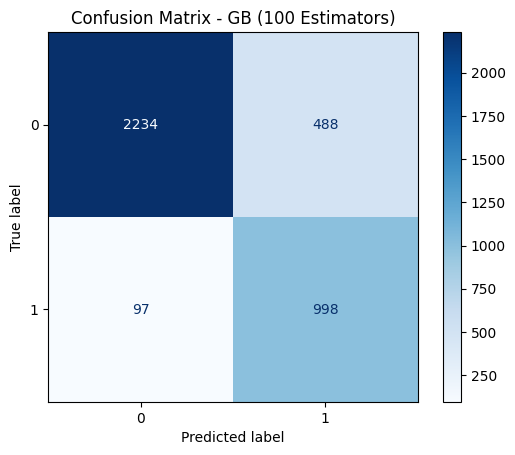

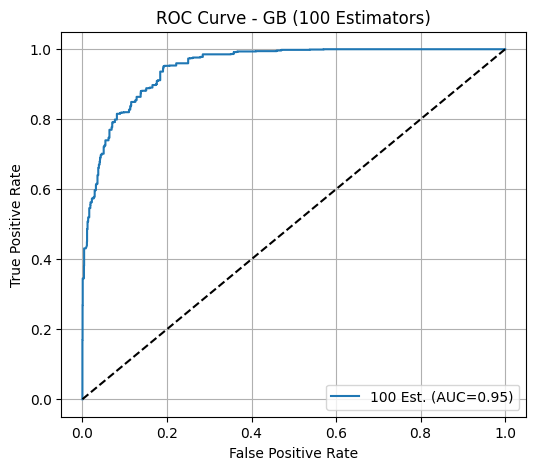


 Best Gradient Boosting Model:
 Estimators: 100
 Recall: 0.9114
 Accuracy: 0.8467
 AUC: 0.9506


In [ ]:
from imblearn.pipeline import Pipeline as ImbPipeline  # Use imbalanced-learn's pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score
)
import matplotlib.pyplot as plt
import numpy as np

gb_results = []

print("\n Evaluating Gradient Boosting with Varying Estimators:\n")

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)

for n_estimators in range(10, 110, 10):
    # Use imbalanced-learn's pipeline which supports SMOTE
    gb_pipeline = ImbPipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('smote', smote),  # SMOTE applied here
        ('gb', GradientBoostingClassifier(n_estimators=n_estimators, random_state=42))
    ])

    # Train
    gb_pipeline.fit(X_train[numerical_features], y_train)

    # Predict
    y_val_pred = gb_pipeline.predict(X_val[numerical_features])
    y_val_proba = gb_pipeline.predict_proba(X_val[numerical_features])[:, 1]

    # Metrics
    report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
    recall_key = next((k for k in report.keys() if str(k) in ["1", "1.0"]), None)
    recall = report.get(recall_key, {}).get("recall", 0)

    acc = accuracy_score(y_val, y_val_pred)
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)
    roc_auc = auc(fpr, tpr)

    # Store results
    gb_results.append({
        'n_estimators': n_estimators,
        'recall': recall,
        'accuracy': acc,
        'auc': roc_auc,
        'model': gb_pipeline
    })

    #  Output
    print(f"\n Gradient Boosting with {n_estimators} Estimators:")
    print(classification_report(y_val, y_val_pred, zero_division=0))
    print(f" Recall (class 1): {recall:.4f}")
    print(f" Accuracy: {acc:.4f}")
    print(f" AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_val_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - GB ({n_estimators} Estimators)")
    plt.grid(False)
    plt.show()

    # ROC Curve
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f'{n_estimators} Est. (AUC={roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve - GB ({n_estimators} Estimators)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid()
    plt.legend()
    plt.show()

# Best GB model based on recall
best_gb = max(gb_results, key=lambda x: x['recall'])

print("\n Best Gradient Boosting Model:")
print(f" Estimators: {best_gb['n_estimators']}")
print(f" Recall: {best_gb['recall']:.4f}")
print(f" Accuracy: {best_gb['accuracy']:.4f}")
print(f" AUC: {best_gb['auc']:.4f}")


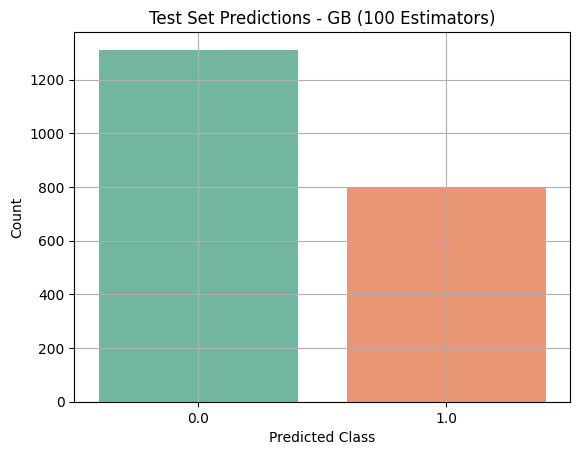


Final Test Set Prediction Distribution:
Class 0: 1312 instances
Class 1: 798 instances


In [ ]:

#  Final test prediction using best GB model
final_gb = best_gb['model']
test_preds = final_gb.predict(df_test[numerical_features])

#  Plot test set predictions
sns.countplot(x=test_preds,hue=test_preds, palette='Set2', legend=False )
plt.title(f"Test Set Predictions - GB ({best_gb['n_estimators']} Estimators)")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.grid()
plt.show()

#  Distribution
unique, counts = np.unique(test_preds, return_counts=True)
print("\nFinal Test Set Prediction Distribution:")
for label, count in zip(unique, counts):
    print(f"Class {int(label)}: {count} instances")


##Comparison of Models

Best XGBoost Model:
  - Best Estimators/Parameters: 80
  - Recall: 0.9982
  - Accuracy: 0.9982
  - AUC: 1.0000
--------------------------------------------------
Best Random Forest Model:
  - Best Estimators/Parameters: 100
  - Recall: 0.9963
  - Accuracy: 0.9974
  - AUC: 1.0000
--------------------------------------------------
Best Decision Tree Model:
  - Best Estimators/Parameters: 10 Features
  - Recall: 0.9863
  - Accuracy: 0.9874
  - AUC: 0.9871
--------------------------------------------------
Best Gradient Boosting Model:
  - Best Estimators/Parameters: 100
  - Recall: 0.9114
  - Accuracy: 0.8467
  - AUC: 0.9506
--------------------------------------------------
Best KNN Model:
  - Best Estimators/Parameters: k=19
  - Recall: 0.9050
  - Accuracy: 0.7571
  - AUC: 0.8953
--------------------------------------------------
Best AdaBoost Model:
  - Best Estimators/Parameters: 70
  - Recall: 0.7425
  - Accuracy: 0.6961
  - AUC: 0.7717
-----------------------------------------------

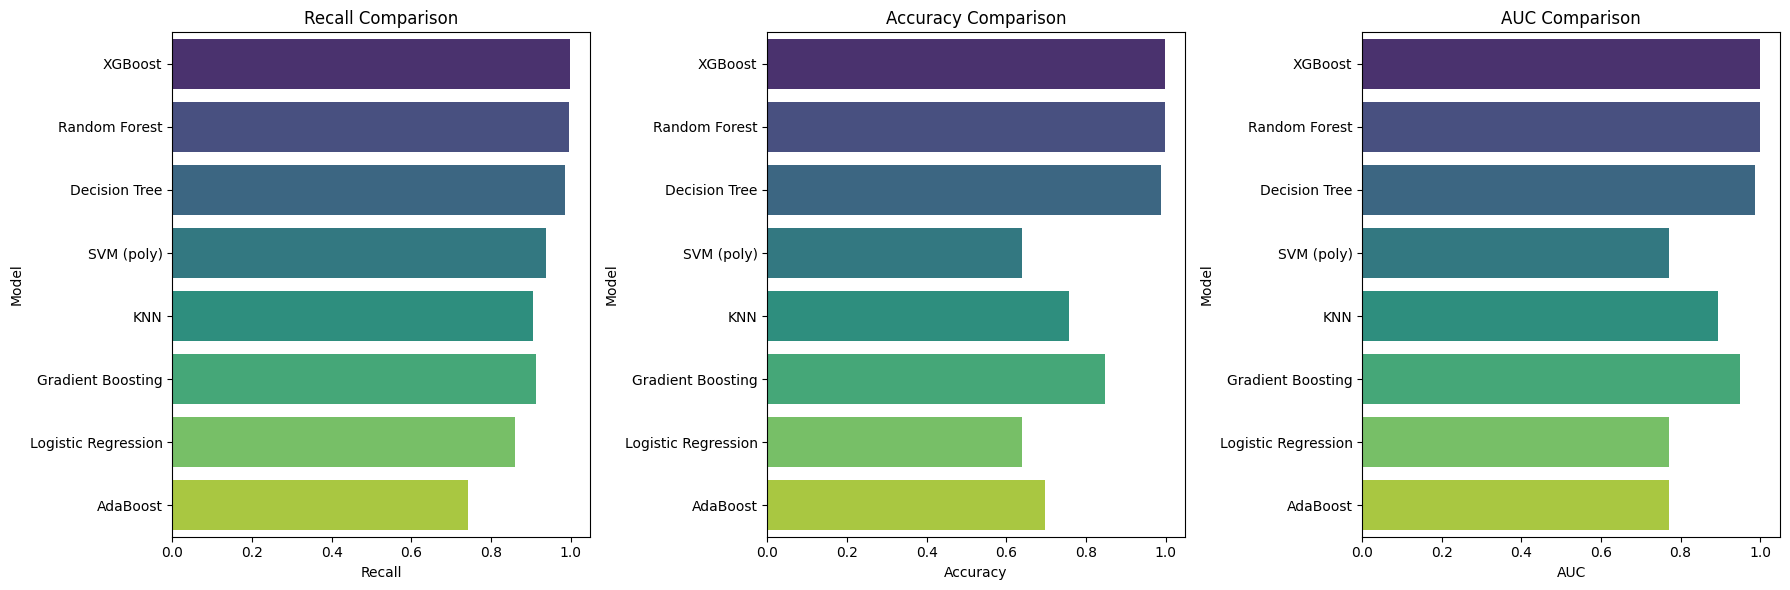

In [ ]:
import pandas as pd

# Create a DataFrame to store model results
model_data = {
    'Model': ['XGBoost', 'Random Forest', 'Decision Tree', 'SVM', 'KNN', 'Gradient Boosting', 'AdaBoost', 'Logistic Regression'],
    'Best Estimators/Parameters': ['80', '100', '10 Features', 'Kernel=poly', 'k=19', '100', '70', 'SMOTE'],
    'Recall': [0.9982, 0.9963, 0.9863, 0.9379, 0.9050, 0.9114, 0.7425, 0.86],  # Update the values based on your results
    'Accuracy': [0.9982, 0.9974, 0.9874, 0.64, 0.7571, 0.8467, 0.6961, 0.64],  # Update the values based on your results
    'AUC': [1.0000, 1.0000, 0.9871, 0.64, 0.8953, 0.9506, 0.7717, 0.64]  # Update the values based on your results
}

# Create a DataFrame
df_models = pd.DataFrame(model_data)

# Sort the models by Accuracy, then by Recall, and then by AUC in descending order
df_models_sorted = df_models.sort_values(by=['Accuracy', 'Recall', 'AUC'], ascending=False)

# Display the sorted results
for index, row in df_models_sorted.iterrows():
    print(f"Best {row['Model']} Model:")
    print(f"  - Best Estimators/Parameters: {row['Best Estimators/Parameters']}")
    print(f"  - Recall: {row['Recall']:.4f}")
    print(f"  - Accuracy: {row['Accuracy']:.4f}")
    print(f"  - AUC: {row['AUC']:.4f}")
    print("-" * 50)
# Plotting the comparison of models based on Recall, Accuracy, and AUC
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Recall Comparison
sns.barplot(x="Recall", y="Model", data=df, ax=axes[0], hue="Model", palette="viridis")
axes[0].set_title('Recall Comparison')

# Accuracy Comparison
sns.barplot(x="Accuracy", y="Model", data=df, ax=axes[1], hue="Model", palette="viridis")
axes[1].set_title('Accuracy Comparison')

# AUC Comparison
sns.barplot(x="AUC", y="Model", data=df, ax=axes[2], hue="Model", palette="viridis")
axes[2].set_title('AUC Comparison')

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
import os
import joblib

# Create 'models' directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save models
joblib.dump(final_xgb, 'models/xgb_model.pkl')
joblib.dump(final_rf, 'models/rf_model.pkl')
joblib.dump(final_dt, 'models/dt_model.pkl')

print("Models saved successfully!")



Models saved successfully!


In [ ]:
pip install shap lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=420578436543688f8e00999aa2119911777caac9f80b732ec112822e2f194807
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:

!pip install shap lime matplotlib xgboost scikit-learn


In [ ]:
# Print all step names in the pipeline
print(best_xgb.named_steps.keys())



dict_keys(['imputer', 'scaler', 'xgb'])


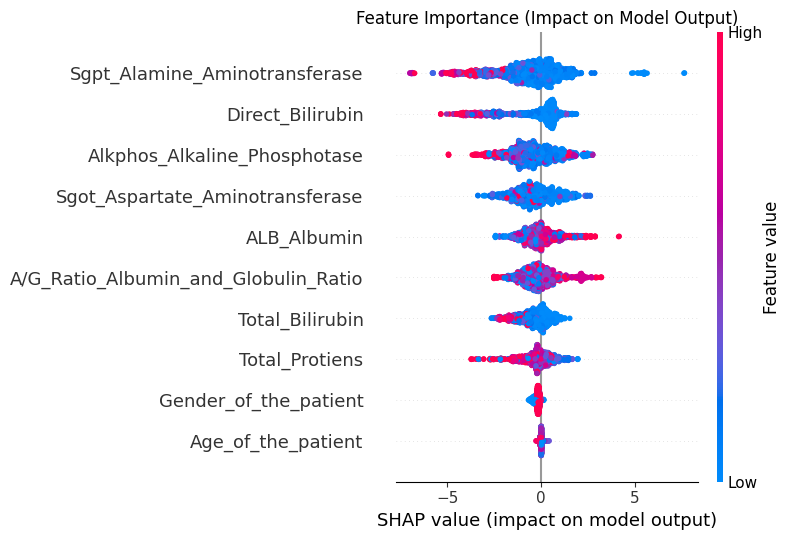

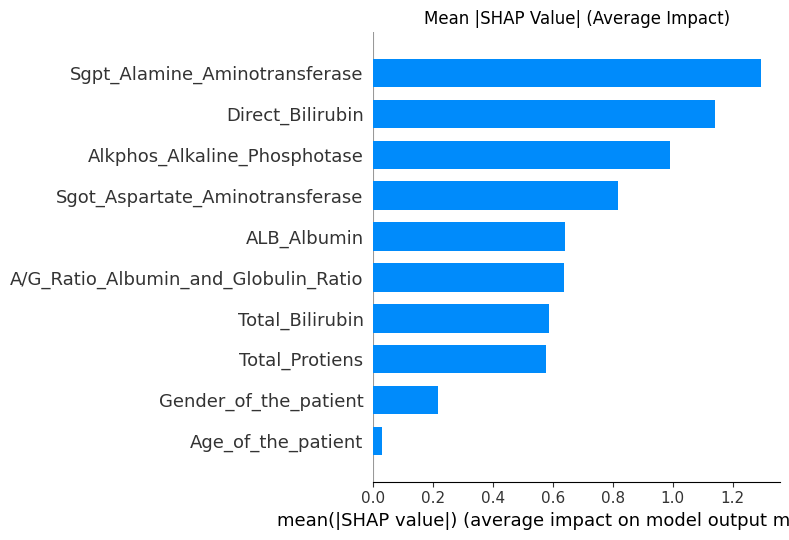

In [ ]:
import shap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb

# Set non-interactive backend for headless environments
matplotlib.use('Agg')
# Enable inline plotting for Jupyter/Colab
%matplotlib inline

# Define feature names
feature_names = [
    'Age_of_the_patient',
    'Gender_of_the_patient',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkphos_Alkaline_Phosphotase',
    'Sgpt_Alamine_Aminotransferase',
    'Sgot_Aspartate_Aminotransferase',
    'Total_Protiens',
    'ALB_Albumin',
    'A/G_Ratio_Albumin_and_Globulin_Ratio'
]

# Access model and transform data
try:
    model = best_xgb.named_steps['xgb']  # Adjust if step name differs
    X_test_processed = best_xgb[:-1].transform(X_test)
except AttributeError as e:
    print(f"Error accessing pipeline: {e}")
    raise

# Create SHAP explainer
try:
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X_test_processed)
except Exception as e:
    print(f"Error computing SHAP values: {e}")
    raise

# Assign feature names
shap_values.feature_names = feature_names

# Plot 1: Summary Plot (Beeswarm)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names, show=False)
plt.title("Feature Importance (Impact on Model Output)")
plt.tight_layout()
plt.show()

# Plot 2: Bar Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_processed, plot_type="bar", feature_names=feature_names, show=False)
plt.title("Mean |SHAP Value| (Average Impact)")
plt.tight_layout()
plt.show()

Intercept 0.0968325235190872
Prediction_local [0.79312027]
Right: 0.9795985


<Figure size 1000x600 with 0 Axes>

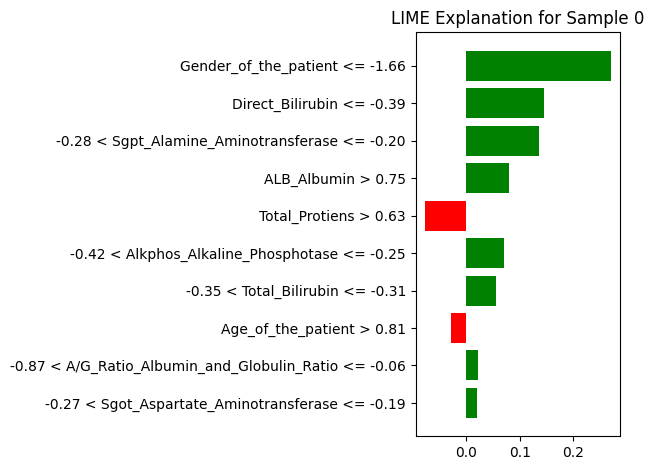

In [ ]:
import lime
import lime.lime_tabular
import pandas as pd

# Convert processed data to DataFrame for LIME
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_test_processed,
    feature_names=feature_names,
    mode='classification' if hasattr(model, 'predict_proba') else 'regression',
    verbose=True
)

# Explain a single prediction
sample_idx = 0
exp = lime_explainer.explain_instance(
    data_row=X_test_processed[sample_idx],
    predict_fn=model.predict_proba if hasattr(model, 'predict_proba') else model.predict,
    num_features=len(feature_names)
)

# Visualize LIME explanation
try:
    plt.figure(figsize=(10, 6))
    exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Sample {sample_idx}")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting LIME: {e}")
    # Fallback: Save as HTML
    exp.save_to_file('lime_explanation.html')
    print("LIME explanation saved as 'lime_explanation.html'. Open it in a browser.")

In [ ]:
print("best_dt steps:", best_dt.steps)
print("best_dt named steps keys:", list(best_dt.named_steps.keys()))
print("best_rf steps:", best_rf.steps)
print("best_rf named steps keys:", list(best_rf.named_steps.keys()))

best_dt steps: [('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler()), ('tree', DecisionTreeClassifier(class_weight='balanced', random_state=42))]
best_dt named steps keys: ['imputer', 'scaler', 'tree']
best_rf steps: [('imputer', SimpleImputer(strategy='median')), ('scaler', StandardScaler()), ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))]
best_rf named steps keys: ['imputer', 'scaler', 'rf']


X_test_processed shape: (2110, 10)
Number of feature names: 10
SHAP values feature names set: ['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin', 'A/G_Ratio_Albumin_and_Globulin_Ratio']


<Figure size 1000x800 with 0 Axes>

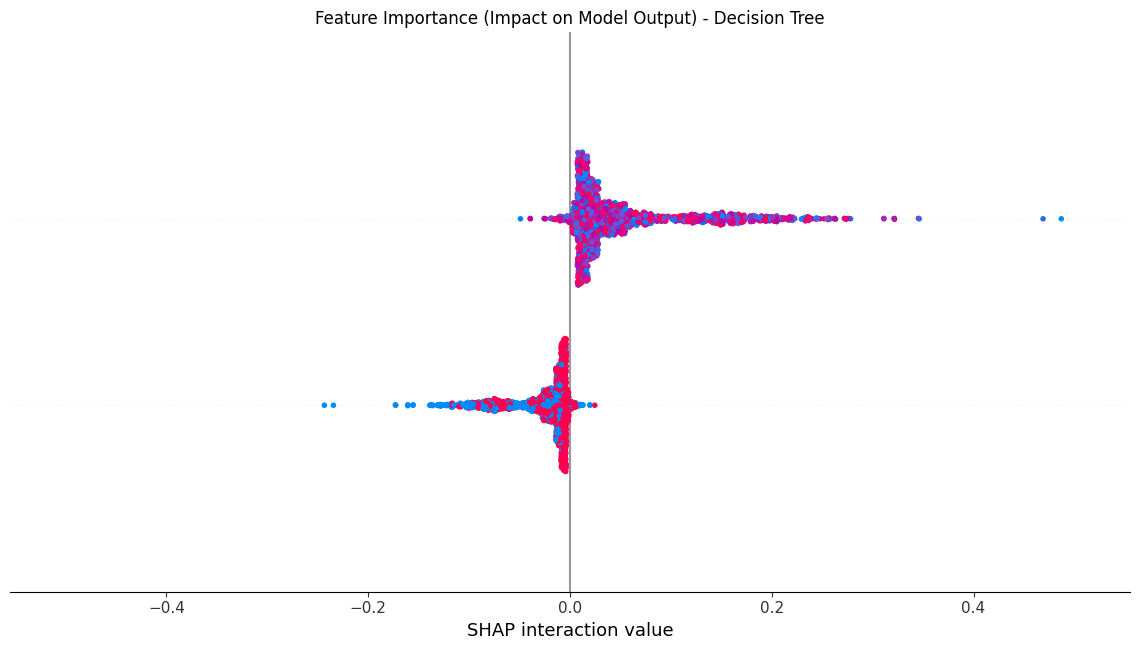

<Figure size 1000x600 with 0 Axes>

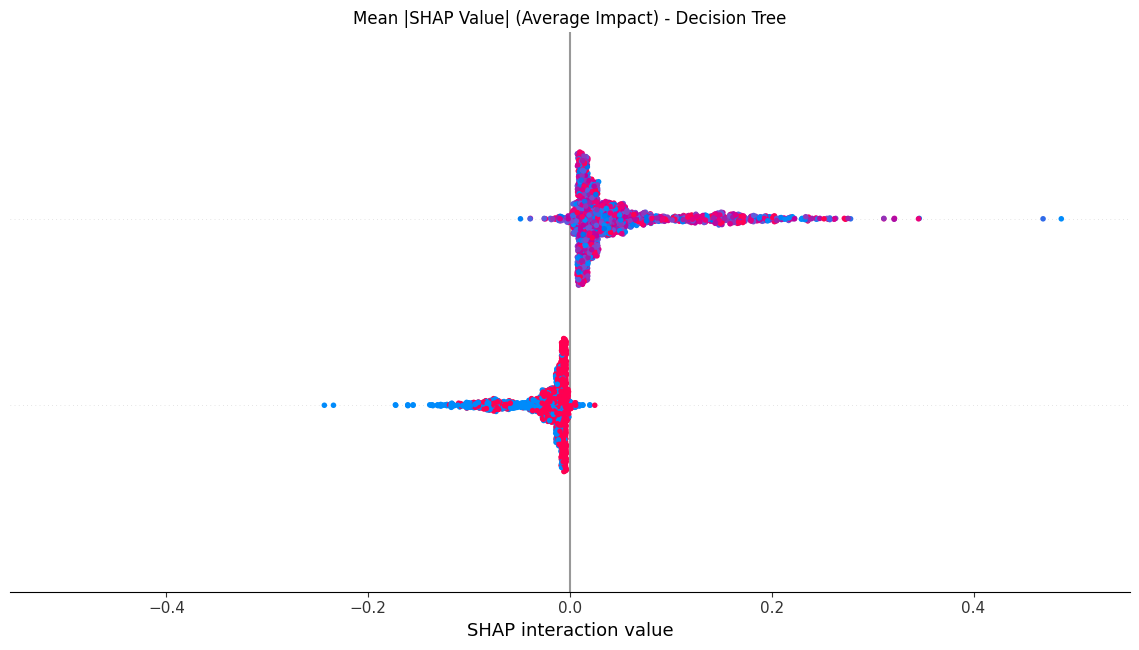

In [ ]:
import shap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

# Set non-interactive backend for headless environments
matplotlib.use('Agg')
# Enable inline plotting for Jupyter/Colab
%matplotlib inline

# Define feature names
feature_names = [
    'Age_of_the_patient',
    'Gender_of_the_patient',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkphos_Alkaline_Phosphotase',
    'Sgpt_Alamine_Aminotransferase',
    'Sgot_Aspartate_Aminotransferase',
    'Total_Protiens',
    'ALB_Albumin',
    'A/G_Ratio_Albumin_and_Globulin_Ratio'
]

# Access model and transform data
try:
    model = best_dt.named_steps['tree']
    X_test_processed = best_dt[:-1].transform(X_test)
    print("X_test_processed shape:", X_test_processed.shape)
    print("Number of feature names:", len(feature_names))
    if X_test_processed.shape[1] != len(feature_names):
        print("Warning: Number of features in X_test_processed does not match feature_names length!")
except AttributeError as e:
    print(f"Error accessing pipeline: {e}")
    raise
except KeyError as e:
    print(f"KeyError: Step name '{e}' not found. Use one of: {list(best_dt.named_steps.keys())}")
    raise

# Create SHAP explainer
try:
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X_test_processed)
    # Explicitly set feature names
    shap_values.feature_names = feature_names
    print("SHAP values feature names set:", shap_values.feature_names)
except Exception as e:
    print(f"Error computing SHAP values: {e}")
    raise

# Plot 1: Summary Plot (Beeswarm)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names, show=False)
plt.title("Feature Importance (Impact on Model Output) - Decision Tree")
plt.tight_layout()
plt.show()

# Plot 2: Bar Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_processed, plot_type="bar", feature_names=feature_names, show=False)
plt.title("Mean |SHAP Value| (Average Impact) - Decision Tree")
plt.tight_layout()
plt.show()

X_test_processed shape: (2110, 10)
Number of feature names: 10
Intercept 0.19105680811342918
Prediction_local [0.67569842]
Right: 1.0
Prediction probabilities: No Disease=0.00, Disease=1.00
LIME explanation generated successfully.


<Figure size 1000x600 with 0 Axes>

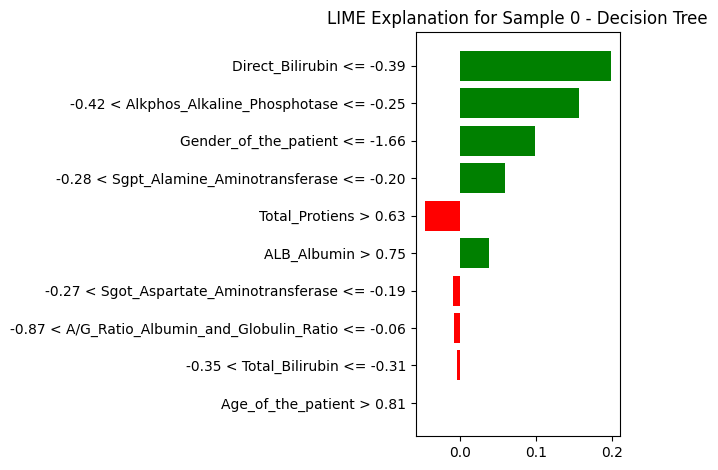

In [ ]:
import lime
import lime.lime_tabular
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plotting works in Colab
%matplotlib inline

# Define feature names
feature_names = [
    'Age_of_the_patient',
    'Gender_of_the_patient',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkphos_Alkaline_Phosphotase',
    'Sgpt_Alamine_Aminotransferase',
    'Sgot_Aspartate_Aminotransferase',
    'Total_Protiens',
    'ALB_Albumin',
    'A/G_Ratio_Albumin_and_Globulin_Ratio'
]

# Access model and transform data
try:
    model = best_dt.named_steps['tree']
    X_test_processed = best_dt[:-1].transform(X_test)
    print("X_test_processed shape:", X_test_processed.shape)
    print("Number of feature names:", len(feature_names))
    if X_test_processed.shape[1] != len(feature_names):
        print("Warning: Number of features in X_test_processed does not match feature_names length!")
except AttributeError as e:
    print(f"Error accessing pipeline: {e}")
    raise
except KeyError as e:
    print(f"KeyError: Step name '{e}' not found. Use one of: {list(best_dt.named_steps.keys())}")
    raise

# Convert processed data to DataFrame for LIME
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_test_processed,
    feature_names=feature_names,
    mode='classification' if hasattr(model, 'predict_proba') else 'regression',
    verbose=True
)

# Explain a single prediction
sample_idx = 0
try:
    exp = lime_explainer.explain_instance(
        data_row=X_test_processed[sample_idx],
        predict_fn=model.predict_proba if hasattr(model, 'predict_proba') else model.predict,
        num_features=len(feature_names)
    )
    if hasattr(model, 'predict_proba'):
        pred_probs = model.predict_proba(X_test_processed[sample_idx:sample_idx+1])[0]
        print(f"Prediction probabilities: No Disease={pred_probs[0]:.2f}, Disease={pred_probs[1]:.2f}")
    print("LIME explanation generated successfully.")
except Exception as e:
    print(f"Error generating LIME explanation: {e}")
    raise

# Visualize LIME explanation
try:
    plt.figure(figsize=(10, 6))
    exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Sample {sample_idx} - Decision Tree")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting LIME: {e}")
    # Fallback: Save as HTML
    exp.save_to_file('lime_explanation_dt.html')
    print("LIME explanation saved as 'lime_explanation_dt.html'. Open it in a browser.")

X_test_processed shape: (2110, 10)
Number of feature names: 10
SHAP values feature names set: ['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase', 'Total_Protiens', 'ALB_Albumin', 'A/G_Ratio_Albumin_and_Globulin_Ratio']


<Figure size 1000x800 with 0 Axes>

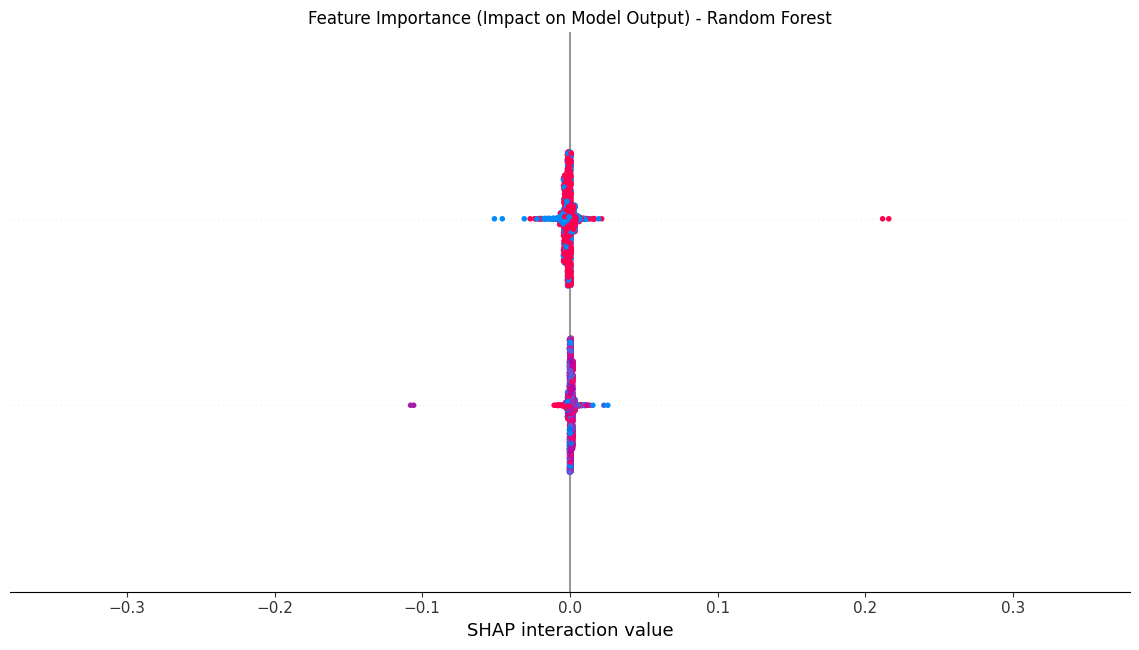

<Figure size 1000x600 with 0 Axes>

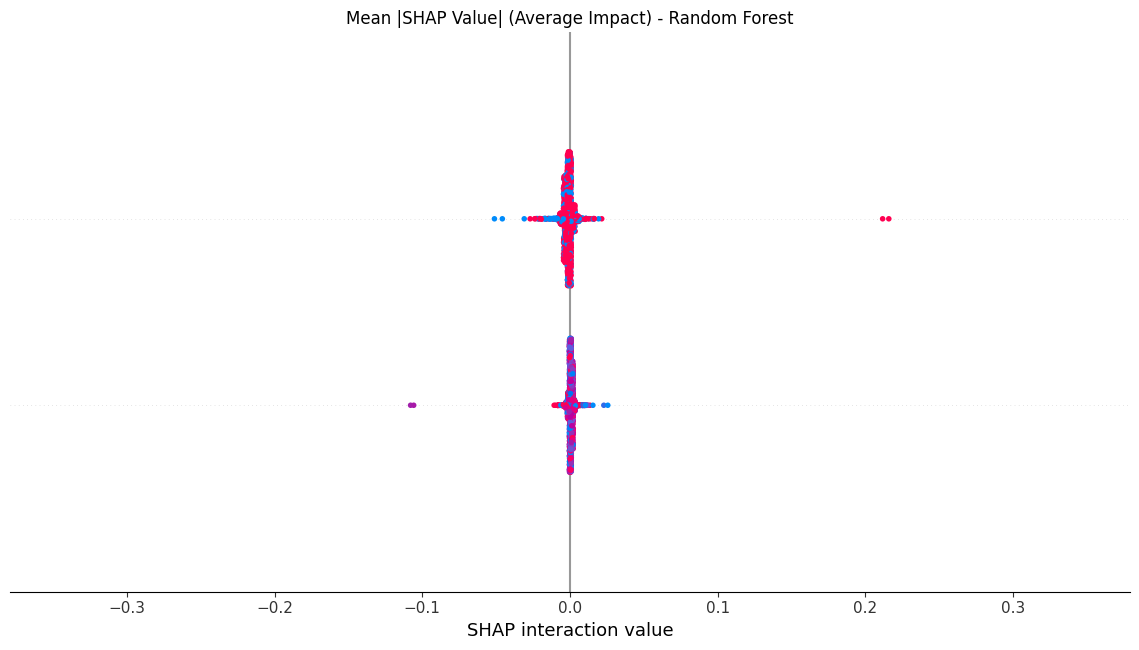

In [ ]:
import shap
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Set non-interactive backend for headless environments
matplotlib.use('Agg')
# Enable inline plotting for Jupyter/Colab
%matplotlib inline

# Define feature names
feature_names = [
    'Age_of_the_patient',
    'Gender_of_the_patient',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkphos_Alkaline_Phosphotase',
    'Sgpt_Alamine_Aminotransferase',
    'Sgot_Aspartate_Aminotransferase',
    'Total_Protiens',
    'ALB_Albumin',
    'A/G_Ratio_Albumin_and_Globulin_Ratio'
]

# Access model and transform data
try:
    model = best_rf.named_steps['rf']
    X_test_processed = best_rf[:-1].transform(X_test)
    print("X_test_processed shape:", X_test_processed.shape)
    print("Number of feature names:", len(feature_names))
    if X_test_processed.shape[1] != len(feature_names):
        print("Warning: Number of features in X_test_processed does not match feature_names length!")
except AttributeError as e:
    print(f"Error accessing pipeline: {e}")
    raise
except KeyError as e:
    print(f"KeyError: Step name '{e}' not found. Use one of: {list(best_rf.named_steps.keys())}")
    raise

# Create SHAP explainer
try:
    explainer = shap.TreeExplainer(model)
    shap_values = explainer(X_test_processed)
    # Explicitly set feature names
    shap_values.feature_names = feature_names
    print("SHAP values feature names set:", shap_values.feature_names)
except Exception as e:
    print(f"Error computing SHAP values: {e}")
    raise

# Plot 1: Summary Plot (Beeswarm)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test_processed, feature_names=feature_names, show=False)
plt.title("Feature Importance (Impact on Model Output) - Random Forest")
plt.tight_layout()
plt.show()

# Plot 2: Bar Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_processed, plot_type="bar", feature_names=feature_names, show=False)
plt.title("Mean |SHAP Value| (Average Impact) - Random Forest")
plt.tight_layout()
plt.show()

X_test_processed shape: (2110, 10)
Number of feature names: 10
Intercept 0.20753110850825923
Prediction_local [0.68496687]
Right: 0.99
Prediction probabilities: No Disease=0.01, Disease=0.99
LIME explanation generated successfully.


<Figure size 1000x600 with 0 Axes>

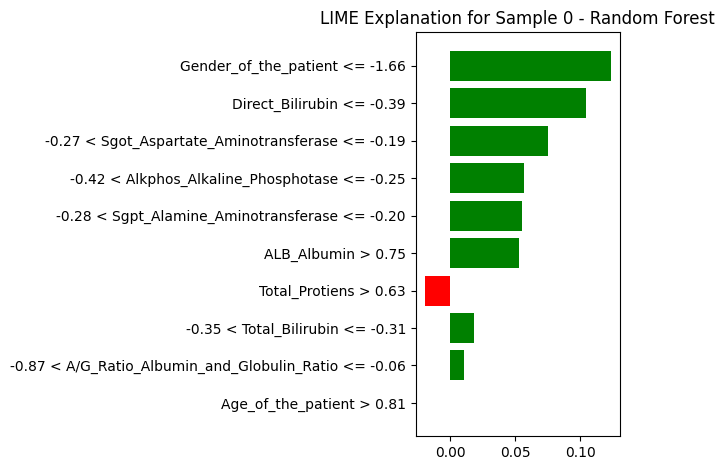

In [ ]:
import lime
import lime.lime_tabular
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plotting works in Colab
%matplotlib inline

# Define feature names
feature_names = [
    'Age_of_the_patient',
    'Gender_of_the_patient',
    'Total_Bilirubin',
    'Direct_Bilirubin',
    'Alkphos_Alkaline_Phosphotase',
    'Sgpt_Alamine_Aminotransferase',
    'Sgot_Aspartate_Aminotransferase',
    'Total_Protiens',
    'ALB_Albumin',
    'A/G_Ratio_Albumin_and_Globulin_Ratio'
]

# Access model and transform data
try:
    model = best_rf.named_steps['rf']
    X_test_processed = best_rf[:-1].transform(X_test)
    print("X_test_processed shape:", X_test_processed.shape)
    print("Number of feature names:", len(feature_names))
    if X_test_processed.shape[1] != len(feature_names):
        print("Warning: Number of features in X_test_processed does not match feature_names length!")
except AttributeError as e:
    print(f"Error accessing pipeline: {e}")
    raise
except KeyError as e:
    print(f"KeyError: Step name '{e}' not found. Use one of: {list(best_rf.named_steps.keys())}")
    raise

# Convert processed data to DataFrame for LIME
X_test_df = pd.DataFrame(X_test_processed, columns=feature_names)

# Create LIME explainer
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_test_processed,
    feature_names=feature_names,
    mode='classification' if hasattr(model, 'predict_proba') else 'regression',
    verbose=True
)

# Explain a single prediction
sample_idx = 0
try:
    exp = lime_explainer.explain_instance(
        data_row=X_test_processed[sample_idx],
        predict_fn=model.predict_proba if hasattr(model, 'predict_proba') else model.predict,
        num_features=len(feature_names)
    )
    if hasattr(model, 'predict_proba'):
        pred_probs = model.predict_proba(X_test_processed[sample_idx:sample_idx+1])[0]
        print(f"Prediction probabilities: No Disease={pred_probs[0]:.2f}, Disease={pred_probs[1]:.2f}")
    print("LIME explanation generated successfully.")
except Exception as e:
    print(f"Error generating LIME explanation: {e}")
    raise

# Visualize LIME explanation
try:
    plt.figure(figsize=(10, 6))
    exp.as_pyplot_figure()
    plt.title(f"LIME Explanation for Sample {sample_idx} - Random Forest")
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"Error plotting LIME: {e}")
    # Fallback: Save as HTML
    exp.save_to_file('lime_explanation_rf.html')
    print("LIME explanation saved as 'lime_explanation_rf.html'. Open it in a browser.")